# Learning Analytics & Educational Data Mining
Student performance is often used to assess quality of education. often, the metrics used to measure and/or predict student performance are the Cumulative Grade Point Average (CGPA) and internal assessments. Some researches in the past have expanded the scope of metrics to include other aspects about the students such as amount of time spent studying, distane travelled to get to school, family relations, free time they get and internet access. Others have, on a larger scope, studied how students rated the structure and delivery of course content by instructors as this plays a big role in their perfromance.This project attempts to improve educationl systems using the above-mentioned data. the project will make use of data science principles and machine learning models to identify attributes that have the most correlation to student perfromance and predict future performance based on these.

## The project seeks to answer the following questions:

    1. What are the factors affecting student achievements?
    2. Can the factors above be used to predict student scores?
   
## Data Sets:
    
    1. Student Performance Data Set


# Initial Setup

In [170]:
# Initial setup
# import the necessary libraries

import pandas as pd              # for data manipulation
import matplotlib.pyplot as plt  # for visualizations
import numpy as np               # for statistical calculations
import seaborn as sns            # for statistical analysis
import sklearn                   # for modelling


# The student Performance Data Set

 This data covers student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features. It was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful
 
 
 
 Attribute Information:

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets: 
1. school - student’s school (binary: ‘GP’ - Gabriel Pereira or ‘MS’ - Mousinho da Silveira)
2. sex - student’s sex (binary: ‘F’ - female or ‘M’ - male)
3. age - student’s age (numeric: from 15 to 22)
4. address - student’s home address type (binary: ‘U’ - urban or ‘R’ - rural)
5. famsize - family size (binary: ‘LE3’ - less or equal to 3 or ‘GT3’ - greater than 3)
6. Pstatus - parent’s cohabitation status (binary: ‘T’ - living together or ‘A’ - apart)
7. Medu - mother’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)
10. Fjob - father’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)
11. reason - reason to choose this school (nominal: close to ‘home’, school ‘reputation’, ‘course’ preference or ‘other’)
12. guardian - student’s guardian (nominal: ‘mother’, ‘father’ or ‘other’)
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20, output target)

Obtaining the dataset
Both the dataset “student-mat.csv” and “student-por.csv” are downloaded from the source data folder and uploaded to github.
Below are the Github urls:
1. https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-mat.csv
2. https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-por.csv

## Downloading the datasets

Mathematics Dataset

``` python
url = "https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-mat.csv"
r = requests.get(url, allow_redirects=True)
open('student_math.csv', 'wb').write(r.content)
```

Portugese Dataset

``` python
url = "https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-por.csv"
r = requests.get(url, allow_redirects=True)
open('student_portugese.csv', 'wb').write(r.content)
```

Both datasets are going to be explored side by side in this project. “student-mat.csv”  will continually be referred to as Mathematics Dataset and “student-por.csv” as Portugese Dataset. The aim of having them side by side is to compare and contrast while attempting to answer the questions posed above in the introduction.

## Loading the data into a data frame - Mathematics Dataset

In [171]:
# Mathematics Dataset

student_mat_df = pd.read_csv("student_math.csv", ";")

student_mat_df.tail()   # preview the data

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
390  ...      5        5      4     4     5      4       11   9   9   9  
391  ...      2        4      5     3     4      2        3  14  16  16  
392  ...      5        5      3     3     3      3        3  10   8   7  
393  ...      4        4      1     3     4      5        0  11  12  10  
394  ...      3        2      3     3     3      5        5   8   9   9  

[5 rows x 33 columns]

In [172]:
# Mathematics Dataset

# checking fo null values, data types, column names, shape

student_mat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Our data has no missing values, has 33 attributes and 395 observations. Object type also indicates tht we have string variables that may need to be dealt with before any modelling is done. Some models do not do well with string values.

In [173]:
student_mat_df.describe() # Gives a summary of statistics for numerical categories

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000000    3.000000    0.000000    0.000000  
25%      0.000000    8.000000    9.000000    8.000000  
50%      4.000000   11.000000   11.000000   11.000000  
75%      8.000000   13.000000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

## Encoding string variables

Since all our string values represent certain categories the data will be encoded into intergers each representing a unique category. 

In [174]:
# Mathematics Dataset

# encoding the string variables
# some models are unable to deal with string values or do not perform well with them
# Hence the string values require encoding

# Binary values are encoded to a 1 or 0, e.g, Yes/No, Male/Female
student_mat_df["school"] = np.where(student_mat_df["school"].str.contains("GP", "MS"),1, 0)
student_mat_df["sex"] = np.where(student_mat_df["sex"].str.contains("M", "F"), 1, 0)
student_mat_df["address"] = np.where(student_mat_df["address"].str.contains("U", "R"), 1, 0)
student_mat_df["famsize"] = np.where(student_mat_df["famsize"].str.contains("LE3", "GT"), 1, 0)
student_mat_df["Pstatus"] = np.where(student_mat_df["Pstatus"].str.contains("T", "A"), 1, 0)
student_mat_df["schoolsup"] = np.where(student_mat_df["schoolsup"].str.contains("yes", "no"), 1, 0)
student_mat_df["famsup"] = np.where(student_mat_df["famsup"].str.contains("yes", "no"), 1, 0)
student_mat_df["paid"] = np.where(student_mat_df["paid"].str.contains("yes", "no"), 1, 0)
student_mat_df["activities"] = np.where(student_mat_df["activities"].str.contains("yes", "no"), 1, 0)
student_mat_df["nursery"] = np.where(student_mat_df["nursery"].str.contains("yes", "no"), 1, 0)
student_mat_df["higher"] = np.where(student_mat_df["higher"].str.contains("yes", "no"), 1, 0)
student_mat_df["internet"] = np.where(student_mat_df["internet"].str.contains("yes", "no"), 1, 0)
student_mat_df["romantic"] = np.where(student_mat_df["romantic"].str.contains("yes", "no"), 1, 0)

# preview the encoded data
student_mat_df[['school','sex','address','famsize','Pstatus','schoolsup','famsup','paid',
                'activities','nursery','higher','internet','romantic']].head()

school  sex  address  famsize  Pstatus  schoolsup  famsup  paid  \
0       1    0        1        0        0          1       0     0   
1       1    0        1        0        1          0       1     0   
2       1    0        1        1        1          1       0     1   
3       1    0        1        0        1          0       1     1   
4       1    0        1        0        1          0       1     1   

   activities  nursery  higher  internet  romantic  
0           0        1       1         0         0  
1           0        0       1         1         0  
2           0        1       1         1         0  
3           1        1       1         1         1  
4           0        1       1         0         0

In [175]:
# Mathematics Dataset

# checking for inconsistent entries before encoding
student_mat_df.reason[~student_mat_df.reason.isin(["home", "reputation", "course", "other"])]
student_mat_df.guardian[~student_mat_df.guardian.isin(["mother", "father", "other"])]
student_mat_df.Mjob[~student_mat_df.Mjob.isin(["teacher", "health", "services", "at_home", "other"])]
student_mat_df.Fjob[~student_mat_df.Fjob.isin(["teacher", "health", "services", "at_home", "other"])]


Series([], Name: Fjob, dtype: object)

In [176]:
# Mathematics Dataset

# The above method cannot be used for nominal attributes.
# Here, dictionary comprehension has been used to replace the string values 
# as a form of encoding the categorical data

labels = student_mat_df['Mjob'].astype('category').cat.categories.tolist()
replace_map_comp = {'Mjob' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
student_mat_df.replace(replace_map_comp, inplace=True)

labels = student_mat_df['Fjob'].astype('category').cat.categories.tolist()
replace_map_comp = {'Fjob' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
student_mat_df.replace(replace_map_comp, inplace=True)

labels = student_mat_df['guardian'].astype('category').cat.categories.tolist()
replace_map_comp = {'guardian' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
student_mat_df.replace(replace_map_comp, inplace=True)

labels = student_mat_df['reason'].astype('category').cat.categories.tolist()
replace_map_comp = {'reason' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
student_mat_df.replace(replace_map_comp, inplace=True)

# preview the encoded data
student_mat_df[['Mjob', 'Fjob', 'reason', 'guardian']]

Mjob  Fjob  reason  guardian
0       1     5       1         2
1       1     3       1         1
2       1     3       3         2
3       2     4       2         2
4       3     3       2         1
..    ...   ...     ...       ...
390     4     4       1         3
391     4     4       1         2
392     3     3       1         3
393     4     3       1         2
394     3     1       1         1

[395 rows x 4 columns]

## Loading the data into a data frame - Portugese Dataset

In [177]:
# Portugese Dataset

student_por_df = pd.read_csv("student_portugese.csv", ";")

student_por_df.tail()   # preview the data

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
644  ...      5        4      2     1     2      5        4  10  11  10  
645  ...      4        3      4     1     1      1        4  15  15  16  
646  ...      1        1      1     1     1      5        6  11  12   9  
647  ...      2        4      5     3     4      2        6  10  10  10  
648  ...      4        4      1     3     4      5        4  10  11  11  

[5 rows x 33 columns]

In [178]:
# Portugese dataset

# checking fo null values, data types, column names, shape

student_por_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Our data has no missing values, has 33 attributes and 694 observations. Object type also indicates tht we have string variables that may need to be dealt with before any modelling is done. Some models do not do well with string values.

In [179]:
# Portugese dataset

student_por_df.describe() # Gives a summary of statistics for numerical categories

age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.051093    1.175766    0.924834    1.284380    1.446259   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    2.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  649.000000  649.000000  649.000000  649.000000  
mean     3.659476   11.399076   11.570108   11.906009  
std      4.640759    2.745265    2.913639    3.230656  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000   10.000000   10.000000   10.000000  
50%      2.000000   11.000000   11.000000   12.000000  
75%      6.000000   13.000000   13.000000   14.000000  
max     32.000000   19.000000   19.000000   19.000000

## Encoding string variables

Since all our string values represent certain categories the data will be encoded into intergers each representing a unique category. 

In [180]:
# Portugese Dataset

# encoding the string variables
# some models are unable to deal with string values or do not perform well with them
# Hence the string values require encoding

# Binary values are encoded to a 1 or 0, e.g, Yes/No, Male/Female

student_por_df["school"] = np.where(student_por_df["school"].str.contains("GP", "MS"),1, 0)
student_por_df["sex"] = np.where(student_por_df["sex"].str.contains("M", "F"), 1, 0)
student_por_df["address"] = np.where(student_por_df["address"].str.contains("U", "R"), 1, 0)
student_por_df["famsize"] = np.where(student_por_df["famsize"].str.contains("LE3", "GT"), 1, 0)
student_por_df["Pstatus"] = np.where(student_por_df["Pstatus"].str.contains("T", "A"), 1, 0)
student_por_df["schoolsup"] = np.where(student_por_df["schoolsup"].str.contains("yes", "no"), 1, 0)
student_por_df["famsup"] = np.where(student_por_df["famsup"].str.contains("yes", "no"), 1, 0)
student_por_df["paid"] = np.where(student_por_df["paid"].str.contains("yes", "no"), 1, 0)
student_por_df["activities"] = np.where(student_por_df["activities"].str.contains("yes", "no"), 1, 0)
student_por_df["nursery"] = np.where(student_por_df["nursery"].str.contains("yes", "no"), 1, 0)
student_por_df["higher"] = np.where(student_por_df["higher"].str.contains("yes", "no"), 1, 0)
student_por_df["internet"] = np.where(student_por_df["internet"].str.contains("yes", "no"), 1, 0)
student_por_df["romantic"] = np.where(student_por_df["romantic"].str.contains("yes", "no"), 1, 0)



In [181]:
# Portugese Dataset

# Here, dictionary comprehension has been used to replace the string values 
# as a form of encoding the categorical data

labels = student_por_df['Mjob'].astype('category').cat.categories.tolist()
replace_map_comp = {'Mjob' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
student_por_df.replace(replace_map_comp, inplace=True)

labels = student_por_df['Fjob'].astype('category').cat.categories.tolist()
replace_map_comp = {'Fjob' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
student_por_df.replace(replace_map_comp, inplace=True)

labels = student_por_df['guardian'].astype('category').cat.categories.tolist()
replace_map_comp = {'guardian' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
student_por_df.replace(replace_map_comp, inplace=True)

labels = student_por_df['reason'].astype('category').cat.categories.tolist()
replace_map_comp = {'reason' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
student_por_df.replace(replace_map_comp, inplace=True)

# preview the encoded data
student_por_df[['Mjob', 'Fjob', 'reason', 'guardian']]

Mjob  Fjob  reason  guardian
0       1     5       1         2
1       1     3       1         1
2       1     3       3         2
3       2     4       2         2
4       3     3       2         1
..    ...   ...     ...       ...
644     4     3       1         2
645     5     4       1         2
646     3     3       1         2
647     4     4       1         2
648     4     3       1         2

[649 rows x 4 columns]

## Data Visualization

In [182]:
# store column names in a vaiable 

columns = student_mat_df.columns

### Histogram Plots

Histogram plots can be used to check for distribution of data.
The plots can also be used to approximate the shape of the distribution, e.g. normal

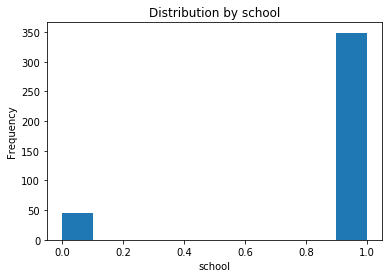

SkewtestResult(statistic=-12.272491275823556, pvalue=1.272759969973652e-34)


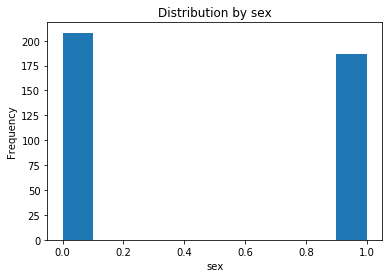

SkewtestResult(statistic=0.877315322639262, pvalue=0.3803153918828921)


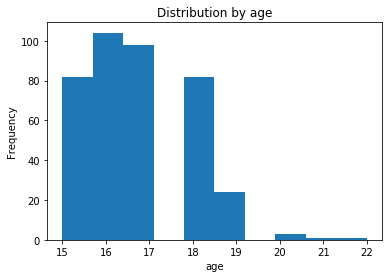

SkewtestResult(statistic=3.6644772729568094, pvalue=0.0002478442451807504)


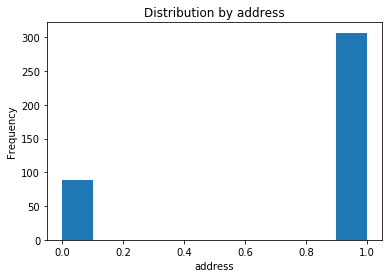

SkewtestResult(statistic=-8.615049503098176, pvalue=6.99113824572275e-18)


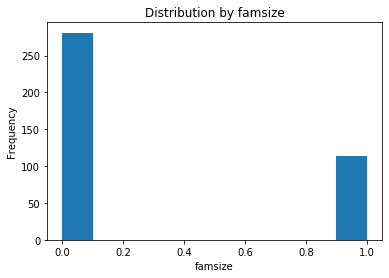

SkewtestResult(statistic=6.644440395416624, pvalue=3.043712459921661e-11)


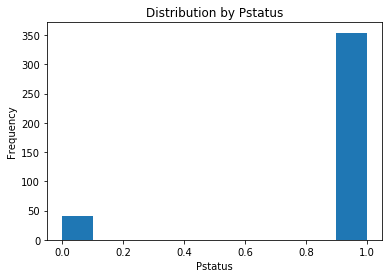

SkewtestResult(statistic=-12.817348801391713, pvalue=1.3110721920457856e-37)


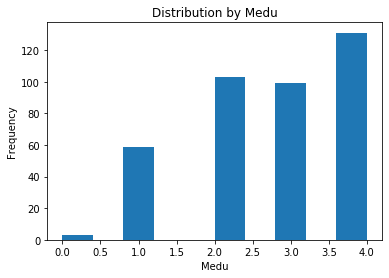

SkewtestResult(statistic=-2.5616005470251384, pvalue=0.010419107726853236)


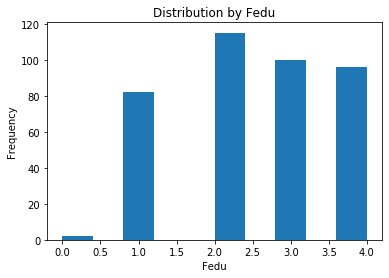

SkewtestResult(statistic=-0.2605953954710483, pvalue=0.7944045409072371)


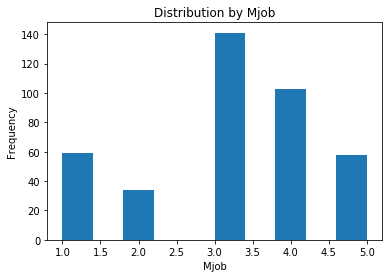

SkewtestResult(statistic=-2.6905691530395157, pvalue=0.007133024982562812)


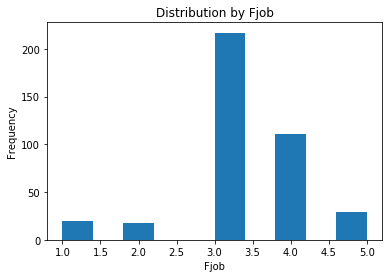

SkewtestResult(statistic=-2.8967620125165134, pvalue=0.003770356539839471)


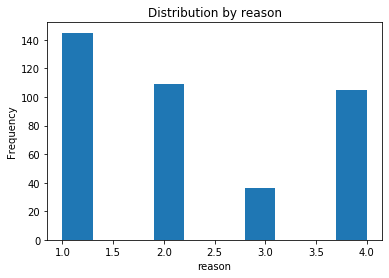

SkewtestResult(statistic=3.2504076079822495, pvalue=0.0011523970675973872)


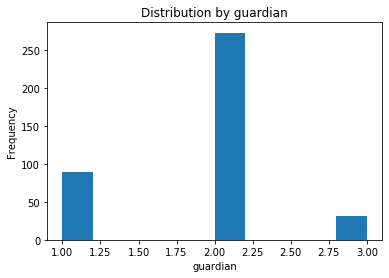

SkewtestResult(statistic=-0.9153453730912778, pvalue=0.36001034639565166)


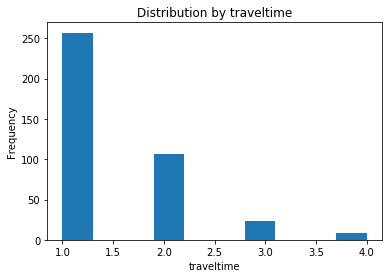

SkewtestResult(statistic=9.718624038411287, pvalue=2.5115227089406935e-22)


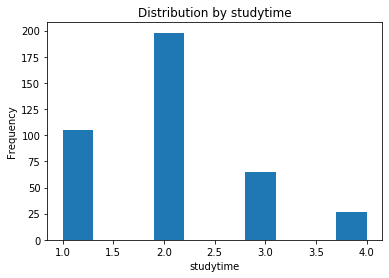

SkewtestResult(statistic=4.80804589769129, pvalue=1.5241277778808277e-06)


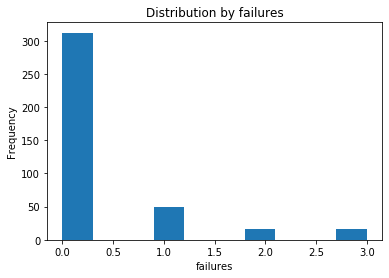

SkewtestResult(statistic=12.235612314226838, pvalue=2.005864572056999e-34)


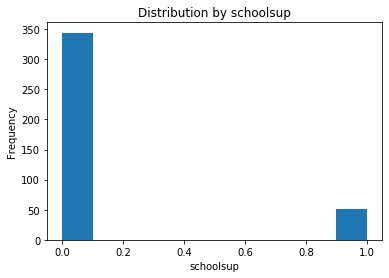

SkewtestResult(statistic=11.764699964743581, pvalue=5.93369155997175e-32)


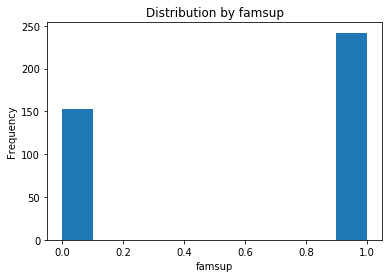

SkewtestResult(statistic=-3.650221137635864, pvalue=0.00026201463389685783)


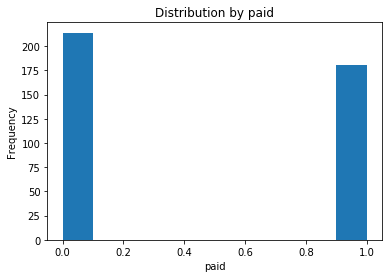

SkewtestResult(statistic=1.3761588430352003, pvalue=0.16877246109449773)


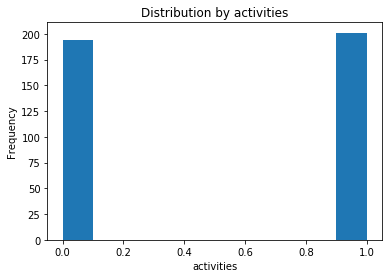

SkewtestResult(statistic=-0.29276316387871926, pvalue=0.7697031861278456)


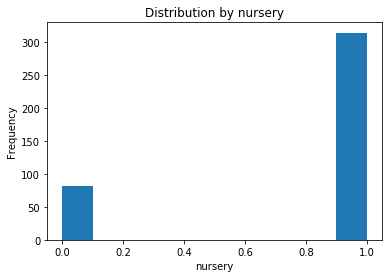

SkewtestResult(statistic=-9.162576051913772, pvalue=5.067295269889242e-20)


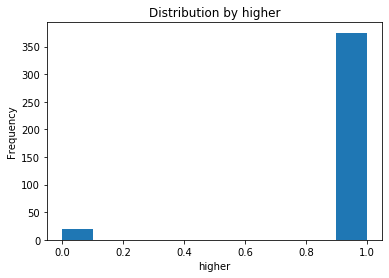

SkewtestResult(statistic=-15.877669527684434, pvalue=9.047806537398923e-57)


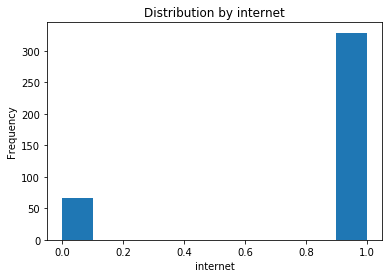

SkewtestResult(statistic=-10.393912953463776, pvalue=2.6428318482000557e-25)


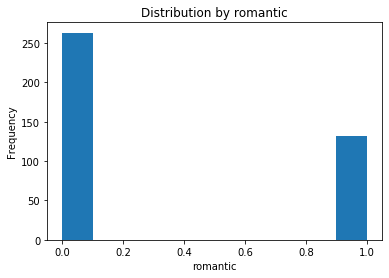

SkewtestResult(statistic=5.282650418247102, pvalue=1.273282151572874e-07)


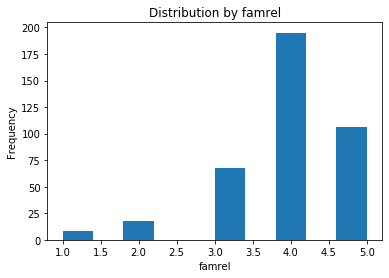

SkewtestResult(statistic=-6.728060294487712, pvalue=1.7193967864357673e-11)


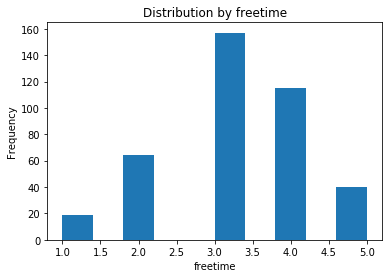

SkewtestResult(statistic=-1.3360754198036182, pvalue=0.18152462322428964)


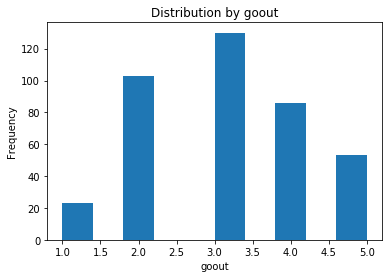

SkewtestResult(statistic=0.9557704651244029, pvalue=0.33918821304714375)


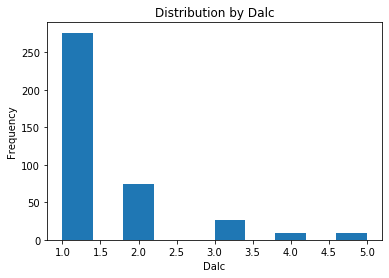

SkewtestResult(statistic=11.67723984494246, pvalue=1.6661838427210188e-31)


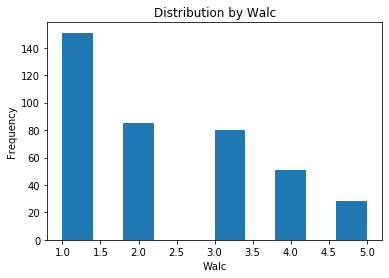

SkewtestResult(statistic=4.67440636831647, pvalue=2.9480509317839923e-06)


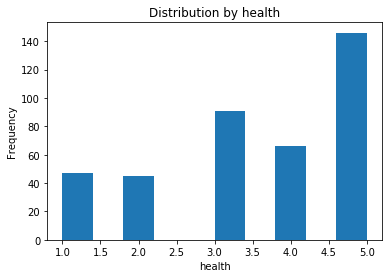

SkewtestResult(statistic=-3.8670536426449833, pvalue=0.00011015820354065956)


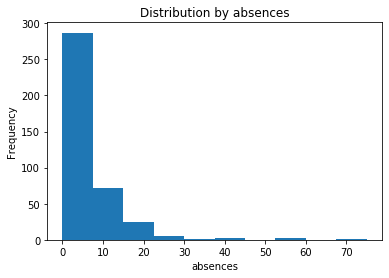

SkewtestResult(statistic=15.10509206354767, pvalue=1.4989690259596526e-51)


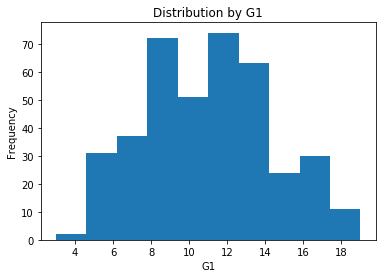

SkewtestResult(statistic=1.9542543863259996, pvalue=0.05067114032599224)


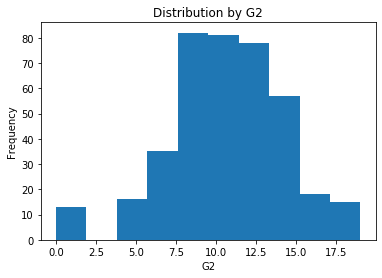

SkewtestResult(statistic=-3.412981769064488, pvalue=0.0006425624057662649)


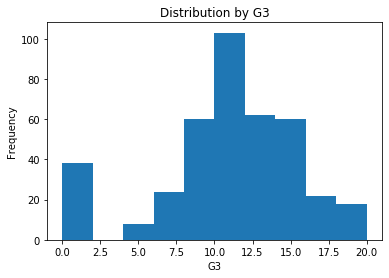

SkewtestResult(statistic=-5.451094912498647, pvalue=5.0060642288475175e-08)


In [183]:
# Mathematics Dataset

from scipy.stats import skewtest # Module for testing for skewness

for value in range(33):
    plt.hist(student_mat_df[columns[value]])
    plt.title('Distribution by '+ columns[value])
    plt.xlabel(columns[value])
    plt.ylabel("Frequency")
    plt.show()
    print(skewtest(a=student_mat_df[columns[value]], axis=0, nan_policy='propagate')) # skewtest


From the lots, only the grades 'G1', 'G2' and 'G3' seem to be normaly distributed from their bell shape.  The Z score (statistic)is a test of statistical significance that helps you decide whether or not to reject the null hypothesis. A high value indicates that you should reject the null hypotheis. The p-value is the probability that you have falsely rejected the null hypothesis. A large P value would indicate there is a high probability that you've falsely rejected the null hypothesis.
'G1', 'G2' and 'G3' have a very low P-value(<0.05) and Z-score (<2) indicating high prbability of the being normally distirbuted unlike the other variables with high Z-scores and P-values. 
Further tests can be conducted using statistical analysis packages such as scipy

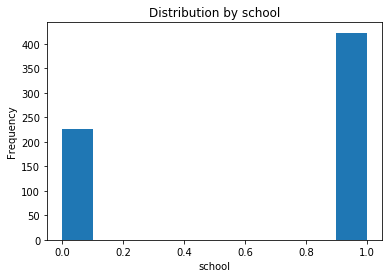

SkewtestResult(statistic=-6.174093723995801, pvalue=6.654405971299801e-10)


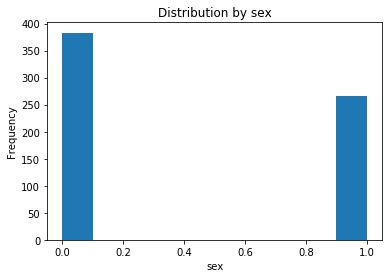

SkewtestResult(statistic=3.739928969788688, pvalue=0.00018407226318224734)


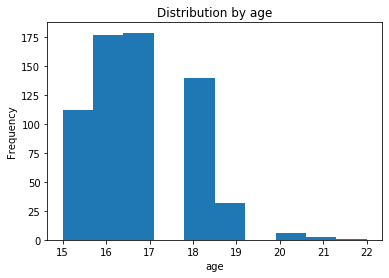

SkewtestResult(statistic=4.208707247081321, pvalue=2.5683589334078914e-05)


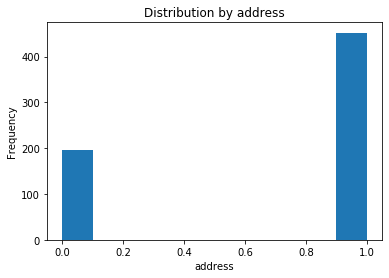

SkewtestResult(statistic=-7.876228434788237, pvalue=3.374111174108409e-15)


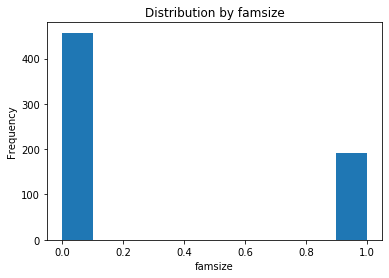

SkewtestResult(statistic=8.166420767777709, pvalue=3.1767387874180865e-16)


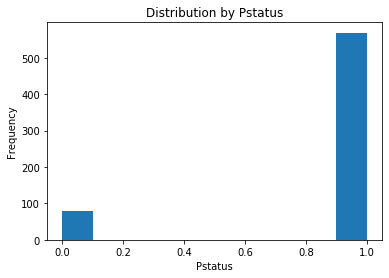

SkewtestResult(statistic=-15.195579625220322, pvalue=3.7830251057475286e-52)


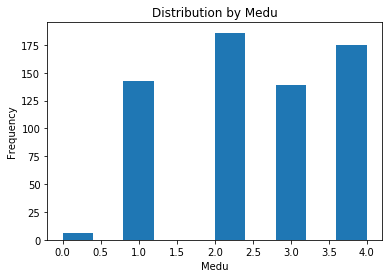

SkewtestResult(statistic=-0.3142007888917629, pvalue=0.753368543555698)


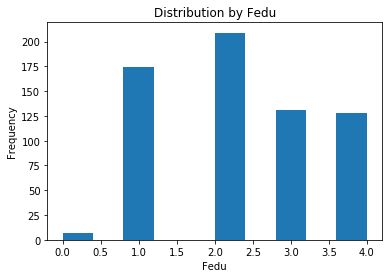

SkewtestResult(statistic=2.2351265380642826, pvalue=0.025409042580540196)


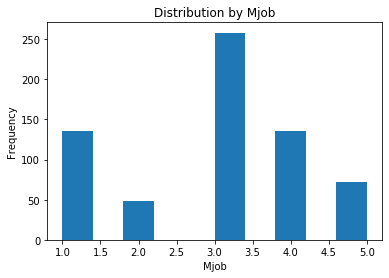

SkewtestResult(statistic=-1.9746141555097085, pvalue=0.04831195141565312)


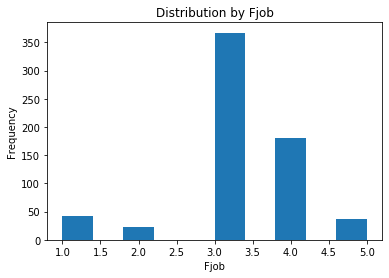

SkewtestResult(statistic=-5.305469639540149, pvalue=1.1238327278035048e-07)


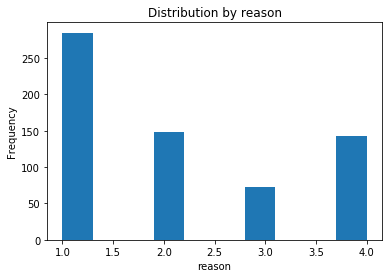

SkewtestResult(statistic=5.556850555874242, pvalue=2.746857448484827e-08)


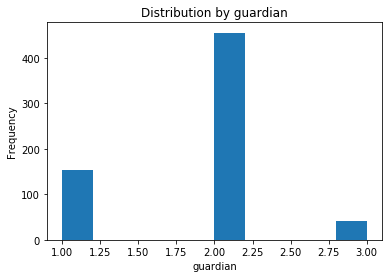

SkewtestResult(statistic=-2.09605394280607, pvalue=0.03607740602881395)


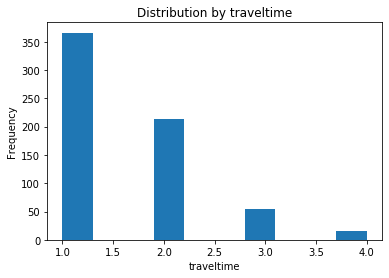

SkewtestResult(statistic=10.43041324691084, pvalue=1.8010328958276356e-25)


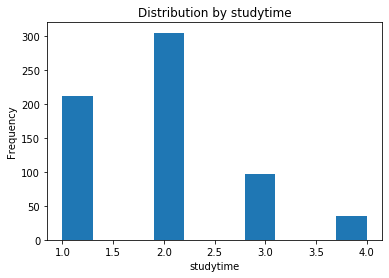

SkewtestResult(statistic=6.672943914363787, pvalue=2.507222303944466e-11)


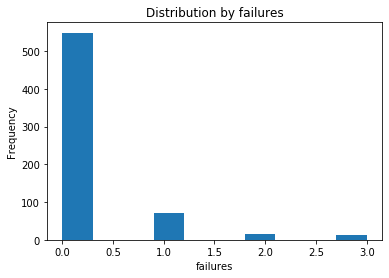

SkewtestResult(statistic=17.673341653028682, pvalue=6.729015472522551e-70)


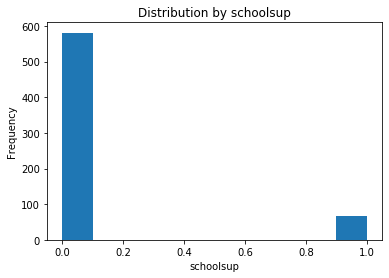

SkewtestResult(statistic=16.17706731135912, pvalue=7.319893092328646e-59)


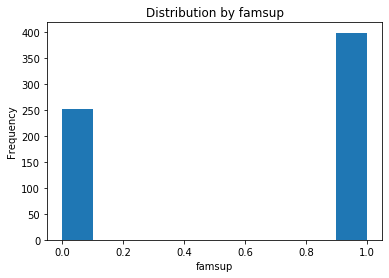

SkewtestResult(statistic=-4.6664029880925515, pvalue=3.065182615441649e-06)


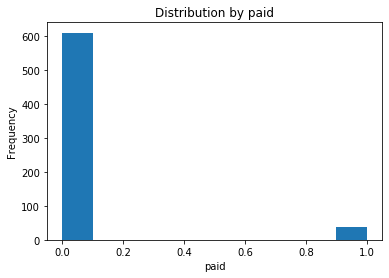

SkewtestResult(statistic=19.218340746626453, pvalue=2.5995055752592348e-82)


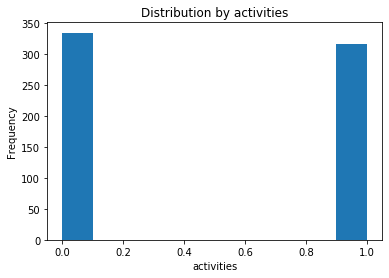

SkewtestResult(statistic=0.6155597349415263, pvalue=0.5381851329938186)


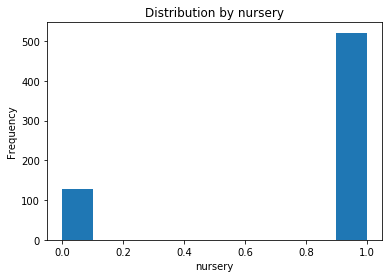

SkewtestResult(statistic=-11.93274758533894, pvalue=7.989227100588164e-33)


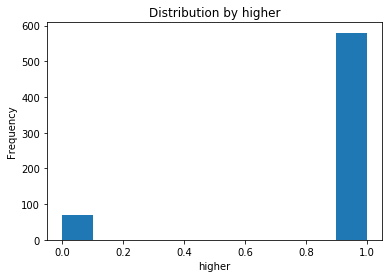

SkewtestResult(statistic=-16.091089634419916, pvalue=2.9460638727073512e-58)


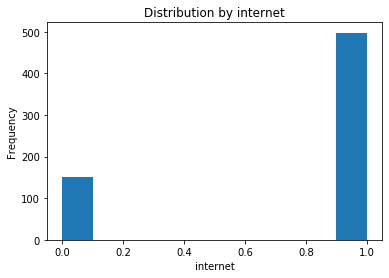

SkewtestResult(statistic=-10.550177696512149, pvalue=5.070111477126093e-26)


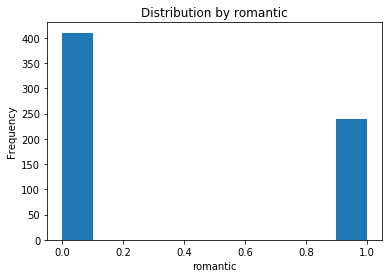

SkewtestResult(statistic=5.395592282922009, pvalue=6.82978779761389e-08)


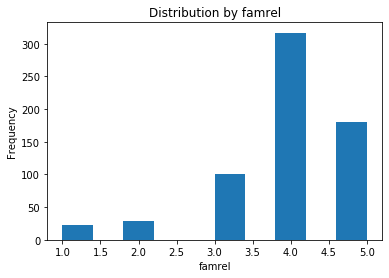

SkewtestResult(statistic=-9.571270215343716, pvalue=1.0560018809458045e-21)


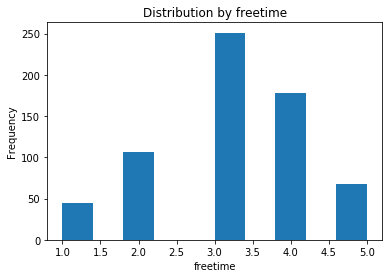

SkewtestResult(statistic=-1.8874221323709426, pvalue=0.059103570591128946)


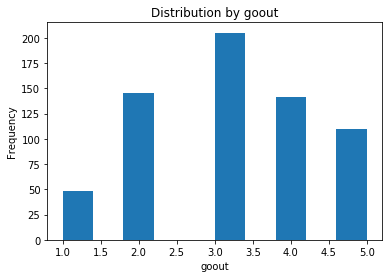

SkewtestResult(statistic=-0.0900271713270363, pvalue=0.9282656228984689)


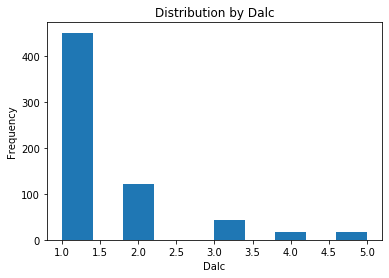

SkewtestResult(statistic=14.622896844358683, pvalue=2.0067676593320745e-48)


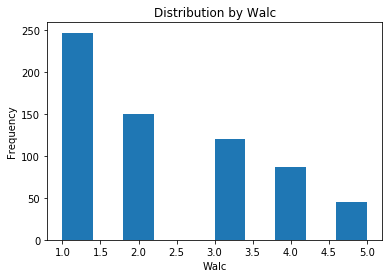

SkewtestResult(statistic=6.151406119610557, pvalue=7.679898141771071e-10)


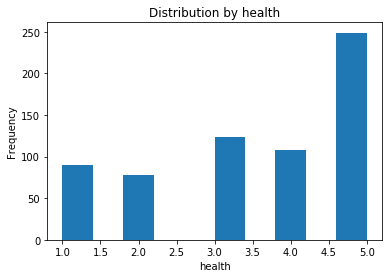

SkewtestResult(statistic=-4.979330111689303, pvalue=6.38047326304796e-07)


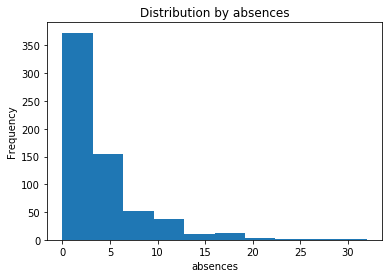

SkewtestResult(statistic=14.150412063272494, pvalue=1.856661577919941e-45)


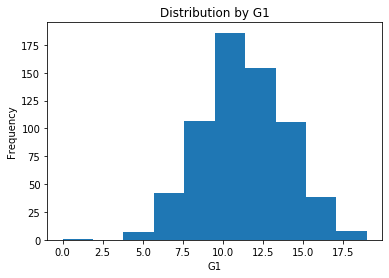

SkewtestResult(statistic=-0.0291036653877324, pvalue=0.9767819124809529)


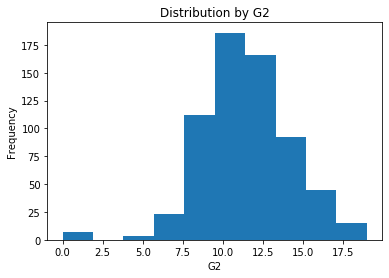

SkewtestResult(statistic=-3.671398601981705, pvalue=0.00024122678105137593)


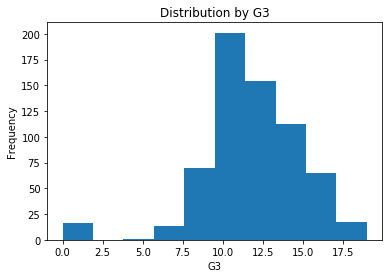

SkewtestResult(statistic=-8.281651252201831, pvalue=1.214789121207637e-16)


In [184]:
# Portugese Dataset

from scipy.stats import skewtest # Module for testing for skewness

for value in range(33):
    plt.hist(student_por_df[columns[value]])
    plt.title('Distribution by '+ columns[value])
    plt.xlabel(columns[value])
    plt.ylabel("Frequency")
    plt.show()
    print(skewtest(a=student_por_df[columns[value]], axis=0, nan_policy='propagate')) # skewtest


Only 'G2' has a p-value below 0.05. Hence only 'G2' has a normal distributuion. 'G1' is bell shaped but the pvalue is very high 0.976.

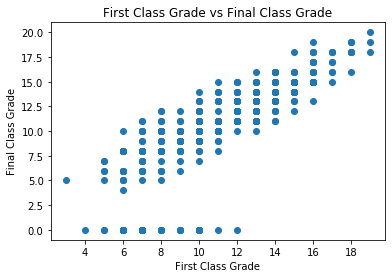

In [185]:
# Mathematics Dataset

# Scatter plot for first class grade vs final grade

plt.scatter(student_mat_df.G1, student_mat_df.G3)
plt.title("First Class Grade vs Final Class Grade")
plt.xlabel ('First Class Grade')
plt.ylabel ('Final Class Grade')
plt.show()

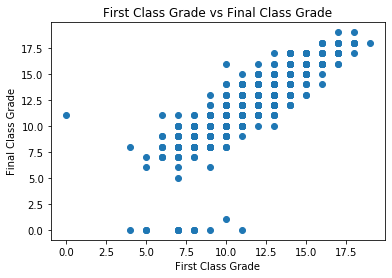

In [186]:
# Portugese Dataset

# Scatter plot for first class grade vs final grade

plt.scatter(student_por_df.G1, student_por_df.G3)
plt.title("First Class Grade vs Final Class Grade")
plt.xlabel ('First Class Grade')
plt.ylabel ('Final Class Grade')
plt.show()

For both datasets:

Final grade increase with increase in first grade.
The plot indicates positive linear correlation between the first class grade and the final grade.
hence, the first class grade can be used to predict the final grade.

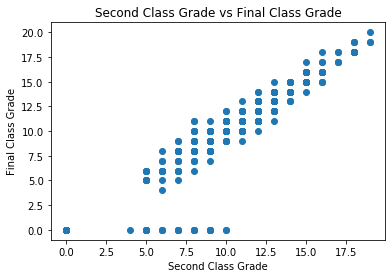

In [187]:
# Mathematics Dataset

# scatter plot of second grade vs final grade

plt.scatter(student_mat_df.G2, student_mat_df.G3)
plt.title("Second Class Grade vs Final Class Grade")
plt.xlabel ("Second Class Grade")
plt.ylabel ('Final Class Grade')
plt.show()

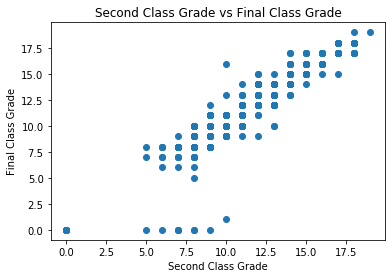

In [188]:
# Portugese Dataset

# scatter plot of second grade vs final grade

plt.scatter(student_por_df.G2, student_por_df.G3)
plt.title("Second Class Grade vs Final Class Grade")
plt.xlabel ("Second Class Grade")
plt.ylabel ('Final Class Grade')
plt.show()

For both datasets:

Final grade increase with increase in second class grade.
The plot indicates positive linear correlation between the second class grade and the final grade.
hence, the second class grade can be used to predict the final grade.

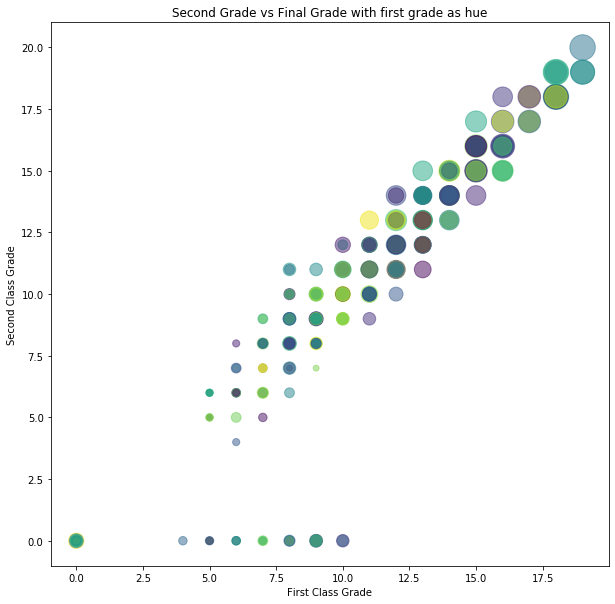

In [189]:
# Mathematics Dataset

# scatter plot of the three grades
N = 395
colors = np.random.rand(N)
plt.figure(figsize=(10,10))
plt.scatter(student_mat_df.G2, student_mat_df.G3, s=student_mat_df.G1 **2.2, c=colors, alpha=0.5)
plt.title('Second Grade vs Final Grade with first grade as hue')
plt.xlabel("First Class Grade")
plt.ylabel("Second Class Grade")
plt.show()

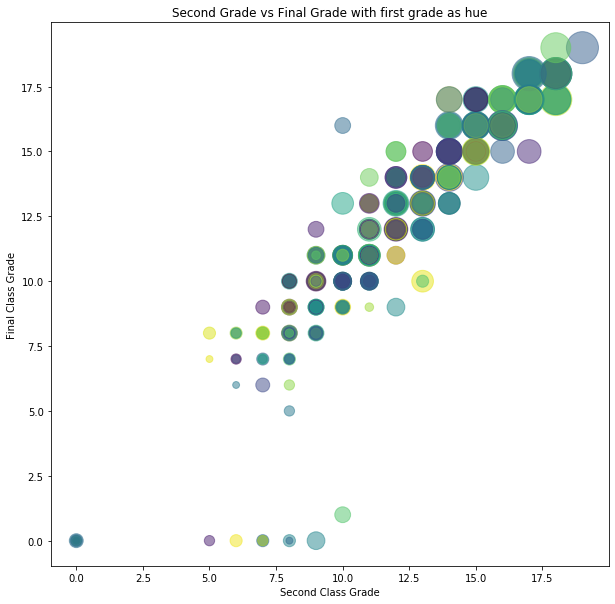

In [190]:
# Portugese Dataset

# scatter plot of the three grades
N = 649
colors = np.random.rand(N)
plt.figure(figsize=(10,10))
plt.scatter(student_por_df.G2, student_por_df.G3, s=student_por_df.G1 **2.4, c=colors, alpha=0.5)
plt.title('Second Grade vs Final Grade with first grade as hue')
plt.xlabel("Second Class Grade")
plt.ylabel("Final Class Grade")
plt.show()

For both datasets:

Final grade increases with increase in second class grade, and an increase in first class grade as indicated by the growing size of the dots.
The plot indicates positive linear correlation between the second class grade and the first class grade.
hence, this indicates a strong correlation between the three grades.

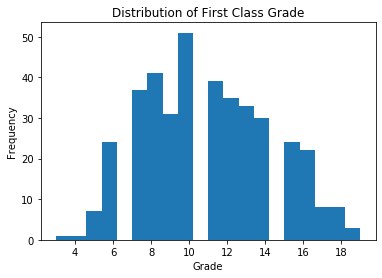

SkewtestResult(statistic=1.9542543863259996, pvalue=0.05067114032599224)

In [191]:
# Mathematics Dataset

# Distribution of First Class Grade

plt.hist(student_mat_df.G1, bins=20)
plt.title('Distribution of First Class Grade')
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()


skewtest(a=student_mat_df.G1, axis=0, nan_policy='propagate')

The shape of the distribution resembles a normal one. 
The plot also shows that there are no extreme outliers.The Z score is a test of statistical significance that helps you decide whether or not to reject the null hypothesis. The p-value is the probability that you have falsely rejected the null hypothesis. Our P-value is very small hence we can assume that the distribution is normal.

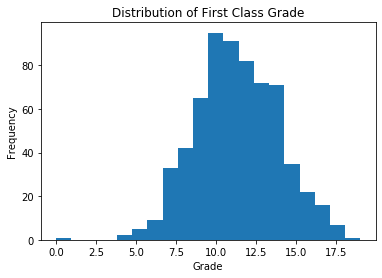

SkewtestResult(statistic=-0.0291036653877324, pvalue=0.9767819124809529)

In [192]:
# Portugese Dataset

# Distribution of First Class Grade

plt.hist(student_por_df.G1, bins=20)
plt.title('Distribution of First Class Grade')
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()


skewtest(a=student_por_df.G1, axis=0, nan_policy='propagate')

The shape of the distribution resembles a normal one. The plot also shows that there are no extreme outliers. Our P-value is above 0.05 hence we cannot assume that the distribution is normal.

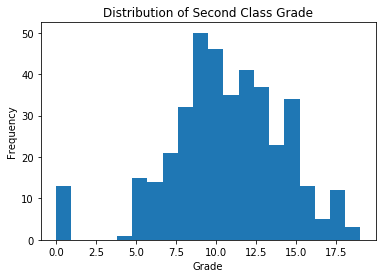

SkewtestResult(statistic=-3.412981769064488, pvalue=0.0006425624057662649)

In [193]:
# Mathematics Dataset

# Distribution of Second Class Grade

plt.hist(student_mat_df.G2, bins=20)
plt.title('Distribution of Second Class Grade')
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()

skewtest(a=student_mat_df.G2, axis=0, nan_policy='propagate')  # skewness test

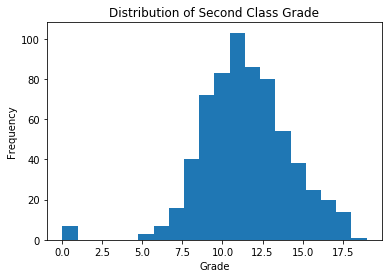

SkewtestResult(statistic=-3.671398601981705, pvalue=0.00024122678105137593)

In [194]:
# Portugese Dataset

# Distribution of Second Class Grade

plt.hist(student_por_df.G2, bins=20)
plt.title('Distribution of Second Class Grade')
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()

skewtest(a=student_por_df.G2, axis=0, nan_policy='propagate')  # skewness test

Both dadasets have a p-value below 0.05 and from the shape of the distribution, the data is normal.

### Skewness Test
Test whether the skew is different from the normal distribution.
This function tests the null hypothesis that the skewness of the population that the sample was drawn from is the same as that of a corresponding normal distribution.
The shape of the distribution resembles a normal one. 
From the plot, the number of scores = zero are significant 
and depart from the normal curve.
They present as outliers which displace the mean.
This may create the need to deal with outliers. However, from the p-value it is safe to assume that the distribution is normal.

### Scatter Plots and Box plots

While scatter plots are good for visualizing how data is distributed relative to two  or three variables, box plots give more insights on outliers, mean, median, maximum and minimum values among other measures. Hence, box plots give more insights on top of what the scatter plots offer. 

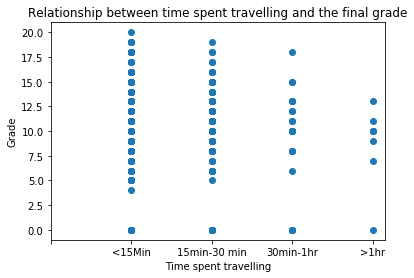

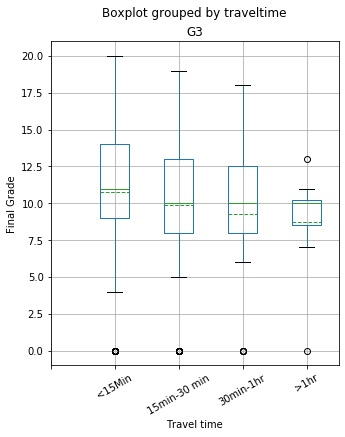

In [195]:
# Mathematics Dataset

# Relationship between time spent travelling and the final grade

# scatter plot of travelling time vs final grade
plt.scatter(student_mat_df.traveltime, student_mat_df.G3)
plt.title("Relationship between time spent travelling and the final grade")
plt.xticks(np.arange(5), ('', '<15Min', '15min-30 min', '30min-1hr','>1hr'))
plt.xlabel("Time spent travelling")
plt.ylabel("Grade")
plt.show()

# box plot of travelling time vs final  grade
student_mat_df.boxplot('G3','traveltime',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(5), ('', '<15Min', '15min-30 min', '30min-1hr','>1hr'))
plt.xlabel("Travel time")
plt.ylabel('Final Grade')
plt.show()

Students with less trevel time have higher average showing a negative correlation.and max score as well as the least maximum score
and the scores are also widespread from the mean.
With more travel time, the average reduces, and most of the scores are nearer the mean.

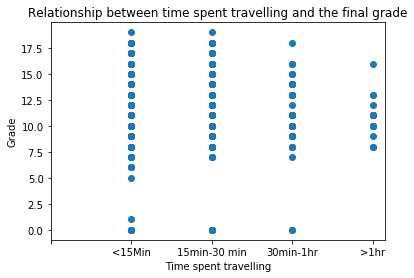

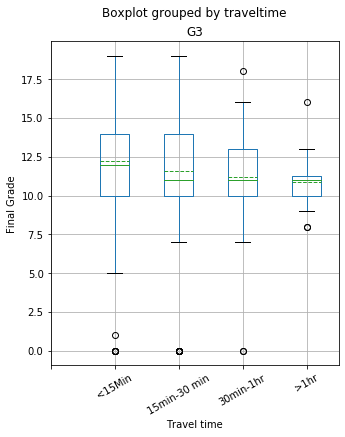

In [196]:
# Portugese Dataset

# Relationship between time spent travelling and the final grade

# scatter plot of travelling time vs final grade
plt.scatter(student_por_df.traveltime, student_por_df.G3)
plt.title("Relationship between time spent travelling and the final grade")
plt.xticks(np.arange(5), ('', '<15Min', '15min-30 min', '30min-1hr','>1hr'))
plt.xlabel("Time spent travelling")
plt.ylabel("Grade")
plt.show()

# box plot of travelling time vs final  grade
student_por_df.boxplot('G3','traveltime',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(5), ('', '<15Min', '15min-30 min', '30min-1hr','>1hr'))
plt.xlabel("Travel time")
plt.ylabel('Final Grade')
plt.show()

The average score reduces with increase in the amount of travel time. Thus, travel time and final grade have a negative correlation.

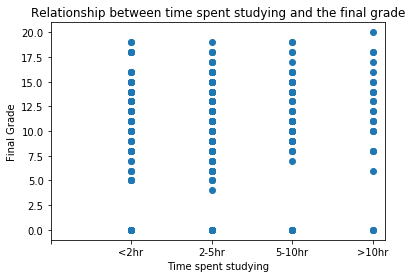

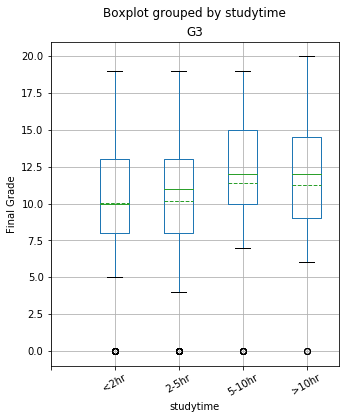

In [197]:
# Mathematics Dataset

# scatter plot of study time vs final grade
plt.scatter(student_mat_df.studytime, student_mat_df.G3)
plt.xticks(np.arange(5), ('', '<2hr', '2-5hr', '5-10hr','>10hr'))
plt.title("Relationship between time spent studying and the final grade")
plt.xlabel("Time spent studying")
plt.ylabel("Final Grade")
plt.show()

# box plot of study time vs final grade
student_mat_df.boxplot('G3','studytime',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(5), ('', '<2hr', '2-5hr', '5-10hr','>10hr'))
plt.xlabel("studytime")
plt.ylabel('Final Grade')
plt.show()

With more study time, the average increases. 
The maximum and minimum score increases
showing a positive linear correlation.

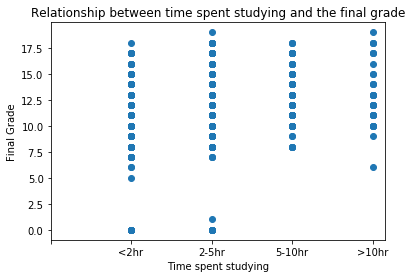

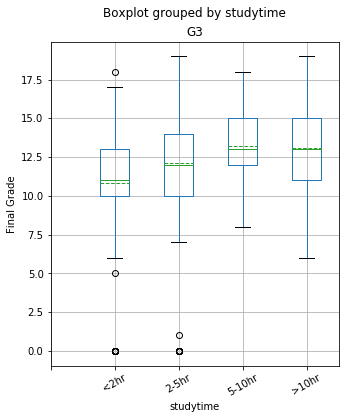

In [198]:
# Portugese Dataset

# scatter plot of study time vs final grade
plt.scatter(student_por_df.studytime, student_por_df.G3)
plt.xticks(np.arange(5), ('', '<2hr', '2-5hr', '5-10hr','>10hr'))
plt.title("Relationship between time spent studying and the final grade")
plt.xlabel("Time spent studying")
plt.ylabel("Final Grade")
plt.show()

# box plot of study time vs final grade
student_por_df.boxplot('G3','studytime',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(5), ('', '<2hr', '2-5hr', '5-10hr','>10hr'))
plt.xlabel("studytime")
plt.ylabel('Final Grade')
plt.show()

With more study time, the average increases. The maximum and minimum score increases showing a positive linear correlation.

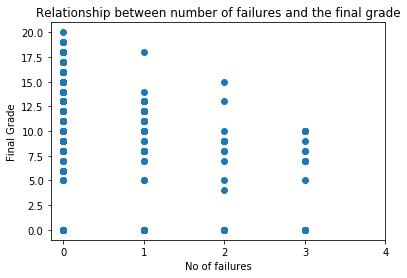

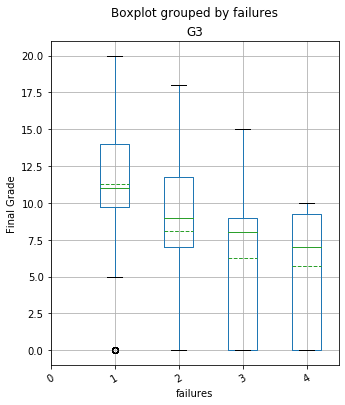

In [199]:
# Mathematics Dataset

# scatter plot of number of failures vs final grade
plt.scatter(student_mat_df.failures, student_mat_df.G3)
plt.title("Relationship between number of failures and the final grade")
plt.xticks(np.arange(5), ('0', '1', '2', '3','4'))
plt.xlabel("No of failures")
plt.ylabel("Final Grade") 
plt.show()

# box plot of number of failures vs final grade
student_mat_df.boxplot('G3','failures',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(5), ('0', '1', '2', '3','4'))
plt.xlabel("failures")
plt.ylabel('Final Grade')
plt.show()

The average, maximum and minimum scores all reduce significantly as the number of times the student fails increases.
This indicates a negative linear correlation between the number of failures and the final grade.

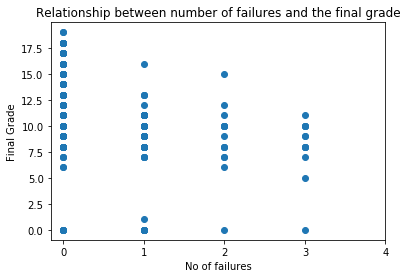

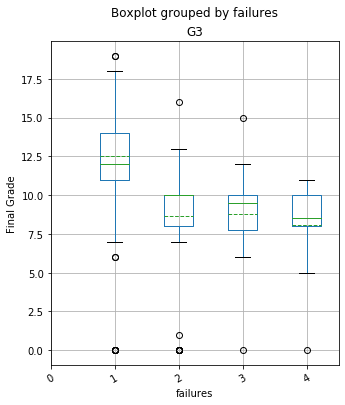

In [200]:
# Portugese Dataset

# scatter plot of number of failures vs final grade
plt.scatter(student_por_df.failures, student_por_df.G3)
plt.title("Relationship between number of failures and the final grade")
plt.xticks(np.arange(5), ('0', '1', '2', '3','4'))
plt.xlabel("No of failures")
plt.ylabel("Final Grade") 
plt.show()

# box plot of number of failures vs final grade
student_por_df.boxplot('G3','failures',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(5), ('0', '1', '2', '3','4'))
plt.xlabel("failures")
plt.ylabel('Final Grade')
plt.show()

The average, maximum and minimum scores all reduce significantly as the number of times the student fails increases.
This indicates a negative linear correlation between the number of failures and the final grade.

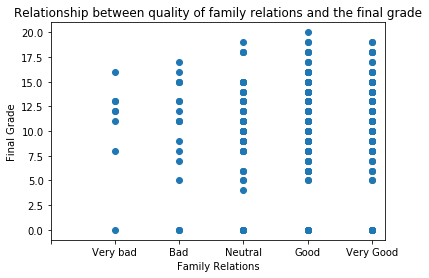

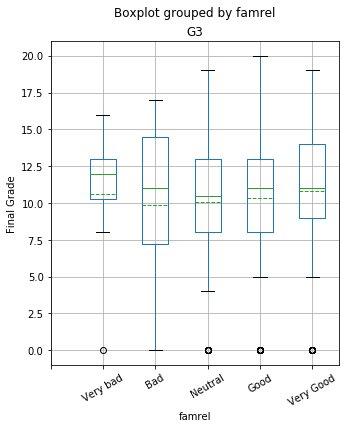

In [201]:
# Mathematics Dataset

# scatter plot of nature of family relations vs final grade
plt.scatter(student_mat_df.famrel, student_mat_df.G3)
plt.title("Relationship between quality of family relations and the final grade")
plt.xlabel("Family Relations")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very bad', 'Bad', 'Neutral', 'Good', 'Very Good'))
plt.show()

# box plot of nature of family relations vs final grade
student_mat_df.boxplot('G3','famrel',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(6), ('', 'Very bad', 'Bad', 'Neutral', 'Good', 'Very Good'))
plt.xlabel("famrel")
plt.ylabel('Final Grade')
plt.show()

Student at the extremes of family relations, i.e. very good and ver bad,
have less widespread scores with reagards to the mean. They also have beeter 
average scores which tends to dip as we move to more neutral realtions.
Those with the worst family realtions have the highest average score,
but with the lowest maximum and interestingly highest maximum.

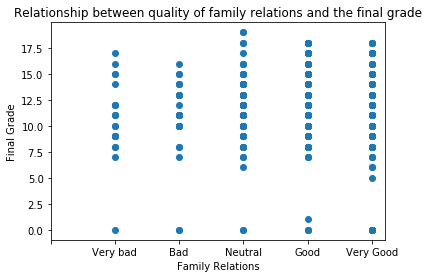

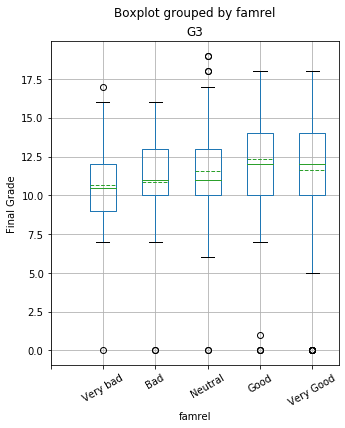

In [202]:
# Portugese Dataset

# scatter plot of nature of family relations vs final grade
plt.scatter(student_por_df.famrel, student_por_df.G3)
plt.title("Relationship between quality of family relations and the final grade")
plt.xlabel("Family Relations")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very bad', 'Bad', 'Neutral', 'Good', 'Very Good'))
plt.show()

# box plot of nature of family relations vs final grade
student_por_df.boxplot('G3','famrel',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(6), ('', 'Very bad', 'Bad', 'Neutral', 'Good', 'Very Good'))
plt.xlabel("famrel")
plt.ylabel('Final Grade')
plt.show()

The scores become more widespread as family relations become better such that students who rated their family relations as very bad have the least minimum and the lowest maximum, the vice versa is true for the 'very good' category. The average score also increases as family relations get better.

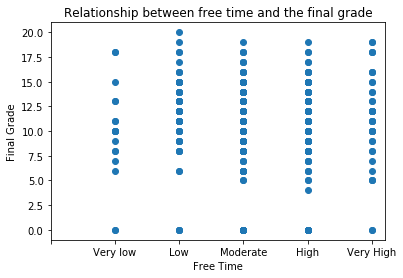

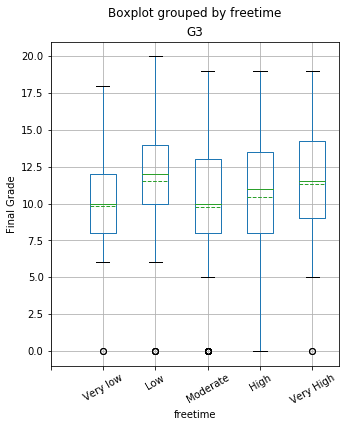

In [203]:
# Mathematics Dataset

# scatter plot of free time relations vs final grade
plt.scatter(student_mat_df.freetime, student_mat_df.G3)
plt.title("Relationship between free time and the final grade")
plt.xlabel("Free Time")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.show()

# box plot of free time relations vs final grade
student_mat_df.boxplot('G3','freetime',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.xlabel("freetime")
plt.ylabel('Final Grade')
plt.show()

In a very general sense, Students with more free time perform better than those with less in terms of the average and maximum grade. The interesting part is noting that those in the 'low' category depart from the trend, as they have the highest average and maximum and the least minimum score. This could be ttributed to the fact that, they have more study time hence less free time, and more study time means better scores.

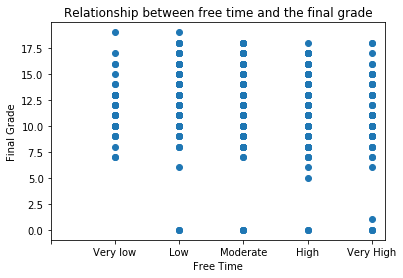

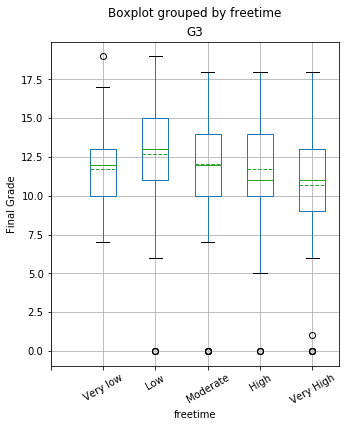

In [204]:
# Portugese Dataset

# scatter plot of free time relations vs final grade
plt.scatter(student_por_df.freetime, student_por_df.G3)
plt.title("Relationship between free time and the final grade")
plt.xlabel("Free Time")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.show()

# box plot of free time relations vs final grade
student_por_df.boxplot('G3','freetime',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.xlabel("freetime")
plt.ylabel('Final Grade')
plt.show()

The average of the categories makes an inverted U-shape. Students with low free time have the highest average and maximum, while it decreases towards the extremes.

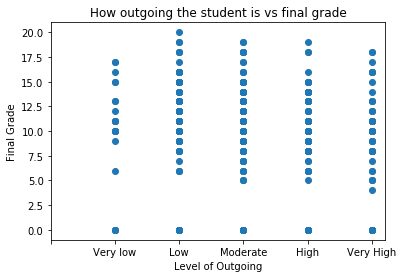

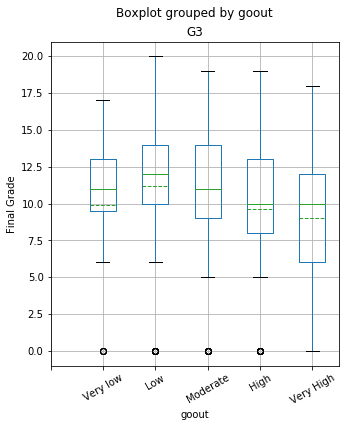

In [205]:
# Mathematics Dataset

# scatter plot of level of outgoingness vs final grade
plt.scatter(student_mat_df.goout, student_mat_df.G3)
plt.title("How outgoing the student is vs final grade")
plt.xlabel("Level of Outgoing")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.show()

# box plot of level of outgoingness vs final grade
student_mat_df.boxplot('G3','goout',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.xlabel("goout")
plt.ylabel('Final Grade')
plt.show()

The averages almost make an inverted U-shape. Students who don't go out less often (the 'low' category) have the highest average and maximum, while it decreases towards the extremes. This could be attributed to the fact that, they have more study time hence less go out less, and more study time means better scores.

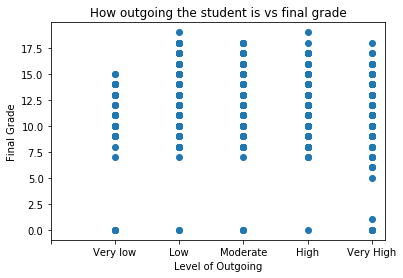

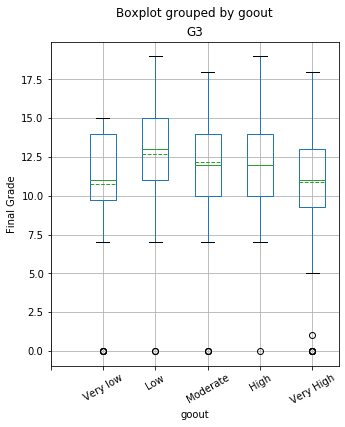

In [206]:
# Portugese Dataset

# scatter plot of level of outgoingness vs final grade
plt.scatter(student_por_df.goout, student_por_df.G3)
plt.title("How outgoing the student is vs final grade")
plt.xlabel("Level of Outgoing")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.show()

# box plot of level of outgoingness vs final grade
student_por_df.boxplot('G3','goout',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.xlabel("goout")
plt.ylabel('Final Grade')
plt.show()

Again, the averages almost make a U-shape. Students who go out fewer times ('low') perform better in terms of maximum, average and minimum score. Those at the extremes have lowest maximum and average but the ones who go out most often have a significantly
lower average and minimum score.

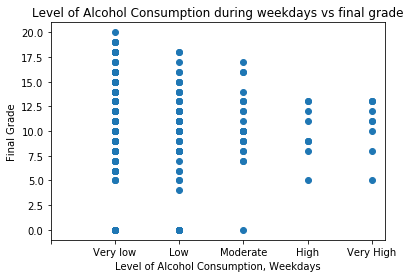

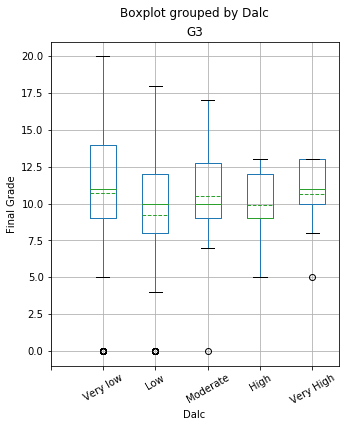

In [207]:
# Mathematics Dataset

# scatter plot of level of alcohol consumption on weekdays vs final grade
plt.scatter(student_mat_df.Dalc, student_mat_df.G3)
plt.title("Level of Alcohol Consumption during weekdays vs final grade")
plt.xlabel("Level of Alcohol Consumption, Weekdays")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.show()

# box plot of level of alcohol consumption on weekdays vs final grade
student_mat_df.boxplot('G3','Dalc',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.xlabel("Dalc")
plt.ylabel('Final Grade')
plt.show()

Student who drink more alcohol during week days get increasingly lower maximum scores. 
It is worth noting however the 'low' category has the lowest average which could be attributed to more outliers on the lower side.
Interestingly, those with the highest consumption have the least minimum score with zero or few outliers, unlike those with lower consumtion whosescores are more widespread from the mean with more outliers.

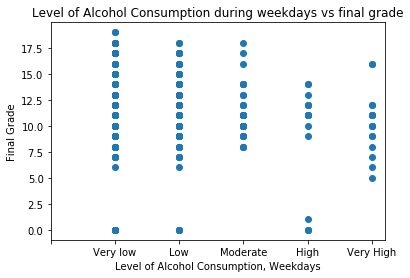

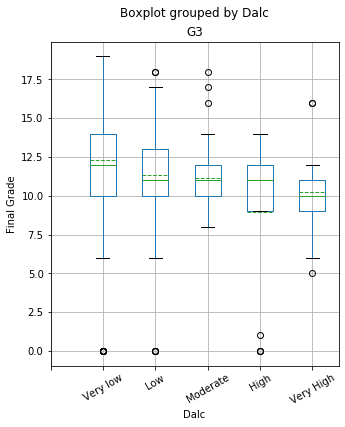

In [208]:
# Portugese Dataset

# scatter plot of level of alcohol consumption on weekdays vs final grade
plt.scatter(student_por_df.Dalc, student_por_df.G3)
plt.title("Level of Alcohol Consumption during weekdays vs final grade")
plt.xlabel("Level of Alcohol Consumption, Weekdays")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.show()

# box plot of level of alcohol consumption on weekdays vs final grade
student_por_df.boxplot('G3','Dalc',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.xlabel("Dalc")
plt.ylabel('Final Grade')
plt.show()

The average score decreases with increase in weekday alcohol consumption. The relationship is negatively linearly correlated.

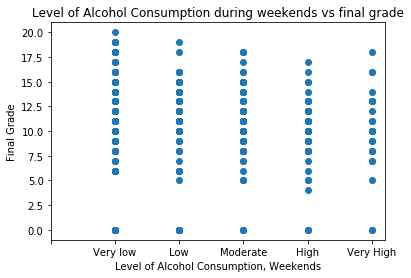

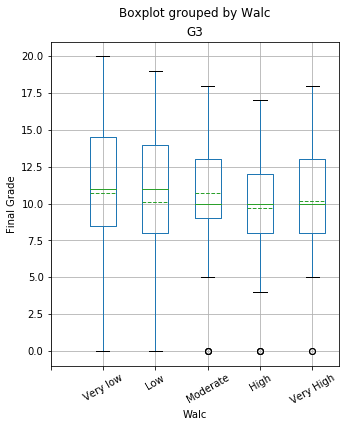

In [209]:
# Mathematics Dataset

# scatter plot of level of alcohol consumption on weekends vs final grade
plt.scatter(student_mat_df.Walc, student_mat_df.G3)
plt.title("Level of Alcohol Consumption during weekends vs final grade")
plt.xlabel("Level of Alcohol Consumption, Weekends")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.show()

# box plot of level of alcohol consumption on weekends vs final grade
student_mat_df.boxplot('G3','Walc',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.xlabel("Walc")
plt.ylabel('Final Grade')
plt.show()

The average and maximum score decrease with increased alcohol consumption over the weekend. 
The deviation is not as significant as is with weekday consumption. 
Again with higher consumption, scores are less widespread from the mean but with more outliers on the lower end.

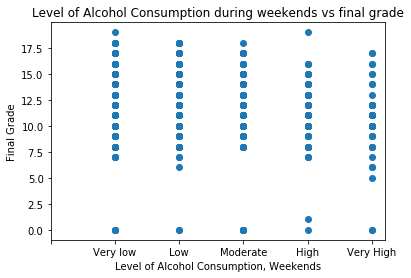

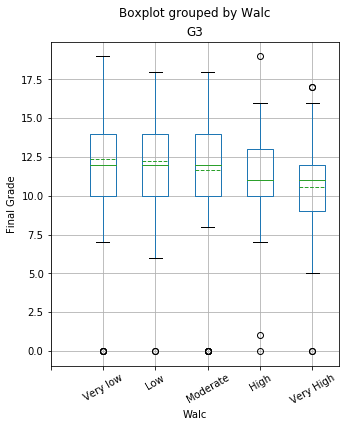

In [210]:
# Portugese Dataset

# scatter plot of level of alcohol consumption on weekends vs final grade
plt.scatter(student_por_df.Walc, student_por_df.G3)
plt.title("Level of Alcohol Consumption during weekends vs final grade")
plt.xlabel("Level of Alcohol Consumption, Weekends")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.show()

# box plot of level of alcohol consumption on weekends vs final grade
student_por_df.boxplot('G3','Walc',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.xlabel("Walc")
plt.ylabel('Final Grade')
plt.show()

The average and maximum score decrease with increased alcohol consumption over the weekend. 
The deviation is not as significant as is with weekday consumption. 
Again with higher consumption, scores are less widespread from the mean but with more outliers on the lower end.

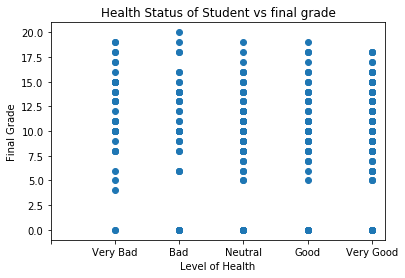

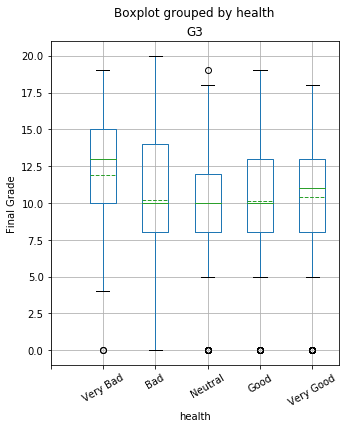

In [211]:
# Mathematics Dataset

# scatter plot of health status vs final grade
plt.scatter(student_mat_df.health, student_mat_df.G3)
plt.title("Health Status of Student vs final grade")
plt.xlabel("Level of Health")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very Bad', 'Bad', 'Neutral', 'Good', 'Very Good'))
plt.show()

# box plot of health status vs final grade
student_mat_df.boxplot('G3','health',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(6), ('', 'Very Bad', 'Bad', 'Neutral', 'Good', 'Very Good'))
plt.xlabel("health")
plt.ylabel('Final Grade')
plt.show()

Student who rated their family relations as 'very bad' have the highest average and a relatively high maximum score
regardless of outliers on the lower end. The average dips at the centre then rises again towards the 'very good' category.
Generally students at the extremes have better performance.

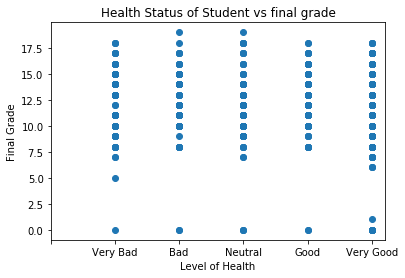

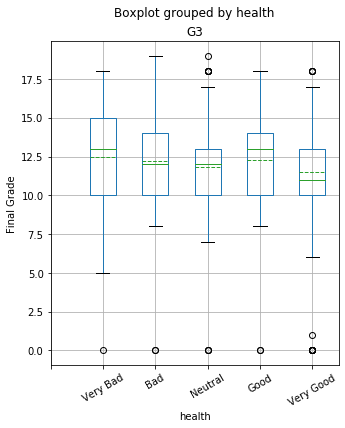

In [212]:
# Portugese Dataset

# scatter plot of health status vs final grade
plt.scatter(student_por_df.health, student_por_df.G3)
plt.title("Health Status of Student vs final grade")
plt.xlabel("Level of Health")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very Bad', 'Bad', 'Neutral', 'Good', 'Very Good'))
plt.show()

# box plot of health status vs final grade
student_por_df.boxplot('G3','health',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(6), ('', 'Very Bad', 'Bad', 'Neutral', 'Good', 'Very Good'))
plt.xlabel("health")
plt.ylabel('Final Grade')
plt.show()

Student who rated their family relations as 'very bad' have the highest average and a relatively high maximum score
regardless of outliers on the lower end. The average decreases towards the 'very good' category.
Generally students with bad family relations perform better.

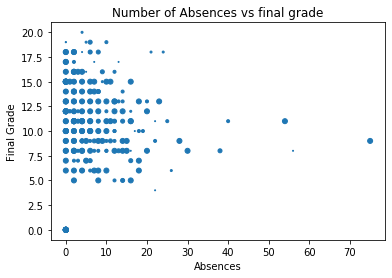

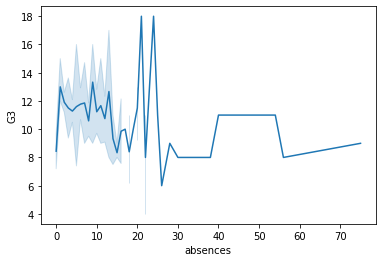

In [213]:
# Mathematics Dataset

# scatter plot of absences vs final grade
plt.scatter(student_mat_df.absences, student_mat_df.G3, s=student_mat_df.health**2, cmap='bone' )
plt.title("Number of Absences vs final grade")
plt.xlabel("Absences")
plt.ylabel("Final Grade")
plt.show()

# line plot of absences vs final grade
ax = sns.lineplot(x=student_mat_df.absences, y=student_mat_df.G3, )

students with fewer absences perform better.

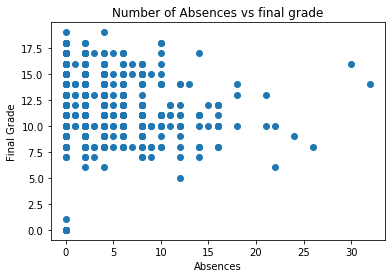

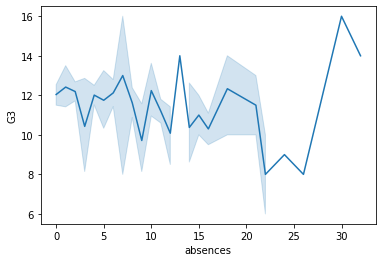

In [214]:
# Portugese Dataset

# scatter plot of absences vs final grade
plt.scatter(student_por_df.absences, student_por_df.G3)
plt.title("Number of Absences vs final grade")
plt.xlabel("Absences")
plt.ylabel("Final Grade")
plt.show()

# line plot of absences vs final grade
ax = sns.lineplot(x=student_por_df.absences, y=student_por_df.G3, )

students with fewer absences perform better.

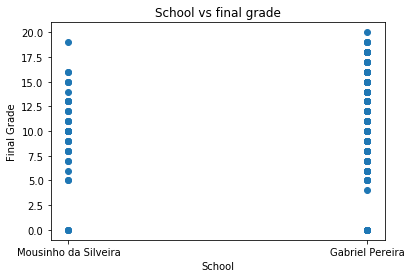

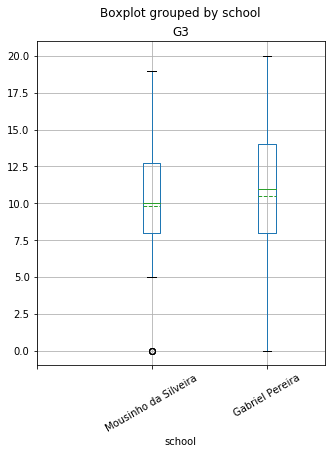

In [215]:
# Mathematics Dataset

# scatter plot of school vs final grade
plt.scatter(student_mat_df.school, student_mat_df.G3)
plt.title("School vs final grade")
plt.xlabel("School")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'Mousinho da Silveira', 'Gabriel Pereira'))
plt.show()

# scatter plot of school vs final grade
student_mat_df.boxplot('G3','school',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'Mousinho da Silveira', 'Gabriel Pereira'))
plt.show()

Gabriel Pereira School generally perfroms better with a higher average.
However, the scores are more widespread from the mean as such it has the highest maximum score and the lowest minimum score.
The converse is true for Mousinho da Silveira. It has a lower average, but the scores are less widespread from the mean.
It has a lower maximum and a higher minimum.

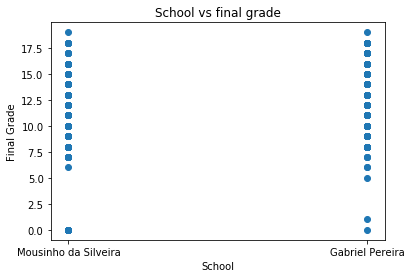

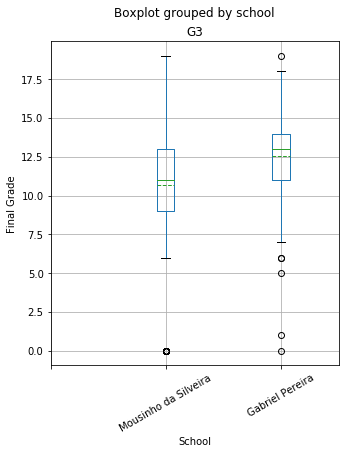

In [216]:
# Portugese Dataset

# scatter plot of school vs final grade
plt.scatter(student_por_df.school, student_por_df.G3)
plt.title("School vs final grade")
plt.xlabel("School")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'Mousinho da Silveira', 'Gabriel Pereira'))
plt.show()

# scatter plot of school vs final grade
student_por_df.boxplot('G3','school',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'Mousinho da Silveira', 'Gabriel Pereira'))
plt.xlabel("School")
plt.ylabel("Final Grade")
plt.show()

Gabriel Pereira School generally perfroms better with a higher average.
However, the scores are more widespread from the mean as such it has the highest maximum score and the lowest minimum score.
The converse is true for Mousinho da Silveira. It has a lower average, but the scores are less widespread from the mean.
It has a lower maximum and a higher minimum.

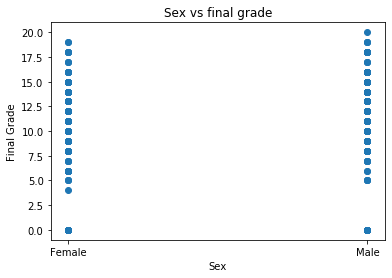

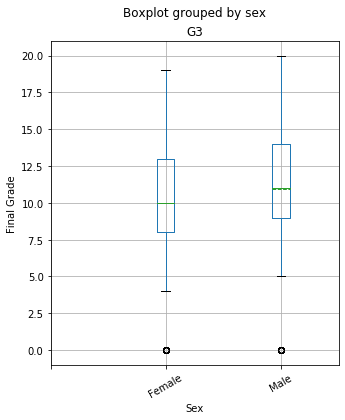

In [217]:
# Mathematics Dataset

# scatter plot of sex vs final grade
plt.scatter(student_mat_df.sex, student_mat_df.G3)
plt.title("Sex vs final grade")
plt.xlabel("Sex")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ('Female', 'Male'))
plt.show()

# scatter plot of sex vs final grade
student_mat_df.boxplot('G3','sex',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'Female', 'Male'))
plt.xlabel("Sex")
plt.ylabel('Final Grade')
plt.show()

Male stuents have higher scores. They have a higher maximum, average, and minimum compared to their female counterparts.

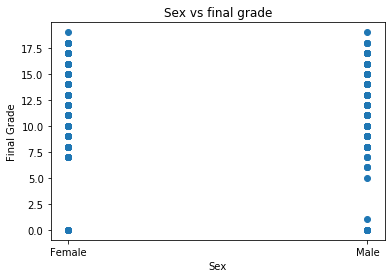

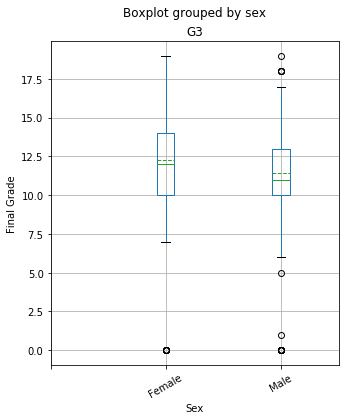

In [218]:
# Portugese Dataset

# scatter plot of sex vs final grade
plt.scatter(student_por_df.sex, student_por_df.G3)
plt.title("Sex vs final grade")
plt.xlabel("Sex")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ('Female', 'Male'))
plt.show()

# scatter plot of sex vs final grade
student_por_df.boxplot('G3','sex',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'Female', 'Male'))
plt.xlabel("Sex")
plt.ylabel('Final Grade')
plt.show()

For Portugese, unlike Mathematics, female students perform better than male students.

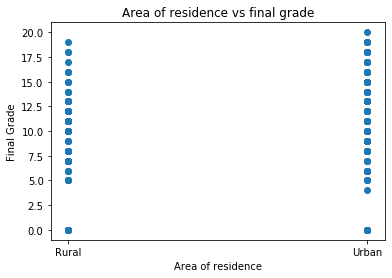

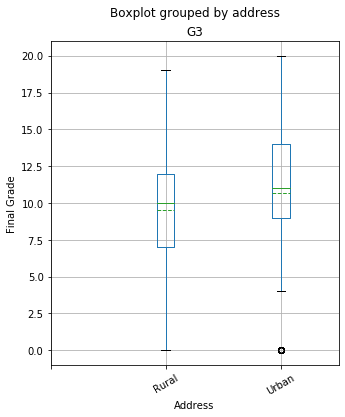

In [219]:
# Mathematics Dataset

# scatter plot of address vs final grade
plt.scatter(student_mat_df.address, student_mat_df.G3)
plt.title("Area of residence vs final grade")
plt.xlabel("Area of residence")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'Rural', 'Urban'))
plt.show()

# box plot of address vs final grade
student_mat_df.boxplot('G3','address',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'Rural', 'Urban'))
plt.xlabel("Address")
plt.ylabel('Final Grade')
plt.show()

Students living in urban areas have higher scores even with outliers on the lower end.
They have a higher maximum, average, and minimum compared to those in rural areas.

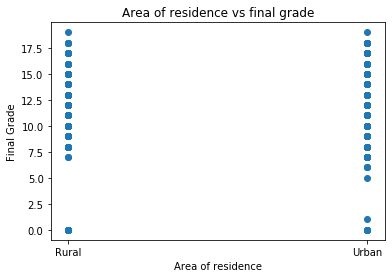

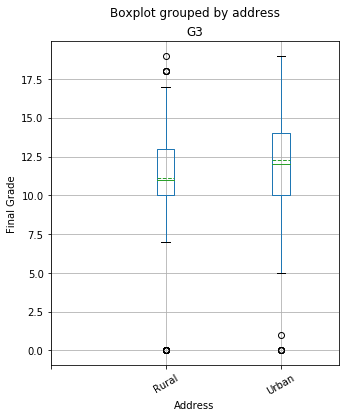

In [220]:
# Portugese Dataset

# scatter plot of address vs final grade
plt.scatter(student_por_df.address, student_por_df.G3)
plt.title("Area of residence vs final grade")
plt.xlabel("Area of residence")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'Rural', 'Urban'))
plt.show()

# box plot of address vs final grade
student_por_df.boxplot('G3','address',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'Rural', 'Urban'))
plt.xlabel("Address")
plt.ylabel('Final Grade')
plt.show()

Students living in urban areas have higher scores even with outliers on the lower end.
They have a higher maximum, average, and minimum compared to those in rural areas.

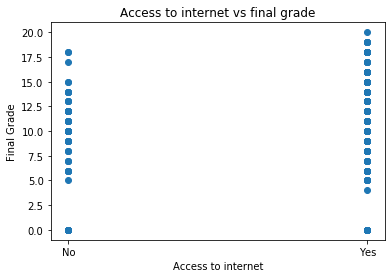

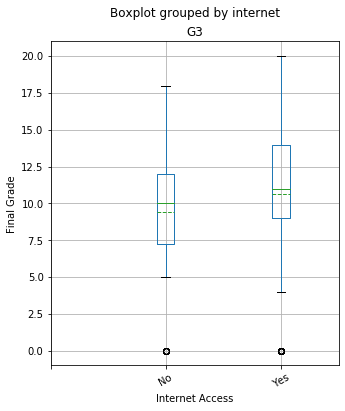

In [221]:
# Mathematics Dataset

# scatter plot of internet access vs final grade
plt.scatter(student_mat_df.internet, student_mat_df.G3)
plt.title("Access to internet vs final grade")
plt.xlabel("Access to internet")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'No', 'Yes'))
plt.show()

# box plot of internet access vs final grade
student_mat_df.boxplot('G3','internet',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'No', 'Yes'))
plt.xlabel("Internet Access")
plt.ylabel('Final Grade')
plt.show()

The average score increases with acces to internet
but the scores also spread further from the mean 
hence a higher maximum and lower minimum score.

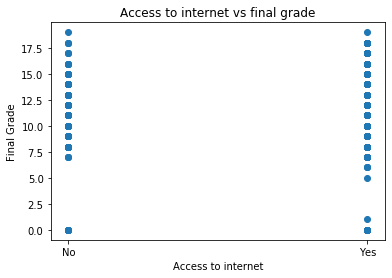

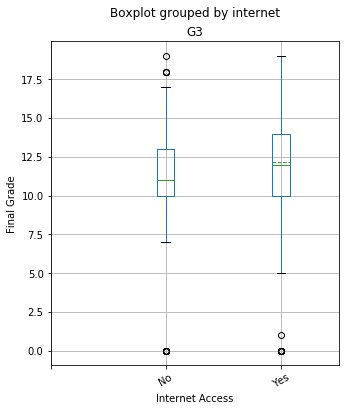

In [222]:
# Portugese Dataset

# scatter plot of internet access vs final grade
plt.scatter(student_por_df.internet, student_por_df.G3)
plt.title("Access to internet vs final grade")
plt.xlabel("Access to internet")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'No', 'Yes'))
plt.show()

# box plot of internet access vs final grade
student_por_df.boxplot('G3','internet',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'No', 'Yes'))
plt.xlabel("Internet Access")
plt.ylabel('Final Grade')
plt.show()

The average score increases with acces to internet
but the scores also spread further from the mean 
hence a higher maximum and lower minimum score.

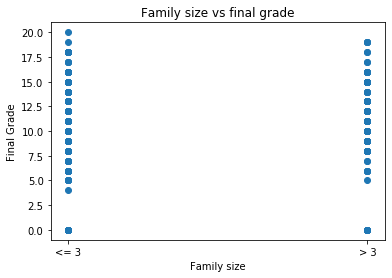

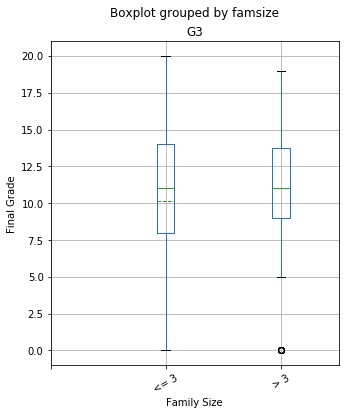

In [223]:
# Mathematics Dataset

# scatter plot of family size vs final grade
plt.scatter(student_mat_df.famsize, student_mat_df.G3)
plt.title("Family size vs final grade")
plt.xlabel("Family size")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( '<= 3', '> 3'))
plt.show()


# box plot of family size vs final grade
student_mat_df.boxplot('G3','famsize',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', '<= 3', '> 3'))
plt.xlabel("Family Size")
plt.ylabel('Final Grade')
plt.show()

The average is maintained regardless of the family size.
The scores get less widespread with a larger family size
hence a lower maximum and higher minimum score.
This could be due to the higher number of students in smaller family size.

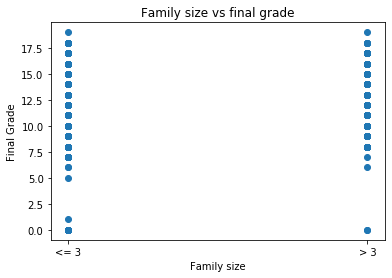

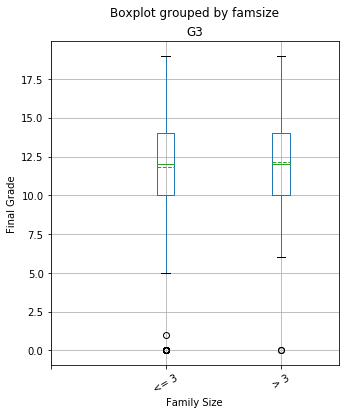

In [224]:
# Portugese Dataset

# scatter plot of family size vs final grade
plt.scatter(student_por_df.famsize, student_por_df.G3)
plt.title("Family size vs final grade")
plt.xlabel("Family size")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( '<= 3', '> 3'))
plt.show()


# box plot of family size vs final grade
student_por_df.boxplot('G3','famsize',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', '<= 3', '> 3'))
plt.xlabel("Family Size")
plt.ylabel('Final Grade')
plt.show()

The average is maintained regardless of the family size.
The scores get less widespread with a smaller family size
hence a lower maximum and higher minimum score.


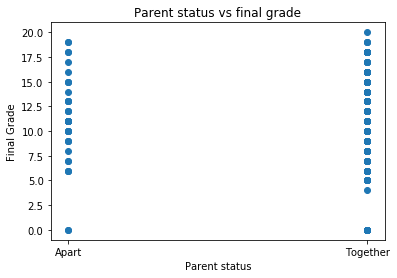

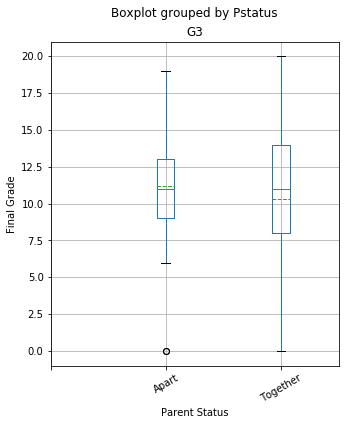

In [225]:
# Mathematics Dataset

# scatter plot of parent status vs final grade
plt.scatter(student_mat_df.Pstatus, student_mat_df.G3)
plt.title("Parent status vs final grade")
plt.xlabel("Parent status")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'Apart', 'Together'))
plt.show()


# box plot of parent status vs final grade
student_mat_df.boxplot('G3','Pstatus',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'Apart', 'Together'))
plt.xlabel("Parent Status")
plt.ylabel('Final Grade')
plt.show()

The average is lower for students whose parents are together.
The scores get more widespread with students whose parent live together
hence a higher maximum and lower minimum score. This is also as interesting as the fact that students with 'very bad' family relations also had the highest average.

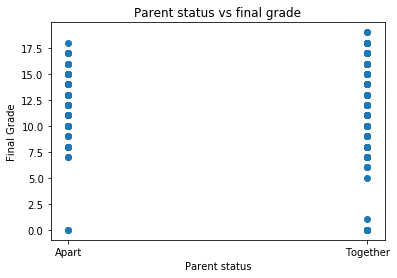

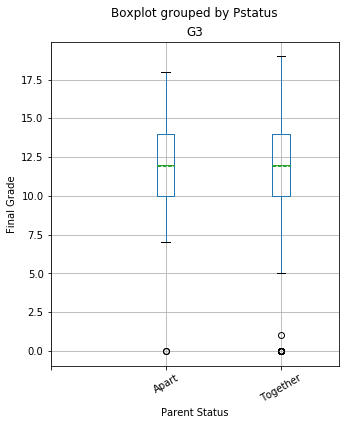

In [226]:
# Portugese Dataset

# scatter plot of parent status vs final grade
plt.scatter(student_por_df.Pstatus, student_por_df.G3)
plt.title("Parent status vs final grade")
plt.xlabel("Parent status")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'Apart', 'Together'))
plt.show()


# box plot of parent status vs final grade
student_por_df.boxplot('G3','Pstatus',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'Apart', 'Together'))
plt.xlabel("Parent Status")
plt.ylabel('Final Grade')
plt.show()

The average is mainatined regardless of the parent status.
The scores get more widespread with students whose parent live together
hence a higher maximum and lower minimum score. 

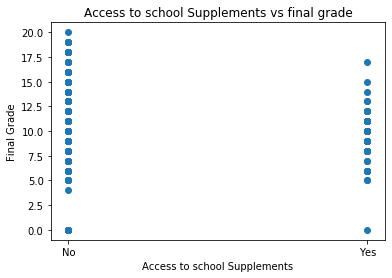

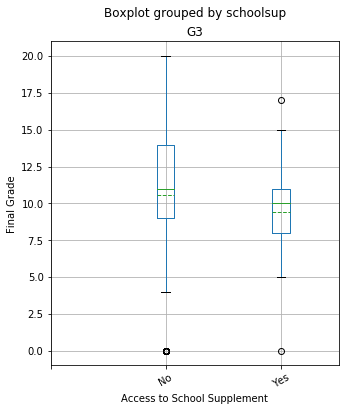

In [227]:
# Mathematics Dataset

# scatter plot of Access to School Supplements vs final grade
plt.scatter(student_mat_df.schoolsup, student_mat_df.G3)
plt.title("Access to school Supplements vs final grade")
plt.xlabel("Access to school Supplements")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'No', 'Yes'))
plt.show()

# box plot of Access to School Supplements vs final grade
student_mat_df.boxplot('G3','schoolsup',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'No', 'Yes'))
plt.xlabel("Access to School Supplement")
plt.ylabel('Final Grade')
plt.show()

Fewer students receive supplements to school needs. 
They have a lower average, and less widespread scores.

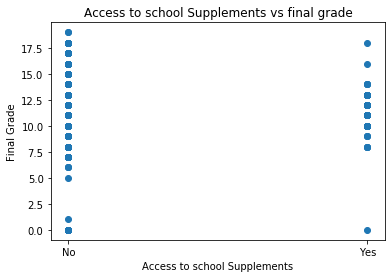

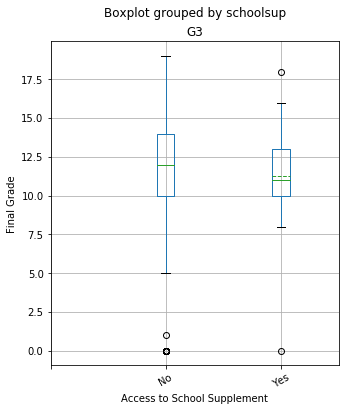

In [228]:
# Portugese Dataset

# scatter plot of Access to School Supplements vs final grade
plt.scatter(student_por_df.schoolsup, student_por_df.G3)
plt.title("Access to school Supplements vs final grade")
plt.xlabel("Access to school Supplements")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'No', 'Yes'))
plt.show()

# box plot of Access to School Supplements vs final grade
student_por_df.boxplot('G3','schoolsup',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'No', 'Yes'))
plt.xlabel("Access to School Supplement")
plt.ylabel('Final Grade')
plt.show()

Fewer students receive supplements to school needs. 
They have a lower average, and less widespread scores.

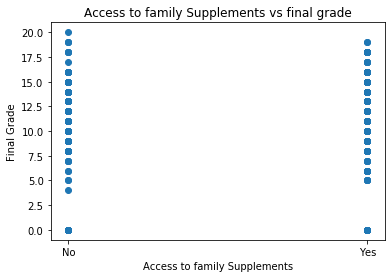

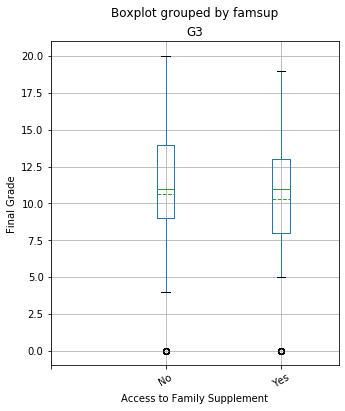

In [229]:
# Mathematics Dataset

# scatter plot of Access to family Supplements vs final grade
plt.scatter(student_mat_df.famsup, student_mat_df.G3)
plt.title("Access to family Supplements vs final grade")
plt.xlabel("Access to family Supplements")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'No', 'Yes'))
plt.show()

# box plot of Access to family Supplements vs final grade
student_mat_df.boxplot('G3','famsup',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'No', 'Yes'))
plt.xlabel("Access to Family Supplement")
plt.ylabel('Final Grade')
plt.show()

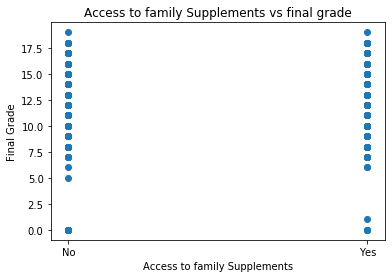

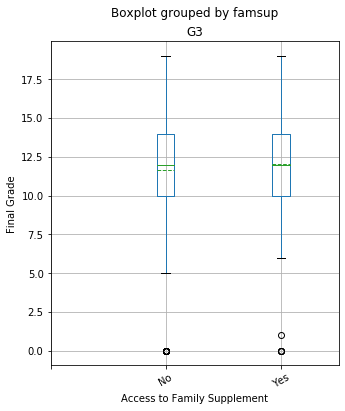

In [230]:
# Portugese Dataset

# scatter plot of Access to family Supplements vs final grade
plt.scatter(student_por_df.famsup, student_por_df.G3)
plt.title("Access to family Supplements vs final grade")
plt.xlabel("Access to family Supplements")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'No', 'Yes'))
plt.show()

# box plot of Access to family Supplements vs final grade
student_por_df.boxplot('G3','famsup',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'No', 'Yes'))
plt.xlabel("Access to Family Supplement")
plt.ylabel('Final Grade')
plt.show()

Students whose families receive any sort of supplements have less widespread scores
and the average is lower just like with the case of school supplements.

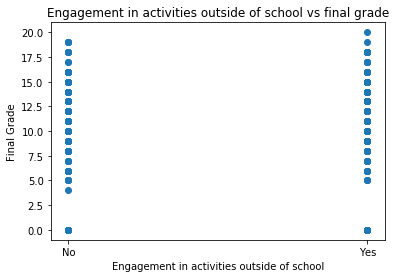

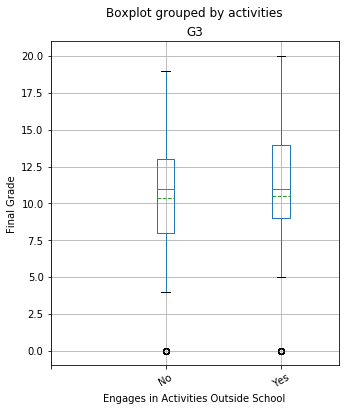

In [231]:
# Mathematics Dataset

# scatter plot of engagement in activities outside school vs final grade
plt.scatter(student_mat_df.activities, student_mat_df.G3)
plt.title("Engagement in activities outside of school vs final grade")
plt.xlabel("Engagement in activities outside of school")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'No', 'Yes'))
plt.show()

# box plot of engagement in activities outside school vs final grade
student_mat_df.boxplot('G3','activities',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'No', 'Yes'))
plt.xlabel("Engages in Activities Outside School")
plt.ylabel('Final Grade')
plt.show()

The average is about the same for students who engage in activities outside of school and those who don't.
However, those who do have a higher maximum and minimum showing that engaing in acticities outside of school positively impacts grades.

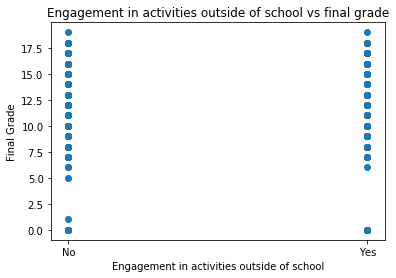

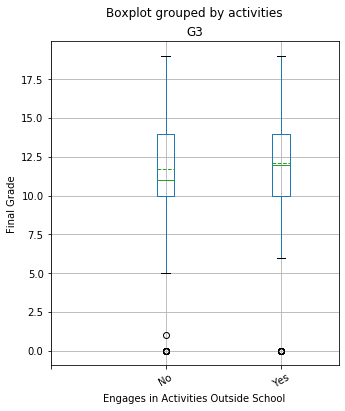

In [232]:
# Portugese Dataset

# scatter plot of engagement in activities outside school vs final grade
plt.scatter(student_por_df.activities, student_por_df.G3)
plt.title("Engagement in activities outside of school vs final grade")
plt.xlabel("Engagement in activities outside of school")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'No', 'Yes'))
plt.show()

# box plot of engagement in activities outside school vs final grade
student_por_df.boxplot('G3','activities',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'No', 'Yes'))
plt.xlabel("Engages in Activities Outside School")
plt.ylabel('Final Grade')
plt.show()

The average is pretty close for both categories.
However, those who do have a higher maximum and minimum.

Text(0, 0.5, 'Final Grade')

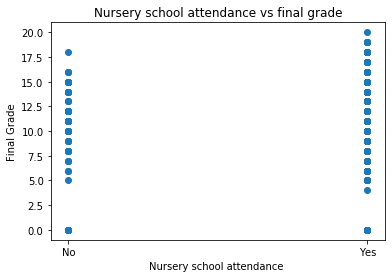

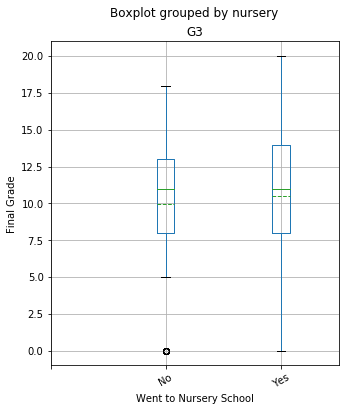

In [233]:
# Mathematics Dataset

# scatter plot of attendance of nursery school vs final grade
plt.scatter(student_mat_df.nursery, student_mat_df.G3)
plt.title("Nursery school attendance vs final grade")
plt.xlabel("Nursery school attendance ")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'No', 'Yes'))


# box plot of attendance of nursery school vs final grade
student_mat_df.boxplot('G3','nursery',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'No', 'Yes'))
plt.xlabel("Went to Nursery School")
plt.ylabel('Final Grade')


The average scores for students who did not attended nursery are lower indicating that nursery school maybe a fundamental part of education.
For those who did, the scores are more widespread from the mean.

Text(0, 0.5, 'Final Grade')

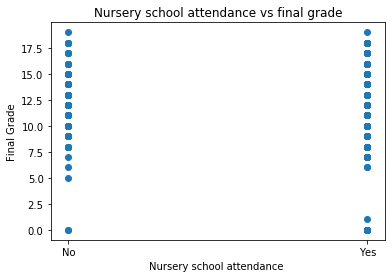

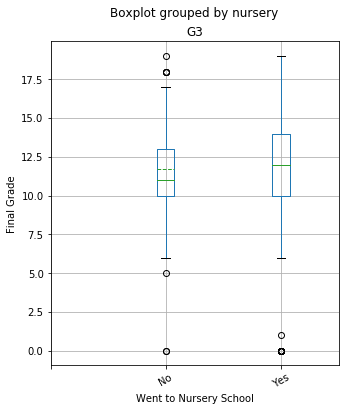

In [234]:
# Portugese Dataset

# scatter plot of attendance of nursery school vs final grade
plt.scatter(student_por_df.nursery, student_por_df.G3)
plt.title("Nursery school attendance vs final grade")
plt.xlabel("Nursery school attendance ")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'No', 'Yes'))


# box plot of attendance of nursery school vs final grade
student_por_df.boxplot('G3','nursery',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'No', 'Yes'))
plt.xlabel("Went to Nursery School")
plt.ylabel('Final Grade')


The average scores for students who did not attended nursery are lower indicating that nursery school maybe a fundamental part of education.
For those who did, the scores are more widespread from the mean.

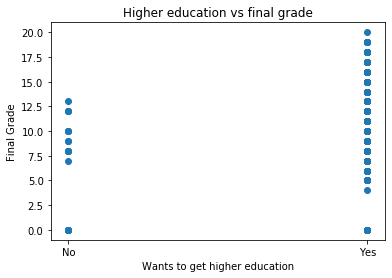

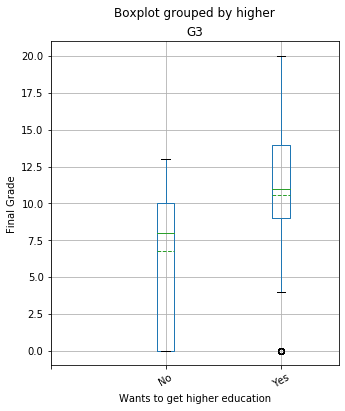

In [235]:
#  Mathematics Dataset

# scatter plot of desire to get higher education vs final grade
plt.scatter(student_mat_df.higher, student_mat_df.G3)
plt.title("Higher education vs final grade")
plt.xlabel("Wants to get higher education")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'No', 'Yes'))

# box plot of desire to get higher education vs final grade
student_mat_df.boxplot('G3','higher',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'No', 'Yes'))
plt.xlabel("Wants to get higher education")
plt.ylabel('Final Grade')
plt.show()

Students who do not aspire to get higher education get a significantly lower scores
across all metrics such as the mean, maximum, and minimum.

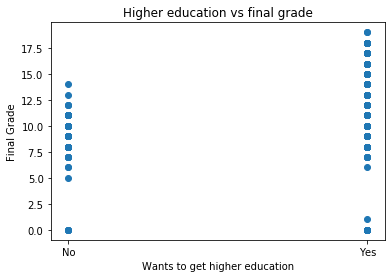

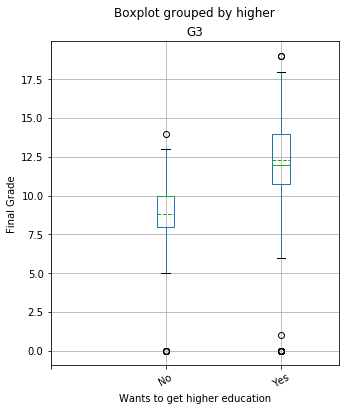

In [236]:
#  Portugese Dataset

# scatter plot of desire to get higher education vs final grade
plt.scatter(student_por_df.higher, student_por_df.G3)
plt.title("Higher education vs final grade")
plt.xlabel("Wants to get higher education")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'No', 'Yes'))

# box plot of desire to get higher education vs final grade
student_por_df.boxplot('G3','higher',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'No', 'Yes'))
plt.xlabel("Wants to get higher education")
plt.ylabel('Final Grade')
plt.show()

Students who do not aspire to get higher education get a significantly lower scores
across all metrics such as the mean, maximum, and minimum.

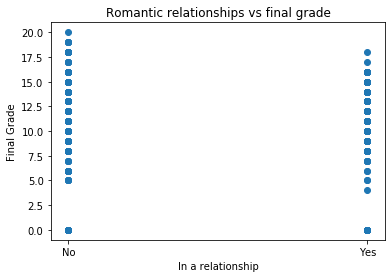

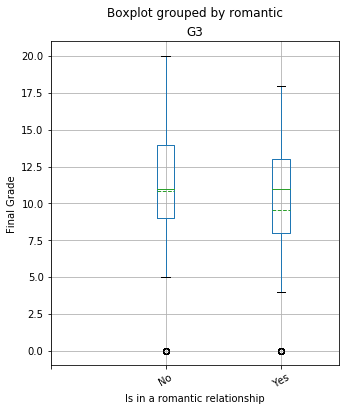

In [237]:
# Mathematics Dataset

# scatter plot of romatic relationships vs final grade
plt.scatter(student_mat_df.romantic, student_mat_df.G3)
plt.title("Romantic relationships vs final grade")
plt.xlabel("In a relationship")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'No', 'Yes'))

# box plot of romatic relationships vs final grade
student_mat_df.boxplot('G3','romantic',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'No', 'Yes'))
plt.xlabel("Is in a romantic relationship")
plt.ylabel('Final Grade')
plt.show()

Students in romantic relationships get lower scores on all metrics; maximum, minimum, average.

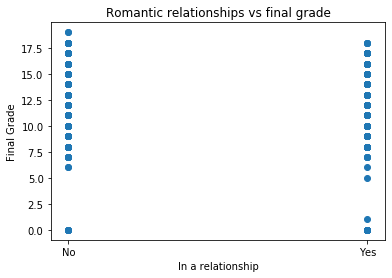

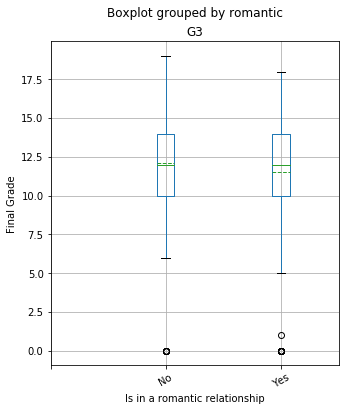

In [238]:
# Portugese Dataset

# scatter plot of romatic relationships vs final grade
plt.scatter(student_por_df.romantic, student_por_df.G3)
plt.title("Romantic relationships vs final grade")
plt.xlabel("In a relationship")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'No', 'Yes'))

# box plot of romatic relationships vs final grade
student_por_df.boxplot('G3','romantic',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'No', 'Yes'))
plt.xlabel("Is in a romantic relationship")
plt.ylabel('Final Grade')
plt.show()

Students in romantic relationships get lower scores on all metrics; maximum, minimum, average.

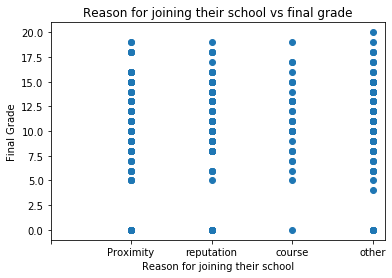

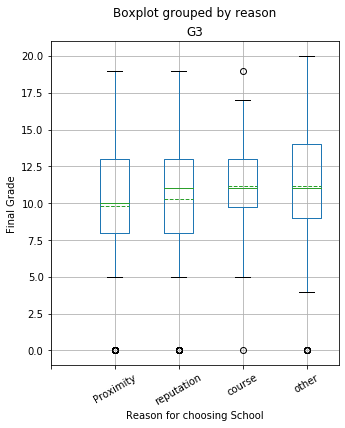

In [239]:
# Mathematics Dataset

# box plot of reason to join their school vs final grade
plt.scatter(student_mat_df.reason, student_mat_df.G3)
plt.title("Reason for joining their school vs final grade")
plt.xlabel("Reason for joining their school")
plt.ylabel("Final Grade")
plt.xticks(np.arange(5), ('', "Proximity", "reputation", "course", "other"))


# box plot of reason to join their school vs final grade
student_mat_df.boxplot('G3','reason',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(5), ('', "Proximity", "reputation", "course", "other"))
plt.xlabel("Reason for choosing School")
plt.ylabel('Final Grade')
plt.show()

Students who chose their school out of convinience of proximity have a lower average than the others, followed by reputation of the school then the course they wished to pursue.

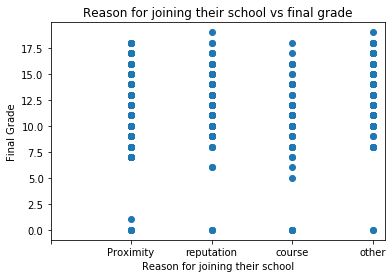

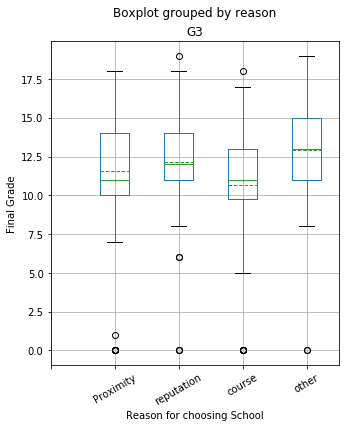

In [240]:
# Portugese Dataset

# scatter plot of reason to join their school vs final grade
plt.scatter(student_por_df.reason, student_por_df.G3)
plt.title("Reason for joining their school vs final grade")
plt.xlabel("Reason for joining their school")
plt.ylabel("Final Grade")
plt.xticks(np.arange(5), ('', "Proximity", "reputation", "course", "other"))


# box plot of reason to join their school vs final grade
student_por_df.boxplot('G3','reason',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(5), ('', "Proximity", "reputation", "course", "other"))
plt.xlabel("Reason for choosing School")
plt.ylabel('Final Grade')
plt.show()

Students who chose their school due to the course they wanted to pursue have a lower average than the others. There is no consistent trend between the two datasets.

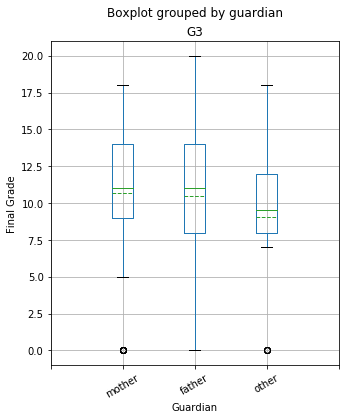

In [241]:
# Mathematics Dataset

# scatter plot of student's guradian vs final grade
student_mat_df.boxplot('G3','guardian',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(5), ('', "mother", "father", "other"))
plt.xlabel("Guardian")
plt.ylabel('Final Grade')
plt.show()

Students raised by their parents have a better average score than those raised by other guardians.

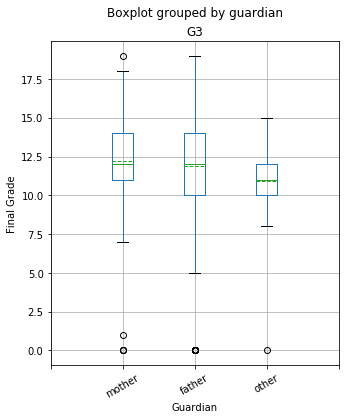

In [242]:
# Portugese Dataset

# box plot of student's guradian vs final grade
student_por_df.boxplot('G3','guardian',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(5), ('', "mother", "father", "other"))
plt.xlabel("Guardian")
plt.ylabel('Final Grade')
plt.show()

Students raised by their parents have a better average score than those raised by other guardians.

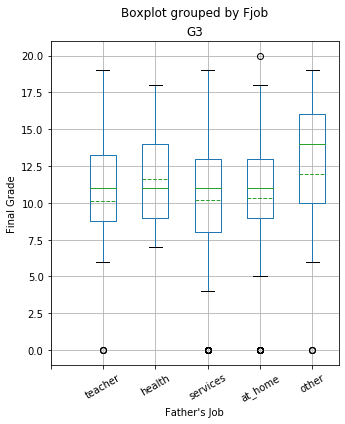

In [243]:
# Mathematics Dataset

# box plot of father's job vs final grade
student_mat_df.boxplot('G3','Fjob',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(6), ('', "teacher", "health", "services", "at_home", "other"))
plt.xlabel("Father's Job")
plt.ylabel('Final Grade')
plt.show()

While considering fathers' jobs, those in teaching professions have students with the lowest average.
Students with Fathers in health professions have the highest average and highest minimum.

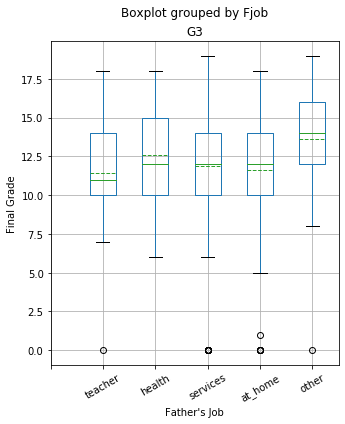

In [244]:
# Portugese Dataset

# box plot of father's job vs final grade
student_por_df.boxplot('G3','Fjob',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(6), ('', "teacher", "health", "services", "at_home", "other"))
plt.xlabel("Father's Job")
plt.ylabel('Final Grade')
plt.show()

While considering fathers' jobs, those in teaching professions have students with the lowest average.
Students with Fathers in health professions have the highest average. The obseravtions are consistent for both datasets.

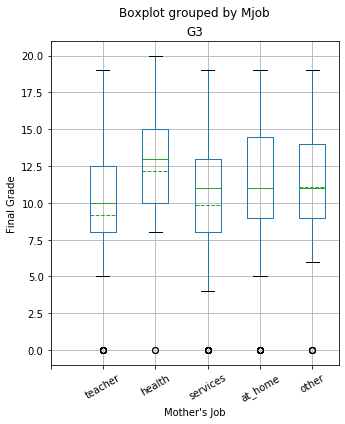

In [245]:
# Mathematics Dataset

# box plot of mother's job vs final grade
student_mat_df.boxplot('G3', 'Mjob',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(6), ('', "teacher", "health", "services", "at_home", "other"))
plt.xlabel("Mother's Job")
plt.ylabel('Final Grade')
plt.show()

Students whose mothers are in health perform the best in terms of the maximum, average and minimum score.
Those whose mothers are teachers have relatively the lowest performance.

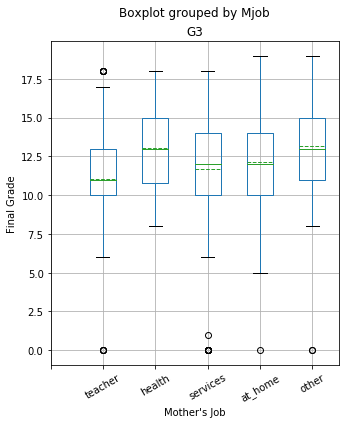

In [246]:
# Portugese Dataset

# box plot of mother's job vs final grade
student_por_df.boxplot('G3', 'Mjob',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(6), ('', "teacher", "health", "services", "at_home", "other"))
plt.xlabel("Mother's Job")
plt.ylabel('Final Grade')
plt.show()

This attribute follows the same trend as the fathers' jobs category, which may be due due to the fact that they're related. Students whose mothers are in health perform the best in terms of the average and minimum score.
Those whose mothers are teachers have relatively the lowest performance.

The trend is consintent for both datasets.

## Normality Tests

###    (a) Histogram Plots
Normal distributions are characterized by being symmetrical and bell shaped. A simple method to test this is by visualizing their distibution using histogram or KDE, which have already been covered.

###    (b) Q-Q plts
This method is not preferred if the sample size is small. Ours is relatively large at 395 observations. If the sample size is sufficiently large most statistical significance tests may detect even trivial departures from the null hypothesis (i.e., although there may be some statistically significant effect, it may be too small to be of any practical significance); thus, additional investigation of the effect size is typically advisable, like a Q–Q plot. So, if we have sufficiently large sample, we can opt this method instead of statistical significance tests
.

References:
https://www.kaggle.com/thevenkateshgandi/normality-tests/notebook

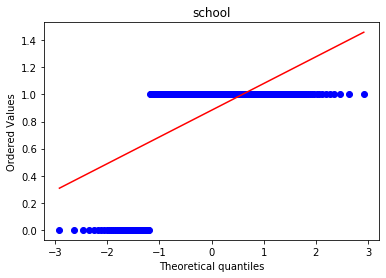

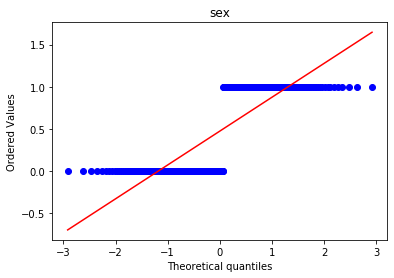

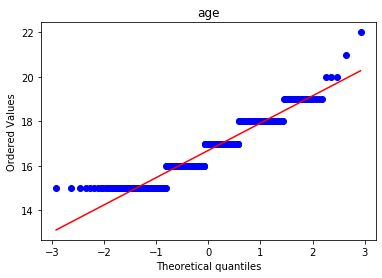

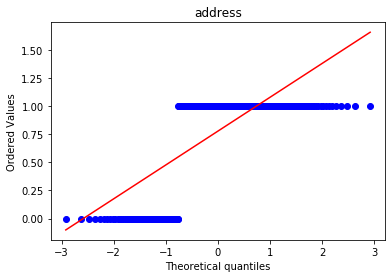

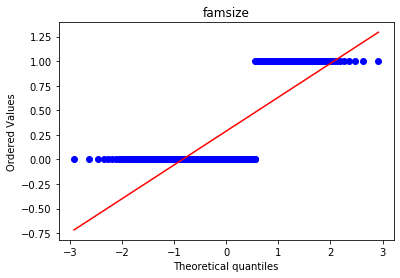

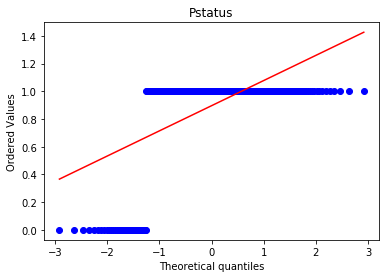

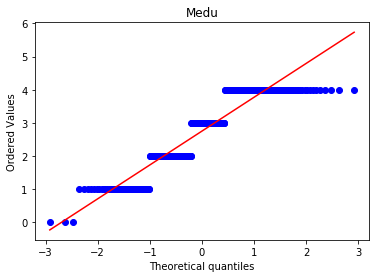

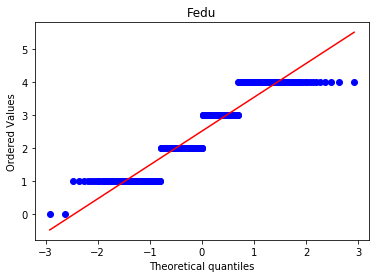

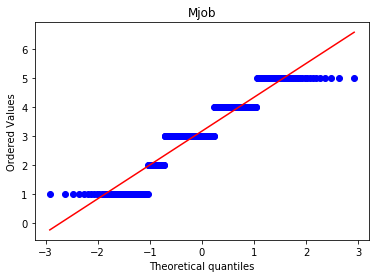

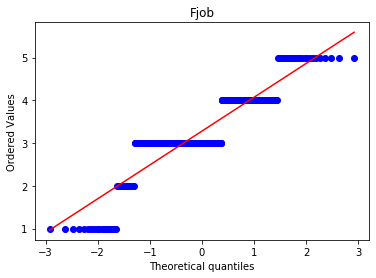

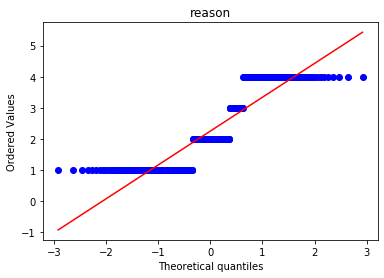

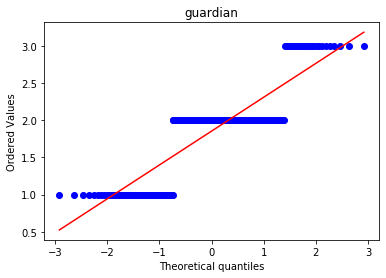

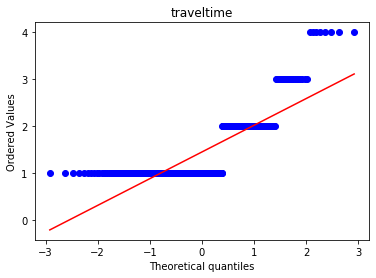

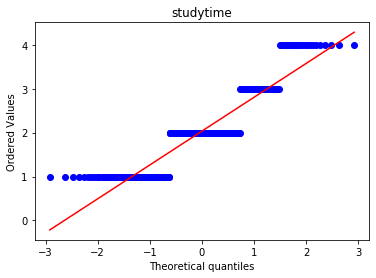

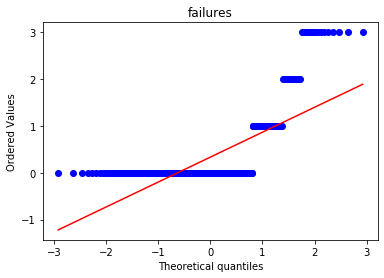

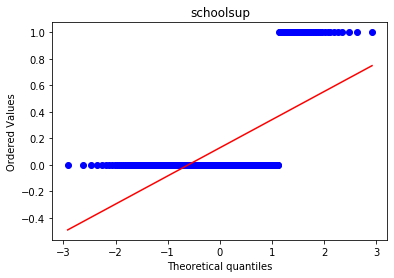

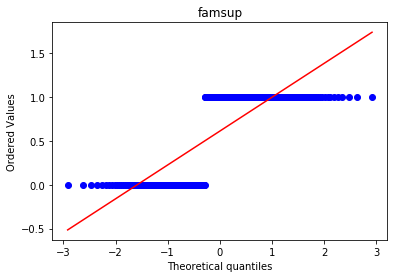

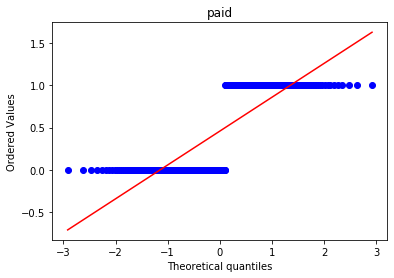

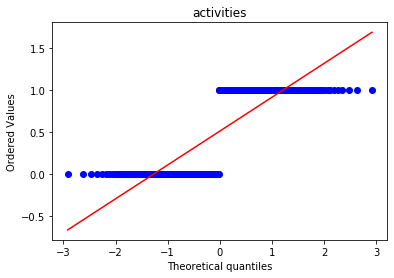

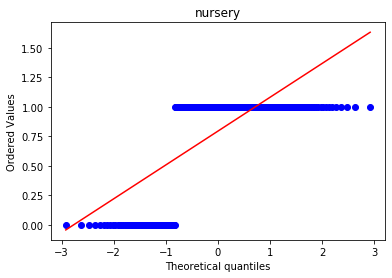

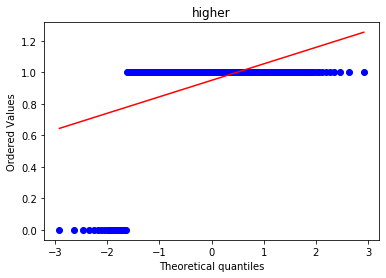

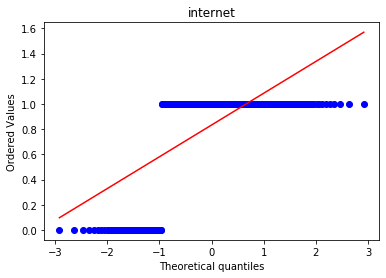

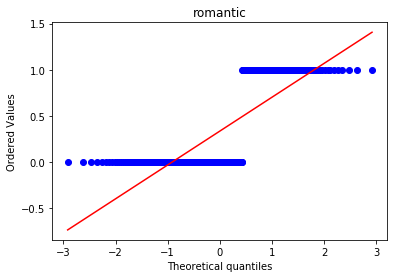

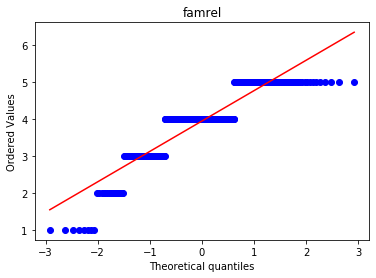

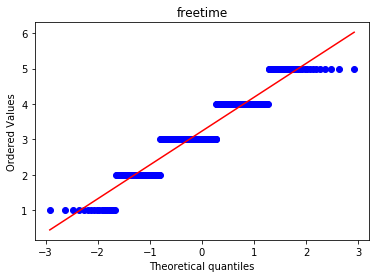

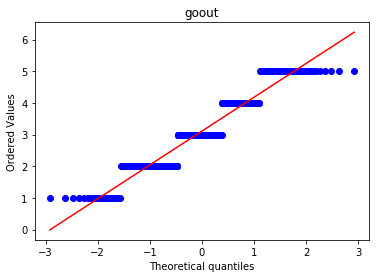

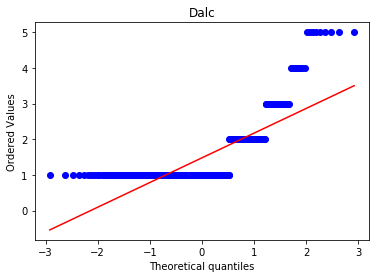

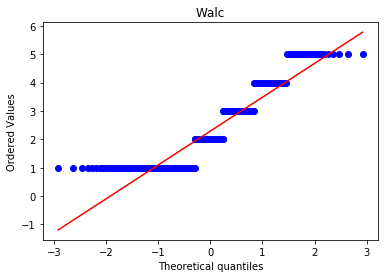

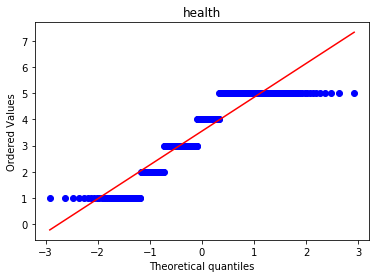

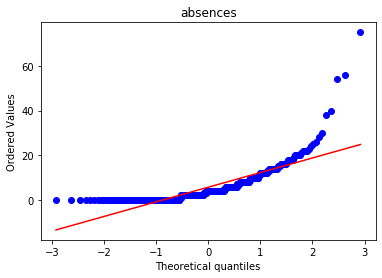

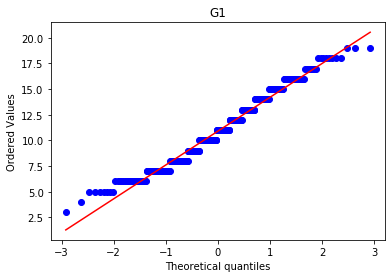

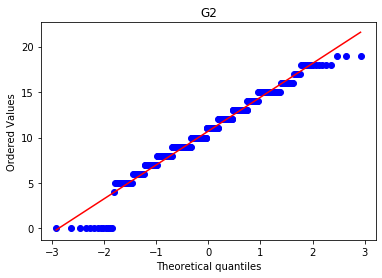

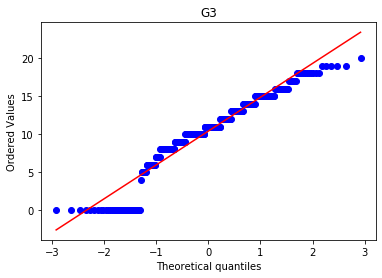

In [247]:
# Mathematics Dataset

# Q-Q plots
import scipy.stats as stats

for value in range(33):
    stats.probplot(student_mat_df.iloc[:, value], dist="norm", plot=plt)
    plt.title(columns[value])
    plt.show()

All variables other than grades, exhibit a significant departure from the null hypothesis showing that they are not normally distributed.

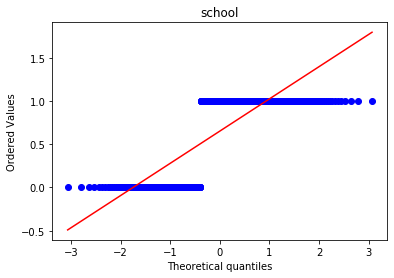

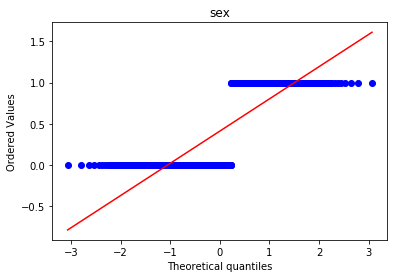

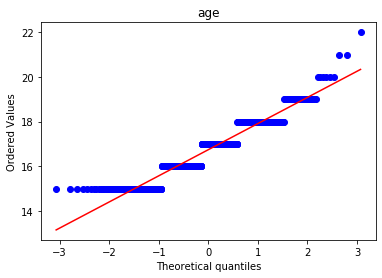

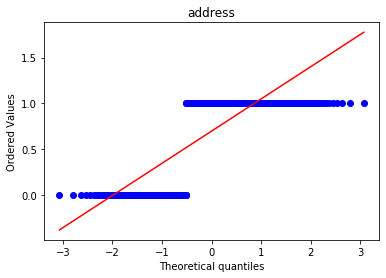

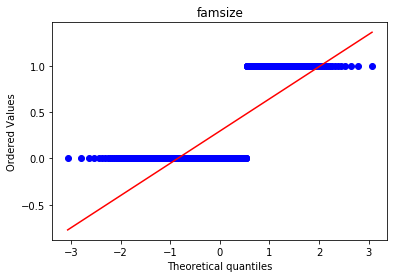

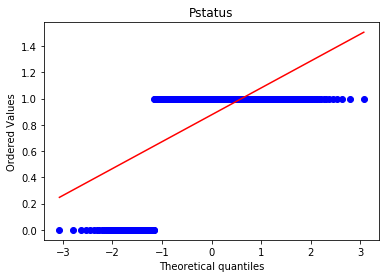

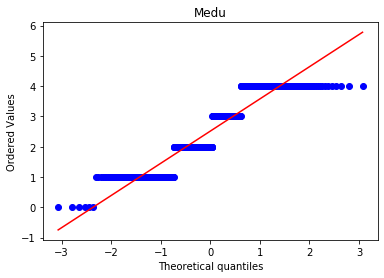

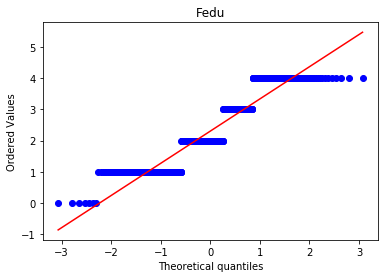

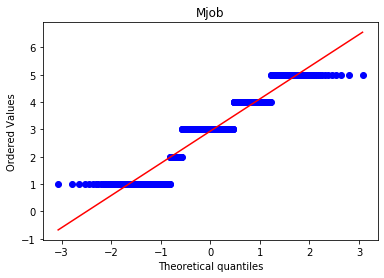

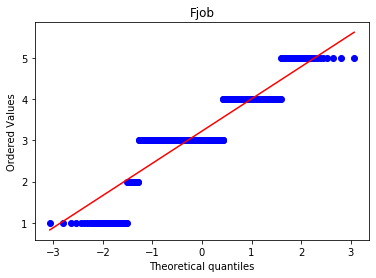

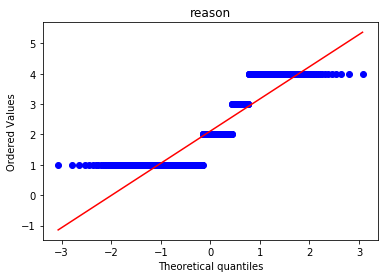

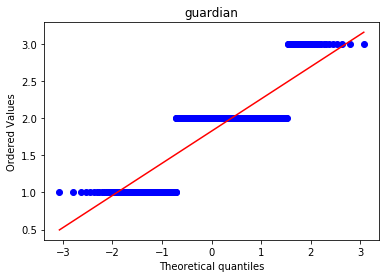

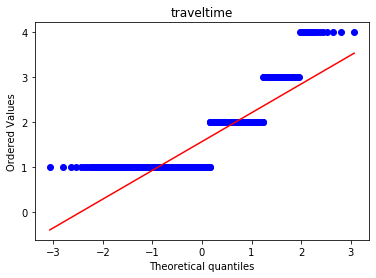

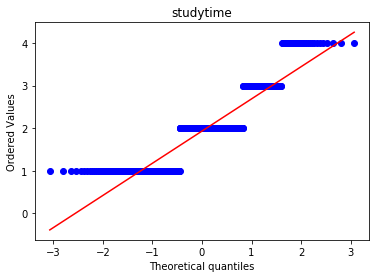

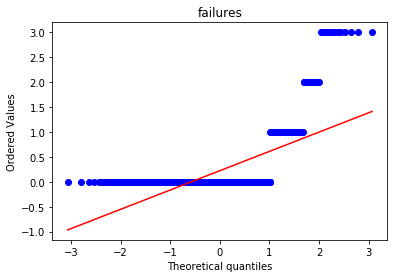

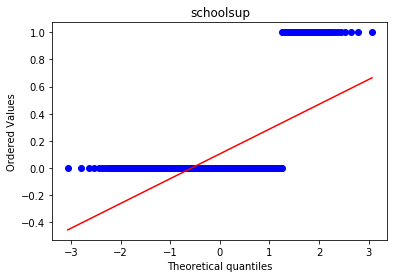

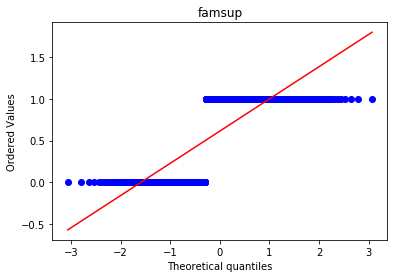

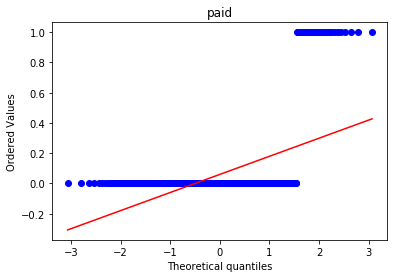

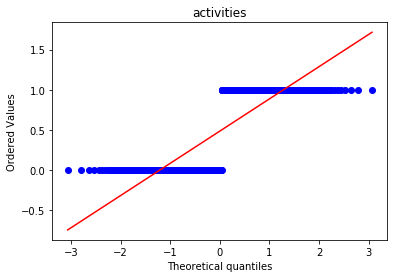

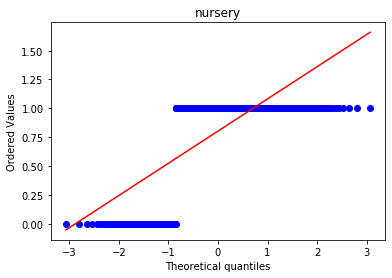

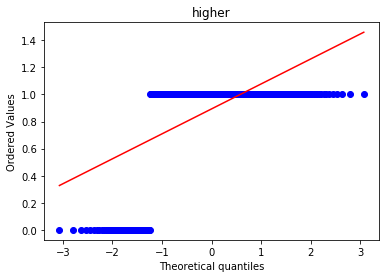

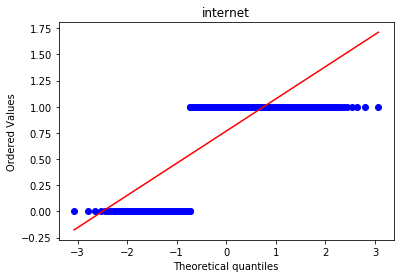

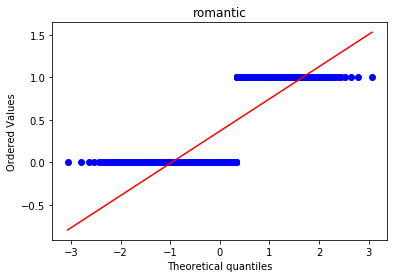

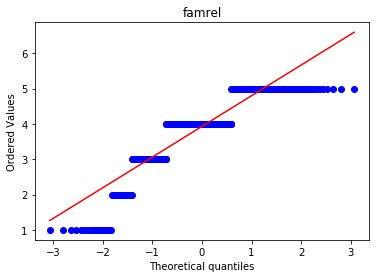

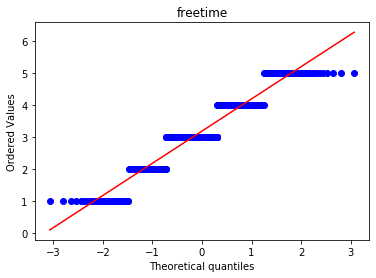

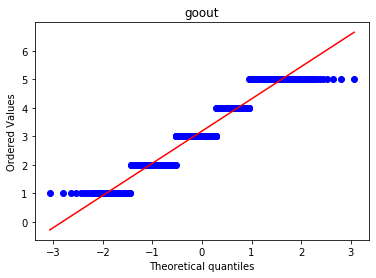

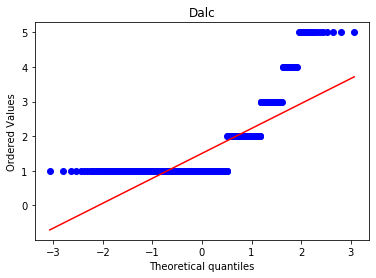

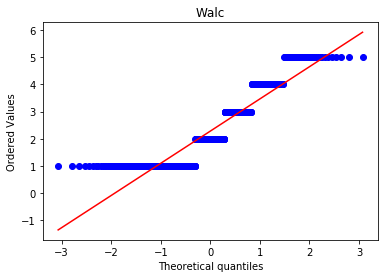

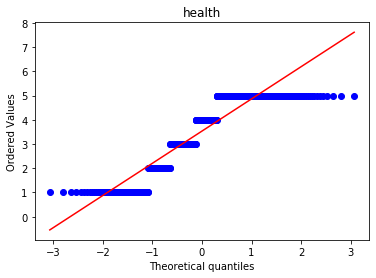

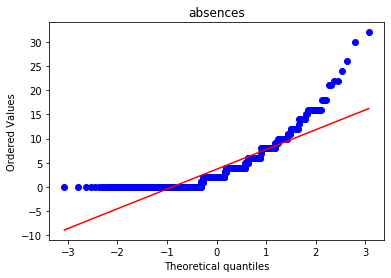

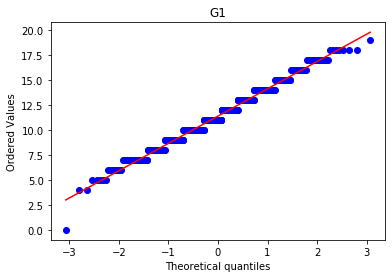

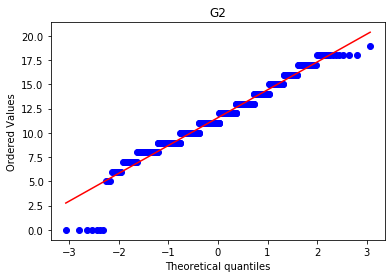

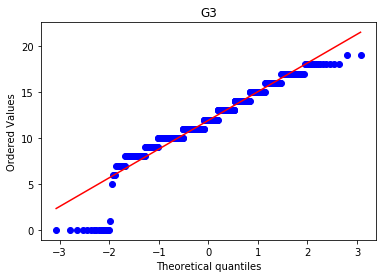

In [248]:
# Portugese Dataset

# Q-Q plots
import scipy.stats as stats

for value in range(33):
    stats.probplot(student_por_df.iloc[:, value], dist="norm", plot=plt)
    plt.title(columns[value])
    plt.show()

All variables other than grades, exhibit a significant departure from the null hypothesis showing that they are not normally distributed.

### (c) Kolmogorov–Smirnov Test

The K-S test is a non-parametric test based on the empirical distribution function (ECDF).The Kolmogorov–Smirnov statistic measures the supremum (greatest) distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution(standard normal distribution in our case for testing normality). If the sample comes from the referenced distribution F(x), then the test statistic converges to 0 almost.

The null distribution of this statistic calculated under the null hypothesis that the sample is drawn from the reference distribution converges to the Kolmogorov distribution.

The goodness-of-fit test or the Kolmogorov–Smirnov test can be constructed by using the critical values of the Kolmogorov distribution. This test is asymptotically valid when n tends to infinity.

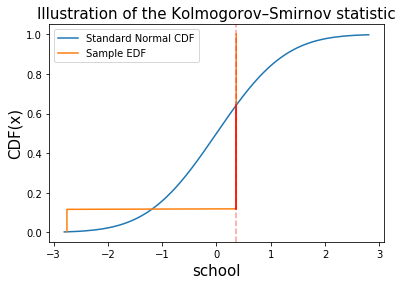

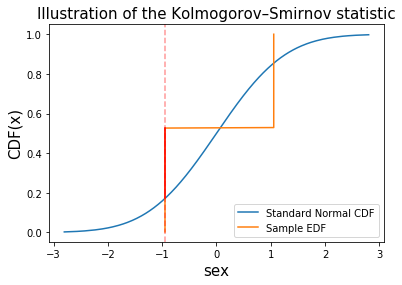

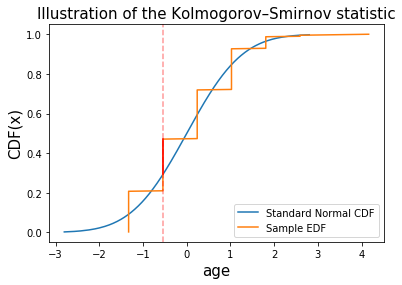

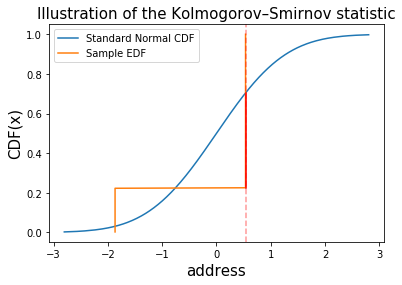

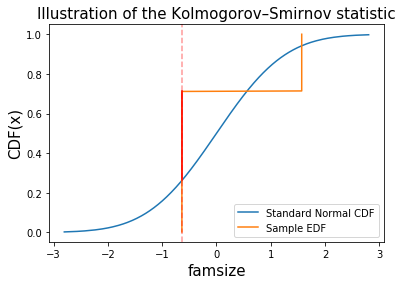

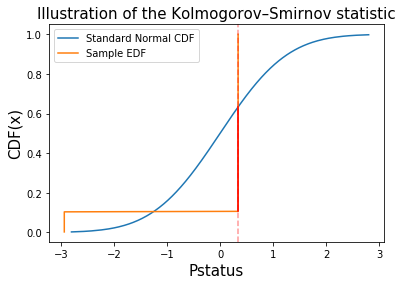

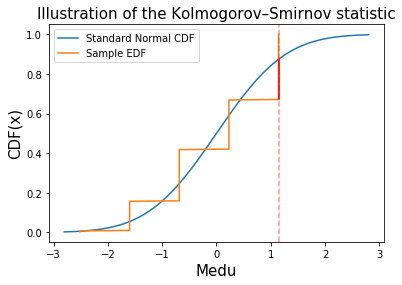

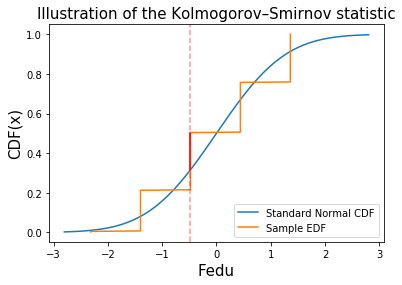

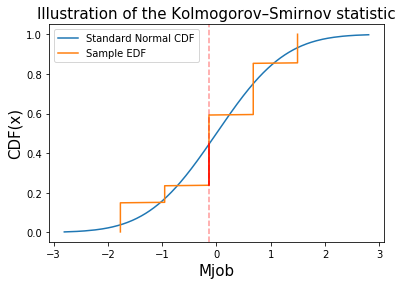

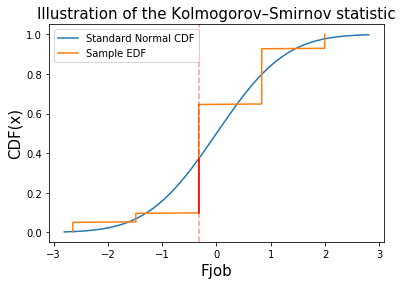

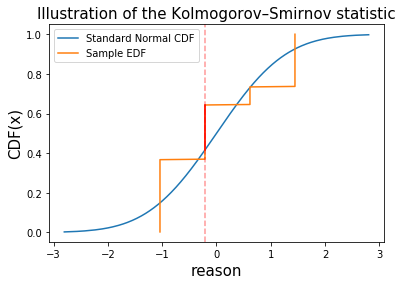

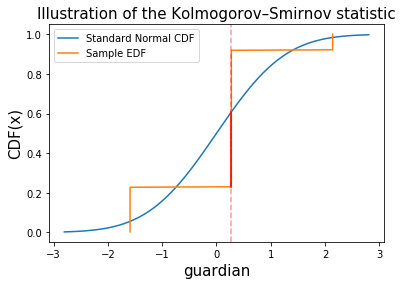

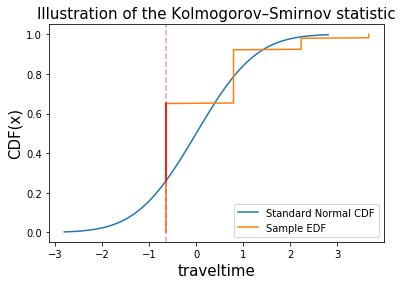

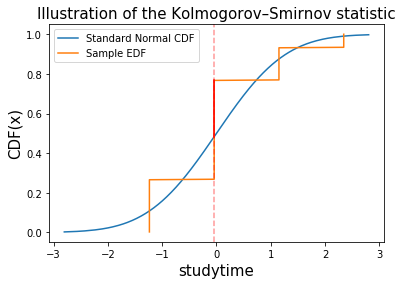

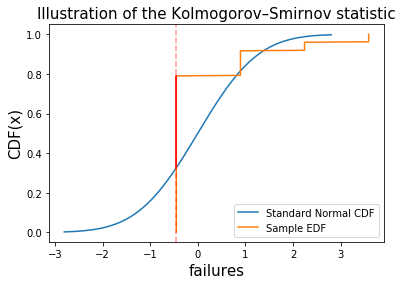

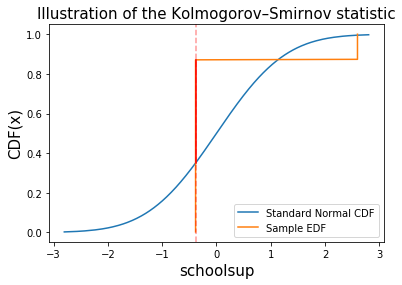

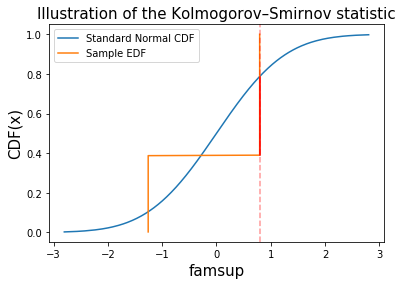

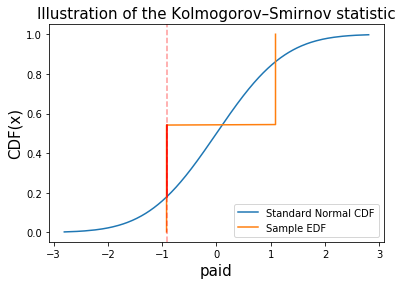

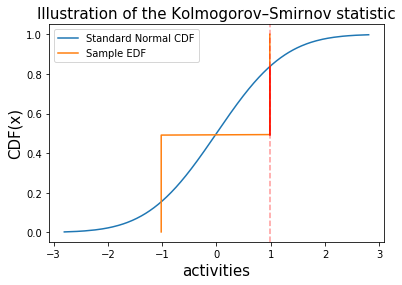

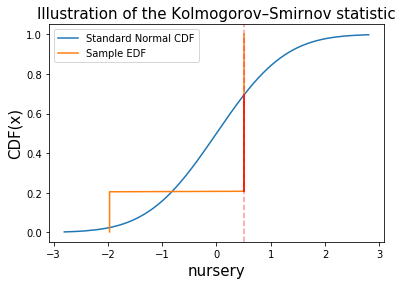

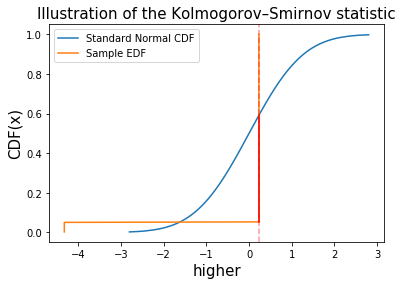

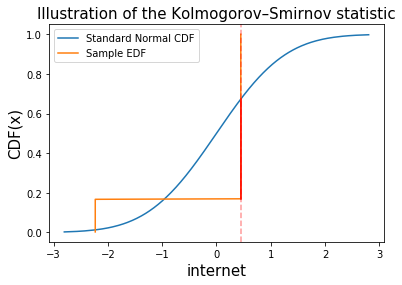

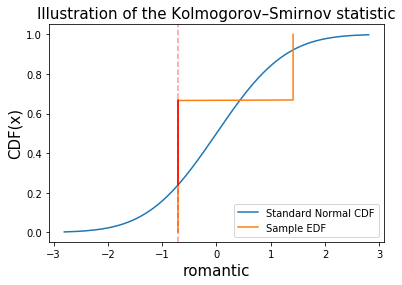

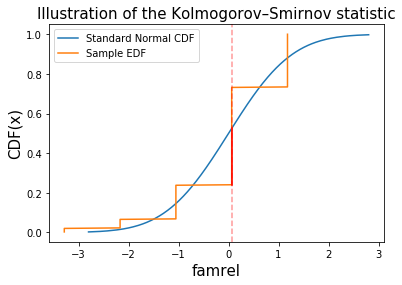

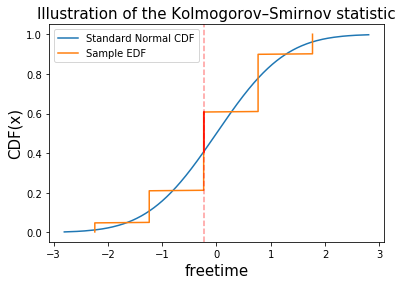

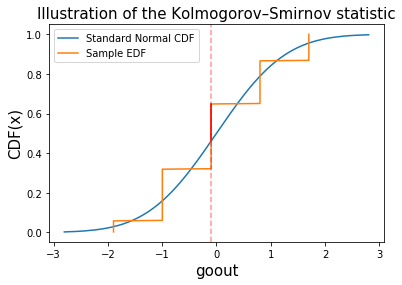

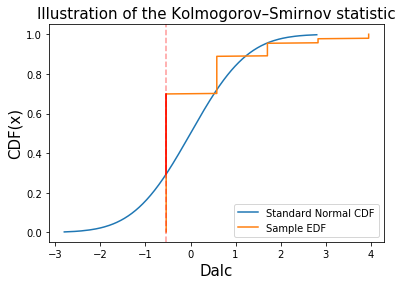

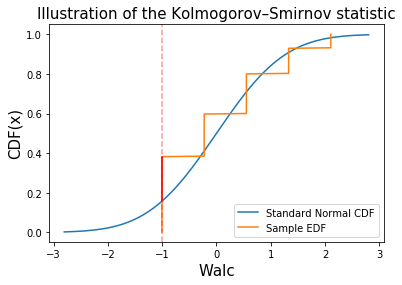

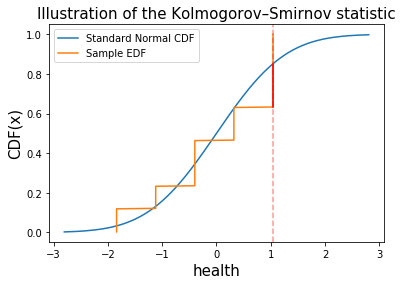

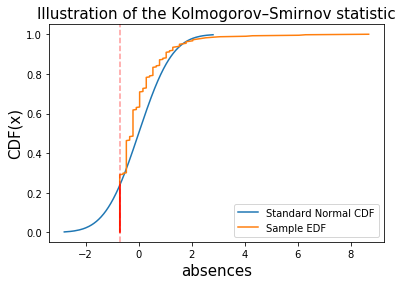

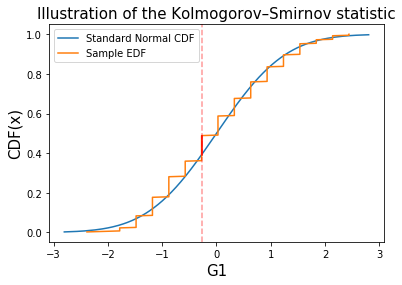

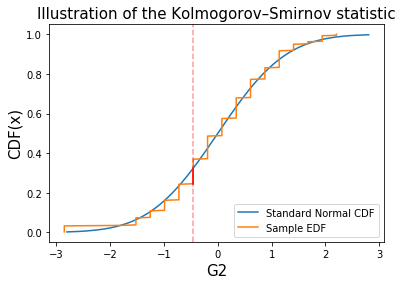

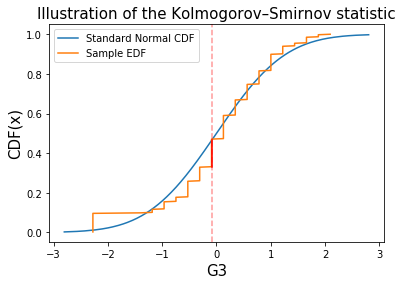

In [249]:
# Mathematics Dataset

# Kolmogorov–Smirnov Test
n=395
for value in range(33):
    standardized_data=(student_mat_df.iloc[:, value]-np.mean
                       (student_mat_df.iloc[:, value]))/np.std(student_mat_df.iloc[:, value])
    
    ks_statistic,ks_p_value=stats.kstest(standardized_data, 'norm') #Compared with standard normal distribution
    ks_statistic,ks_p_value
    probs=np.arange(1, n+1)/n # n - sample size
    stzd_data=np.sort(standardized_data)
    theoretical_values=stats.norm.ppf(probs)
    est_probs=np.interp(stzd_data,theoretical_values,probs)
    max_id=np.argmax((probs-est_probs)**2)
    
    # plot
    plt.plot(theoretical_values,probs,label='Standard Normal CDF')
    plt.plot(stzd_data,probs,label='Sample EDF')
    plt.axvline(stzd_data[max_id], color="red", linestyle="dashed", alpha=0.4)
    plt.plot([stzd_data[max_id], stzd_data[max_id]], [probs[max_id], est_probs[max_id]], color="red")
    plt.xlabel(columns[value],size=15)
    plt.ylabel('CDF(x)',size=15)
    plt.title('Illustration of the Kolmogorov–Smirnov statistic',size=15)
    plt.legend()
    plt.show()

Again, only the grade columns exhibit normal distribution because they almost fit the actual curve.

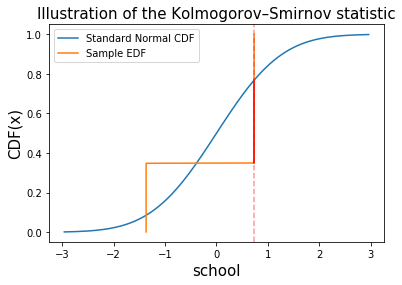

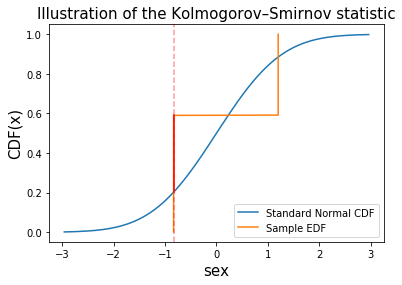

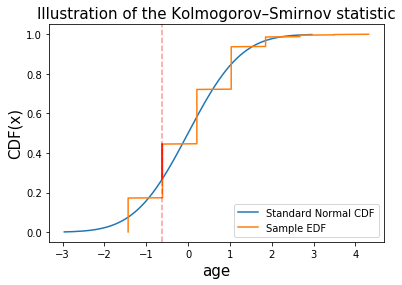

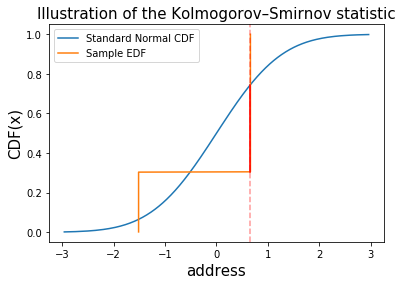

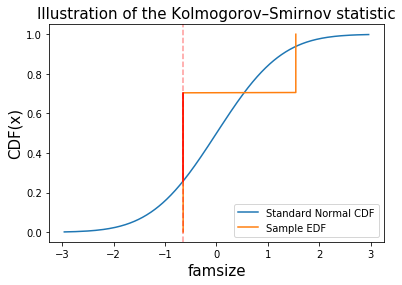

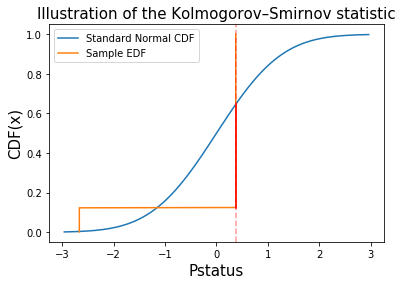

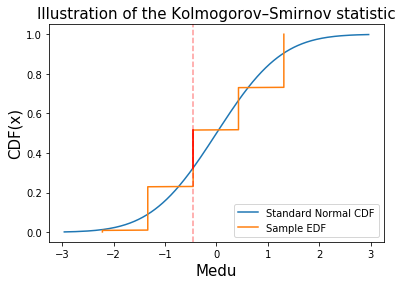

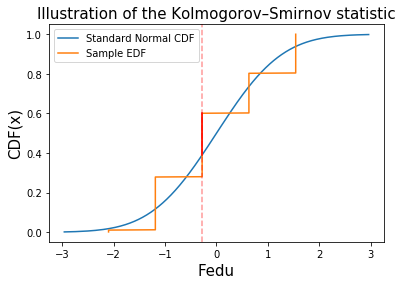

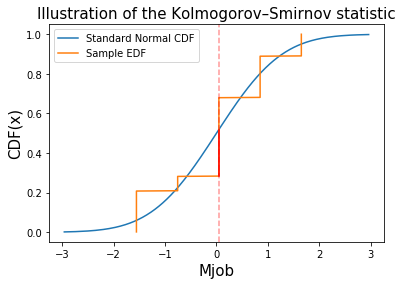

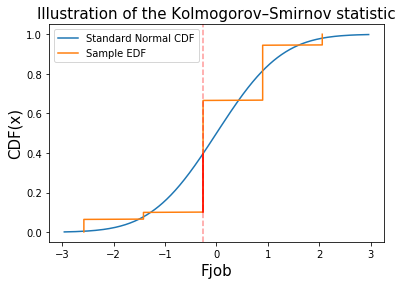

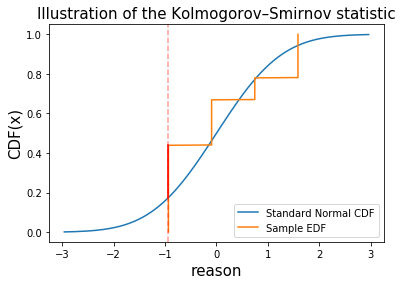

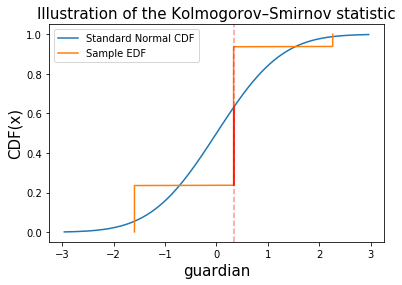

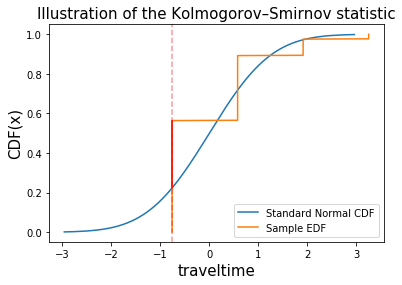

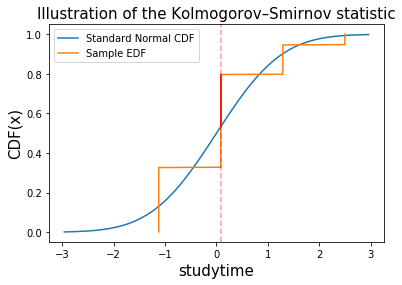

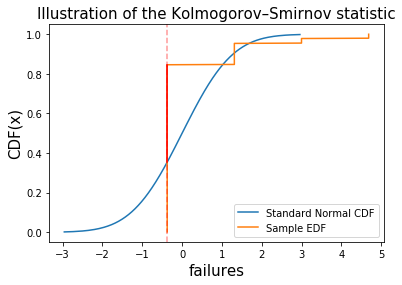

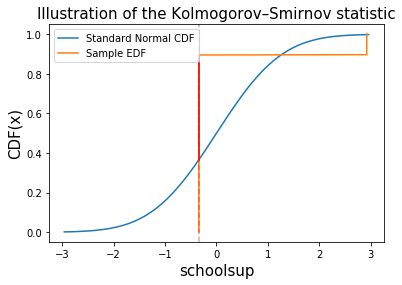

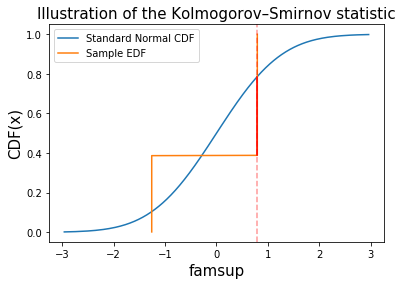

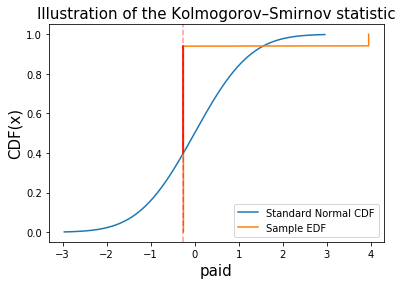

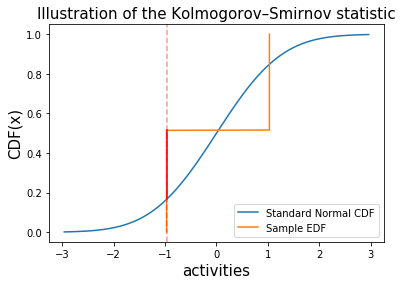

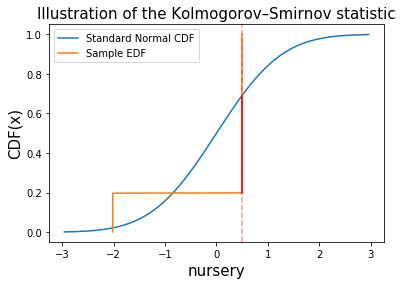

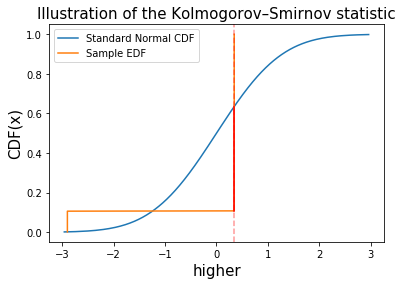

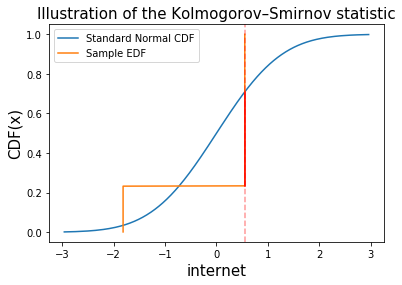

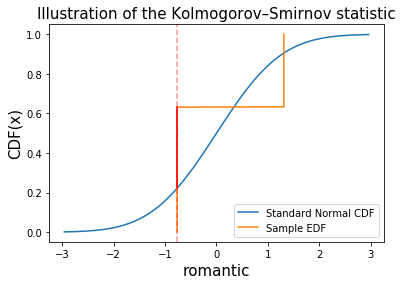

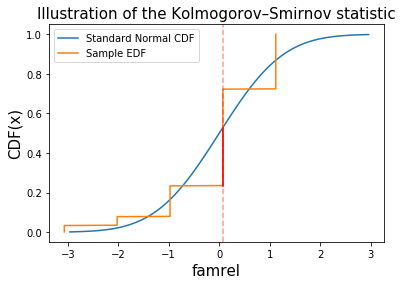

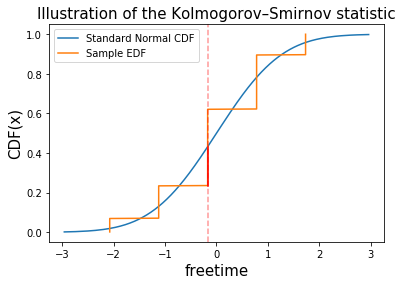

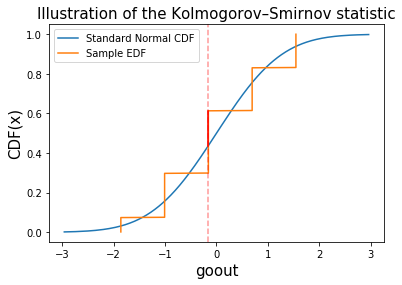

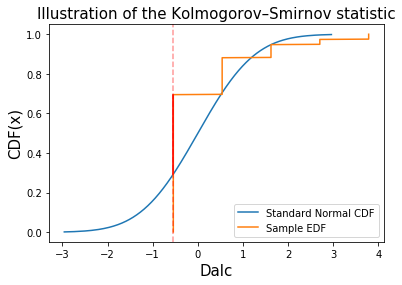

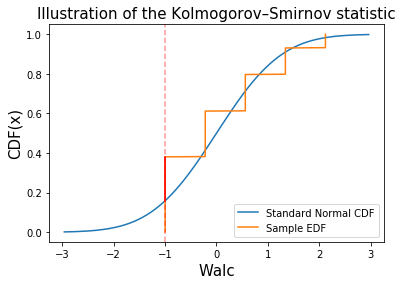

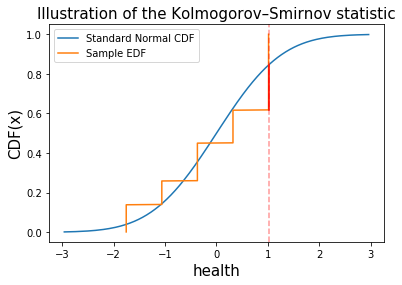

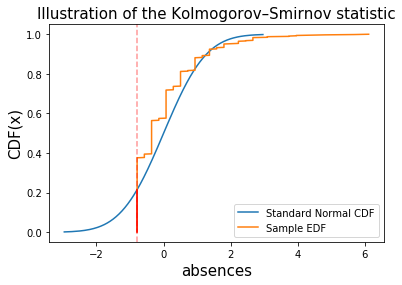

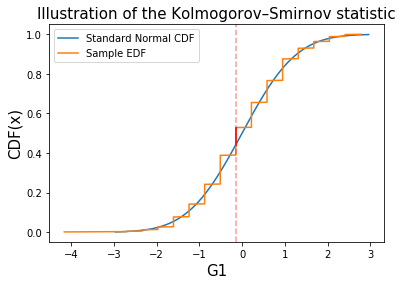

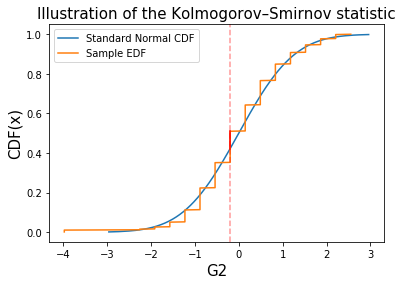

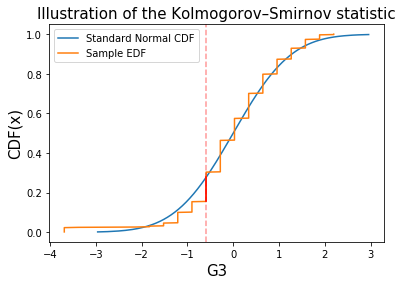

In [250]:
# Portugese Dataset

# Kolmogorov–Smirnov Test
n=649
for value in range(33):
    standardized_data=(student_por_df.iloc[:, value]-np.mean
                       (student_por_df.iloc[:, value]))/np.std(student_por_df.iloc[:, value])
    
    ks_statistic,ks_p_value=stats.kstest(standardized_data, 'norm') #Compared with standard normal distribution
    ks_statistic,ks_p_value
    probs=np.arange(1, n+1)/n # n - sample size
    stzd_data=np.sort(standardized_data)
    theoretical_values=stats.norm.ppf(probs)
    est_probs=np.interp(stzd_data,theoretical_values,probs)
    max_id=np.argmax((probs-est_probs)**2)
    
    # plot
    plt.plot(theoretical_values,probs,label='Standard Normal CDF')
    plt.plot(stzd_data,probs,label='Sample EDF')
    plt.axvline(stzd_data[max_id], color="red", linestyle="dashed", alpha=0.4)
    plt.plot([stzd_data[max_id], stzd_data[max_id]], [probs[max_id], est_probs[max_id]], color="red")
    plt.xlabel(columns[value],size=15)
    plt.ylabel('CDF(x)',size=15)
    plt.title('Illustration of the Kolmogorov–Smirnov statistic',size=15)
    plt.legend()
    plt.show()

Again, only the grade columns exhibit normal distribution because they almost fit the actual curve.

Other stistical tests such as the Shapiro-Wilk test exist but are not suitable for our datasets. Despite our datasets having a suitable number of observations(< 5000) they have a lot of identical values as a result of the categorical variables.

## Correlation Analysis

Some of the most common methods for correlation analysis are:
- Pearson's r Correlation
- Spearman's r correlation
- Kendall’s tau

The assumptions for Pearson correlation coefficient are as follows: 
- level of measurement
- related pairs
- absence of outliers
- normality of variables
- linearity
- homoscedasticity.

From the normality tests, most of our data is not normalized and is non-linear (from the scatter plots). The boxplots also show outliers. Hence Pearson is not a suitable method for testing correlation coefficient.

Spearman's/ Kendall's Correlation Assumptions:
- data must be at least ordinal 
- the scores on one variable must be monotonically related to the other variable.
 
Only a few variables are ordinal (e.g. family size, alcohol consumption) and only a few monotonic relationships have been established (between the three grades). Hence these two are also not good methods to test for correlation.

Another way to show correlation is using a correltion heatmap.

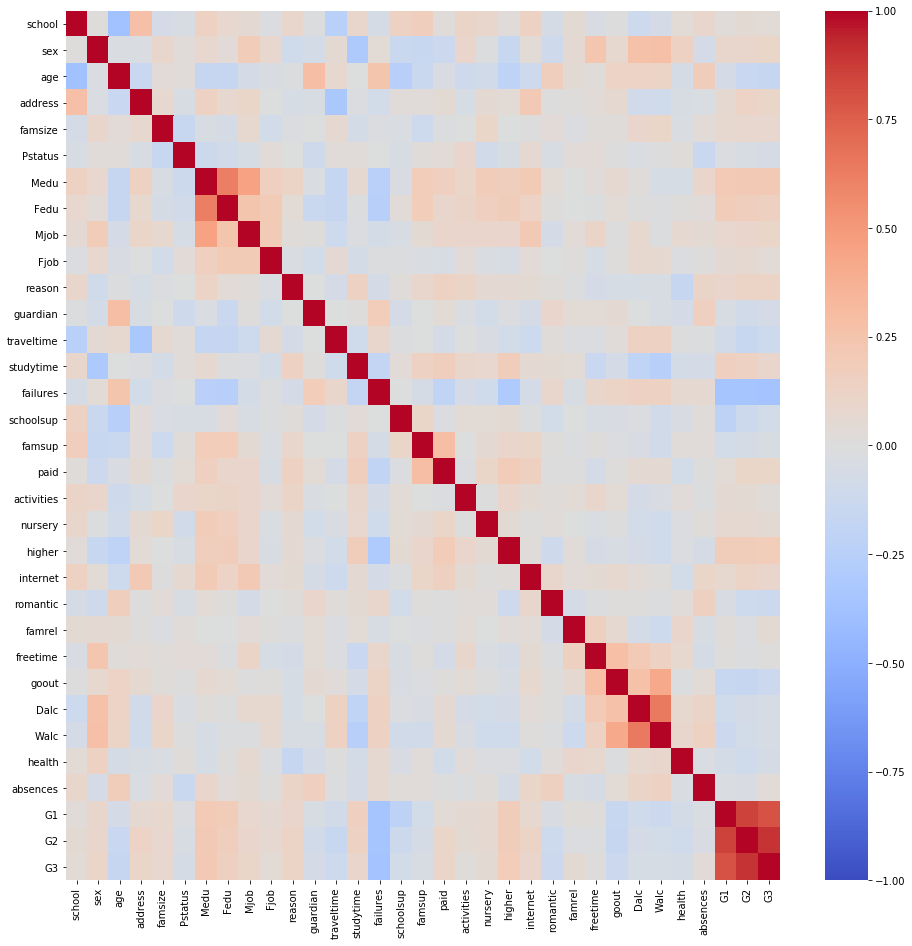

In [251]:
# Mathematics dataset

# Correlation heatmap
plt.figure(figsize=(16,16))
sns.heatmap(student_mat_df.corr(), fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

Most variables have very low correlation except for the three grades which is expected since the initial grades scored by a student  tend to be descriptive of what they score in the future.

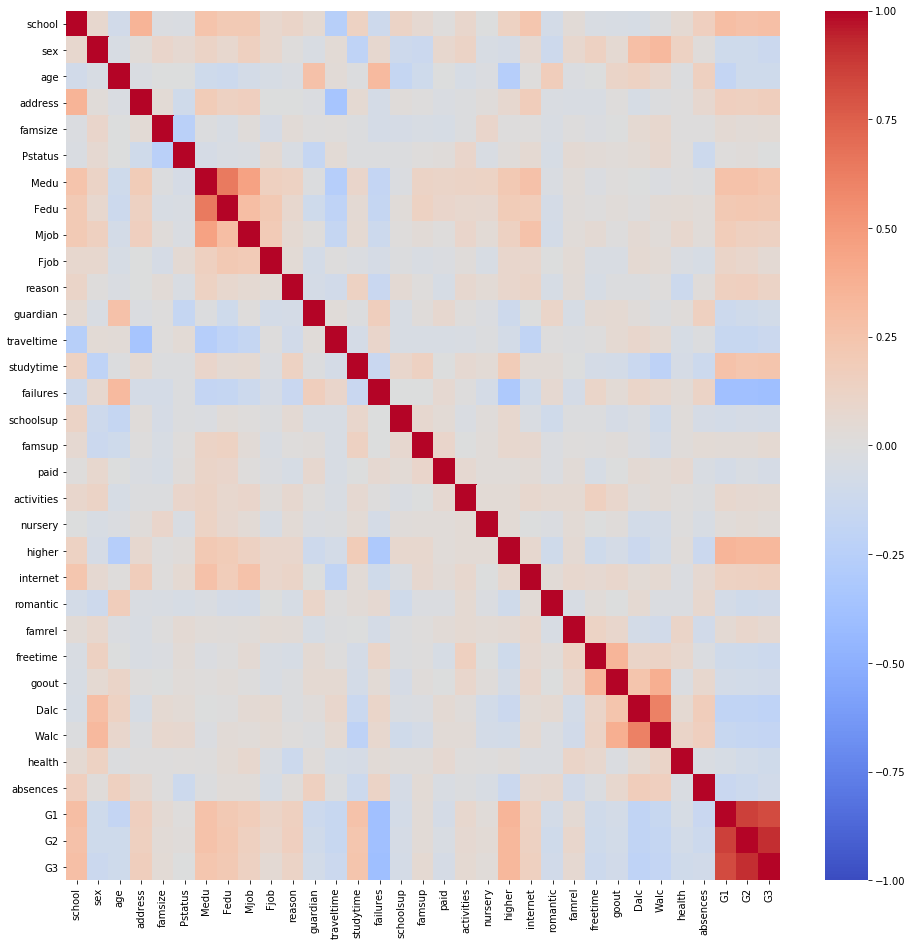

In [252]:
# Portugese dataset

# Correlation heatmap
plt.figure(figsize=(16,16))
sns.heatmap(student_por_df.corr(), fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

Most variables have very low correlation except for the three grades which is expected since the initial grades scored by a student  tend to be descriptive of what they score in the future.

## Multicollinearity 

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.

Although correlation matrix and scatter plots can also be used to find multicollinearity, their findings only show the bivariate relationship between the independent variables. VIF is preferred as it can show the correlation of a variable with a group of other variables.

The variance inflation factor (VIF) is the quotient of the variance in a model with multiple terms by the variance of a model with one term alone. It quantifies the severity of multicollinearity in an ordinary least squares regression analysis. It provides an index that measures how much the variance (the square of the estimate's standard deviation) of an estimated regression coefficient is increased because of collinearity.

references: 

https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

https://en.m.wikipedia.org/wiki/Variance_inflation_factor

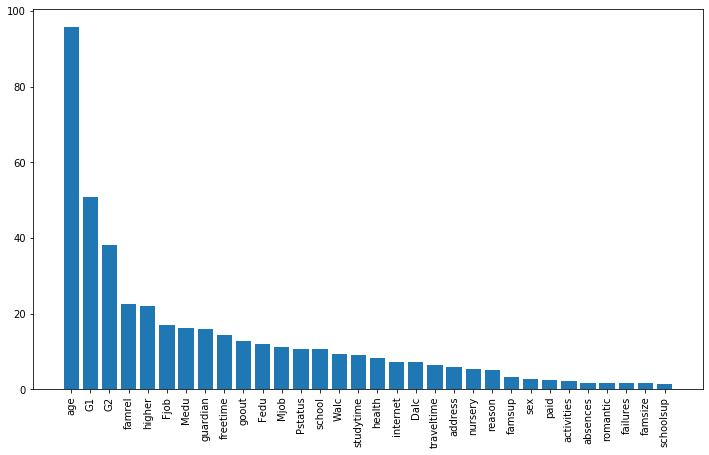

In [253]:
# Mathematics Dataset

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Defining the function that calculates VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = student_mat_df.iloc[:,:-1]
zmat=calc_vif(X)
zmat_sorted = zmat.sort_values(by=['VIF', 'variables'], ascending=False, inplace=False) #sort values

# make a bar plot for the VIf values
plt.figure(figsize=(12,7))
plt.bar(x=zmat_sorted.variables, height=zmat_sorted.VIF)
labels = zmat_sorted.variables
plt.xticks( labels, rotation='vertical')
plt.show()

Usually, categorical variables such as ID and name, which hold no significance to the target variable, are excluded while testing VIF, but since our categorical maybe of significance to the target variable we have included them. 

Generally it seems that numerical values with a bigger range such as number of abscenses and grade have the highest multicollinearity, followed by nominal values and lastly binary values have the least multicollinearity.

In [254]:
zmat

variables        VIF
0       school  10.608488
1          sex   2.747982
2          age  95.750676
3      address   5.863931
4      famsize   1.580746
5      Pstatus  10.645388
6         Medu  16.171366
7         Fedu  11.927429
8         Mjob  11.195517
9         Fjob  17.088210
10      reason   5.022012
11    guardian  15.885735
12  traveltime   6.358792
13   studytime   9.146866
14    failures   1.692122
15   schoolsup   1.331506
16      famsup   3.272666
17        paid   2.391816
18  activities   2.300679
19     nursery   5.370496
20      higher  22.042645
21    internet   7.183009
22    romantic   1.721668
23      famrel  22.436245
24    freetime  14.315303
25       goout  12.756044
26        Dalc   7.102543
27        Walc   9.386010
28      health   8.233698
29    absences   1.796324
30          G1  50.774870
31          G2  38.144441

In [255]:
# Here we are creating a new data frame that contains filtered VIf values,
#to include only varibales with high multicollinearity (>5 VIF)

zmat_high = zmat[zmat.VIF >= 5]  
colsmat= zmat_high.variables
colsmat

0         school
2            age
3        address
5        Pstatus
6           Medu
7           Fedu
8           Mjob
9           Fjob
10        reason
11      guardian
12    traveltime
13     studytime
19       nursery
20        higher
21      internet
23        famrel
24      freetime
25         goout
26          Dalc
27          Walc
28        health
30            G1
31            G2
Name: variables, dtype: object

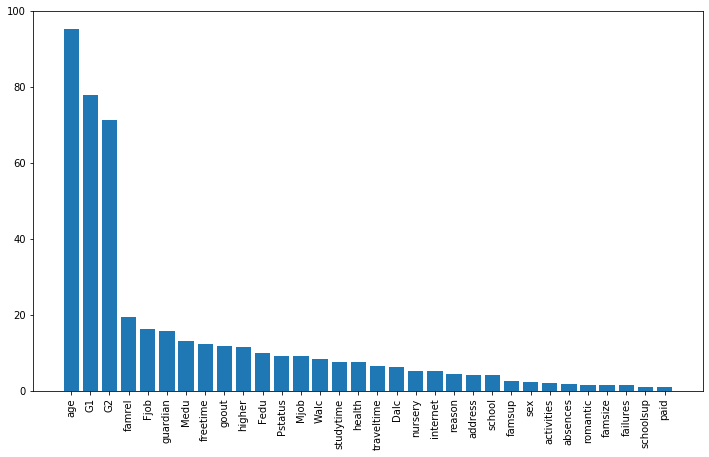

In [256]:
# Portugese Dataset

# Defining the function that calculates VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = student_por_df.iloc[:,:-1]
zpor=calc_vif(X)
zpor_sorted = zpor.sort_values(by=['VIF', 'variables'], ascending=False, inplace=False) #sort values

# make a bar plot for the VIf values
plt.figure(figsize=(12,7))
plt.bar(x=zpor_sorted.variables, height=zpor_sorted.VIF)
labels = zpor_sorted.variables
plt.xticks( labels, rotation='vertical')
plt.show()

Usually, categorical variables such as ID and name, which hold no significance to the target variable, are excluded while testing VIF, but since our categorical maybe of significance to the target variable we have included them. 

Generally it seems that numerical values with a bigger range such as number of abscenses and grade have the highest multicollinearity, followed by nominal values and lastly binary values have the least multicollinearity.

In [257]:
zpor

variables        VIF
0       school   4.189967
1          sex   2.327404
2          age  95.340822
3      address   4.222878
4      famsize   1.602380
5      Pstatus   9.337684
6         Medu  13.221357
7         Fedu  10.093097
8         Mjob   9.200222
9         Fjob  16.362399
10      reason   4.599530
11    guardian  15.933877
12  traveltime   6.543767
13   studytime   7.835498
14    failures   1.572536
15   schoolsup   1.232928
16      famsup   2.816160
17        paid   1.150063
18  activities   2.144606
19     nursery   5.304119
20      higher  11.662034
21    internet   5.210513
22    romantic   1.756469
23      famrel  19.456304
24    freetime  12.320302
25       goout  11.831159
26        Dalc   6.360253
27        Walc   8.421823
28      health   7.663971
29    absences   1.955745
30          G1  77.823283
31          G2  71.477550

In [258]:
# Here we are creating a new data frame that contains filtered VIf values,
#to include only varibales with high multicollinearity (>5 VIF)

zpor_high = zpor[zpor.VIF >= 5]  
colspor= zpor_high.variables
colspor

2            age
5        Pstatus
6           Medu
7           Fedu
8           Mjob
9           Fjob
11      guardian
12    traveltime
13     studytime
19       nursery
20        higher
21      internet
23        famrel
24      freetime
25         goout
26          Dalc
27          Walc
28        health
30            G1
31            G2
Name: variables, dtype: object

In [259]:
zall = zmat.merge(zpor, how='right', on='variables') 
zall.columns = ['variables','VIF_mat','VIF_por']
zall.sort_values(by=['VIF_mat', 'VIF_por'], ascending=False, inplace=False) #sort values

variables    VIF_mat    VIF_por
2          age  95.750676  95.340822
30          G1  50.774870  77.823283
31          G2  38.144441  71.477550
23      famrel  22.436245  19.456304
20      higher  22.042645  11.662034
9         Fjob  17.088210  16.362399
6         Medu  16.171366  13.221357
11    guardian  15.885735  15.933877
24    freetime  14.315303  12.320302
25       goout  12.756044  11.831159
7         Fedu  11.927429  10.093097
8         Mjob  11.195517   9.200222
5      Pstatus  10.645388   9.337684
0       school  10.608488   4.189967
27        Walc   9.386010   8.421823
13   studytime   9.146866   7.835498
28      health   8.233698   7.663971
21    internet   7.183009   5.210513
26        Dalc   7.102543   6.360253
12  traveltime   6.358792   6.543767
3      address   5.863931   4.222878
19     nursery   5.370496   5.304119
10      reason   5.022012   4.599530
16      famsup   3.272666   2.816160
1          sex   2.747982   2.327404
17        paid   2.391816   1.150063
18  activities   2.300679   2.144606
29    absences   1.796324   1.955745
22    romantic   1.721668   1.756469
14    failures   1.692122   1.572536
4      famsize   1.580746   1.602380
15   schoolsup   1.331506   1.232928

VIF values from both datasets do not show a big difference With only the grades having a significant difference.

### Scaling the data

Having implemented the models before with 'G1', 'G2' and 'G3' as they were in the original dataset, the models did not perform well. All models had accuracies below 45%. The conclusion we drew from this was, since we approached this as a classification problem,  the label Variable 'G3' had too many classes (21) for each value from 0 to 20 this making it difficult to classify given the number of instances is only 395. We resolved to reducing the number of classes farther by mapping values of 'G3' to only 4 classes. This improved the model performance by almost double (about 75% for most models). Considering the fact that 'G1', 'G2' and 'G3' are all similar in terms of format, they are all grades and all had a range of 0 to 20, it is justifiable to also categorize 'G1' and 'G2' as has been done to 'G3'.



In [261]:
# Mathematics Dataset

from numpy import interp

grades = ['G1','G2','G3']
student_mat_df[grades] = interp(student_mat_df[grades],[0, 20],[1, 5]).round(0)   # since the resulting variables are float,

 # we change to intergers
student_mat_df[grades].astype(int)                                               

# we first define all features as the type 'category'
student_mat_df.iloc[:, 0:33] =(student_mat_df.iloc[:, 0:33]).astype('category')

# Defining the numerial data types by overwriting their initial 'category' type
student_mat_df[["age", "absences"]] = student_mat_df[["age", "absences"]].astype('int')


In [262]:
# Portugese Dataset

grades = ['G1','G2','G3']
student_por_df[grades] = interp(student_por_df[grades],[0, 20],[1, 5]).round(0)   # since the resulting variables are float,

 # we change to intergers
student_por_df[grades].astype(int)                                               

# we first define all features as the type 'category'
student_por_df.iloc[:, 0:33] =(student_por_df.iloc[:, 0:33]).astype('category')

# Defining the numerial data types by overwriting their initial 'category' type
student_por_df[["age", "absences"]] = student_por_df[["age", "absences"]].astype('int')


## Define predictors and target vriables

In [263]:
# Mathematics Dataset

# We first divide our data into attributes and labels:

X_mat = student_mat_df.iloc[:, 0:-1].values       # Independent/predictor variables
y_mat = student_mat_df.iloc[:, -1].values         # Dependent/label variable

In [264]:
# Portugese Dataset

# We first divide our data into attributes and labels:

X_por = student_por_df.iloc[:, 0:-1].values       # Independent/predictor variables
y_por = student_por_df.iloc[:, -1].values         # Dependent/label variable


### Defining the data type as categorical for the categorical variables

In [265]:
# Mathematics Dataset

# we first define all features as the type 'category'
student_mat_df.iloc[:, 0:33] =(student_mat_df.iloc[:, 0:33]).astype('category')

# Defining the interger data types by overwriting their initial 'category' type
student_mat_df[["age", "absences"]] = student_mat_df[["age", "absences"]].astype('int')


# confirm results
student_mat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    category
 1   sex         395 non-null    category
 2   age         395 non-null    int32   
 3   address     395 non-null    category
 4   famsize     395 non-null    category
 5   Pstatus     395 non-null    category
 6   Medu        395 non-null    category
 7   Fedu        395 non-null    category
 8   Mjob        395 non-null    category
 9   Fjob        395 non-null    category
 10  reason      395 non-null    category
 11  guardian    395 non-null    category
 12  traveltime  395 non-null    category
 13  studytime   395 non-null    category
 14  failures    395 non-null    category
 15  schoolsup   395 non-null    category
 16  famsup      395 non-null    category
 17  paid        395 non-null    category
 18  activities  395 non-null    category
 19  nursery 

In [266]:
# Portugese Dataset

# we first define all features as the type 'category'
student_por_df.iloc[:, 0:33] =(student_por_df.iloc[:, 0:33]).astype('category')

# Defining the numerial data types by overwriting their initial 'category' type
student_por_df[["age", "absences"]] = student_por_df[["age", "absences"]].astype('int')


# confirm results
student_por_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      649 non-null    category
 1   sex         649 non-null    category
 2   age         649 non-null    int32   
 3   address     649 non-null    category
 4   famsize     649 non-null    category
 5   Pstatus     649 non-null    category
 6   Medu        649 non-null    category
 7   Fedu        649 non-null    category
 8   Mjob        649 non-null    category
 9   Fjob        649 non-null    category
 10  reason      649 non-null    category
 11  guardian    649 non-null    category
 12  traveltime  649 non-null    category
 13  studytime   649 non-null    category
 14  failures    649 non-null    category
 15  schoolsup   649 non-null    category
 16  famsup      649 non-null    category
 17  paid        649 non-null    category
 18  activities  649 non-null    category
 19  nursery 

In [267]:
# Mathematics Dataset

# scaling using the standard scaler function from sci-kit learn 
# Only numerical variables should be scaled
# i.e. age and abscences
# grades will be excluded as they have now been categorized
# all other attibutes reperesent categories

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
Xnum = X_mat[[2,29]]
Xnum = sc_x.fit_transform(Xnum)

X_mat[[2,29]] = Xnum

In [268]:
# Portugese Dataset

# scaling using the standard scaler function from sci-kit learn 


sc_x = StandardScaler()             # Create instance of the standard scaler

Xnum2 = X_por[[2,29]]               # Numerical variables only

Xnum2 = sc_x.fit_transform(Xnum)    # fit and transform the data


X_por[[2,29]] = Xnum2

### Feature selection/ Dimension reduction

Not all the provided features may have a significant effect 
on the target variable. While exploration and visualizations 
help in giving insights on the correlation,some connections
may not be directly perceived. As such, including variables 
that have minimal effect on the target variable or ommiting 
variables that have significant effect during modelling affects
the performance of the models. 

Boruta, a dimension reduction feature, automates the process
by checking for multicollinearity and reduces the number of 
features to only the most significant hence boosting model performance.


Why Variable Selection is important?
1. Removing a redundant variable helps to improve accuracy. Similarly, inclusion of a relevant variable has a positive effect on model    accuracy.
2. Too many variables might result to overfitting which means model is not able to generalize pattern
3. Too many variables leads to slow computation which in turns requires more memory and hardware.

The working principle behind boruta is it performs shuffling of predictors' values and join them with the original predictors and then build random forest on the merged dataset. Then make comparison of original variables with the randomised variables to measure variable importance. Only variables having higher importance than that of the randomised variables are considered important.

references: 
- https://www.listendata.com/2017/05/feature-selection-boruta-package.html

### Feature Selection with Boruta

In [311]:
# Mathematics Dataset

from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

# NOTE BorutaPy accepts numpy arrays only, hence the .values attribute
y_mat = y_mat.ravel() # Returns a contiguous flattened array. A 1-D array, 
                  # containing the elements of the input, is returned.

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=15)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=0, random_state=1)

# find all relevant features - 15 features should be selected
feat_selector.fit(X_mat, y_mat)

# check selected features - first 15 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_mat_filtered = feat_selector.transform(X_mat)


Iteration: 1 / 100
Iteration: 2 / 100
Iteration: 3 / 100
Iteration: 4 / 100
Iteration: 5 / 100
Iteration: 6 / 100
Iteration: 7 / 100
Iteration: 8 / 100
Iteration: 9 / 100
Iteration: 10 / 100
Iteration: 11 / 100
Iteration: 12 / 100
Iteration: 13 / 100
Iteration: 14 / 100
Iteration: 15 / 100
Iteration: 16 / 100
Iteration: 17 / 100
Iteration: 18 / 100
Iteration: 19 / 100


BorutaPy finished running.

Iteration: 	20 / 100
Confirmed: 	3
Tentative: 	0
Rejected: 	29


In [312]:
# Portugese Dataset

# NOTE BorutaPy accepts numpy arrays only, hence the .values attribute
y_por = y_por.ravel() # Returns a contiguous flattened array. A 1-D array, 
                  # containing the elements of the input, is returned.

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=15)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=0, random_state=1)

# find all relevant features - 15 features should be selected
feat_selector.fit(X_por, y_por)

# check selected features - first 15 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_por_filtered = feat_selector.transform(X_por)


### Splitting the dataset into testing and training set

In [313]:
# Mathematics Dataset

# splitting the data into a training and testing set

from sklearn.model_selection import train_test_split

X_mat_train, X_mat_test, y_mat_train, y_mat_test = train_test_split(X_mat_filtered,
                                                                    y_mat, test_size = 0.25, 
                                                                    random_state = 0)

In [314]:
# Portugese Dataset

# splitting the data into a training and testing set

X_por_train, X_por_test, y_por_train, y_por_test = train_test_split(X_por_filtered,
                                                                    y_por, test_size = 0.25, 
                                                                    random_state = 0)

### Modelling

In [315]:
# import the classifier models
from sklearn.linear_model import LogisticRegression # Logistic Regression Classifier
from sklearn.tree import DecisionTreeClassifier     # Decision Tree Classifier
from sklearn import svm                             # SVM Classifier
from sklearn.naive_bayes import GaussianNB          # Naive Bayes Classifier
from sklearn.neighbors import KNeighborsClassifier  # KNN Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
from xgboost import XGBClassifier                   # XGBoost Classifier


In [316]:
# Mathematics Dataset

# Create instancess of the classifiers
logistic_classifier = LogisticRegression(random_state = 0, solver='newton-cg', 
                                         max_iter= 1000, fit_intercept = True, 
                                         multi_class='auto', n_jobs = 10)
decision_classifier = DecisionTreeClassifier()
svm_svc_classifier = svm.SVC(decision_function_shape='ovo', kernel='rbf', gamma='auto')
knn_classifier = KNeighborsClassifier(n_neighbors=5)
naive_classifier = GaussianNB()#.fit(X_train, y_train)
random_classifier = RandomForestClassifier(max_depth=9, min_samples_leaf=2, random_state=0)
xgb = XGBClassifier(max_depth=9,objective='multi:softmax', num_class=4)

# Fit the instances with the training set
logistic_classifier.fit(X_mat_train, y_mat_train)
decision_classifier.fit(X_mat_train, y_mat_train)
svm_svc_classifier.fit(X_mat_train, y_mat_train)
knn_classifier.fit(X_mat_train, y_mat_train)
naive_classifier.fit(X_mat_train, y_mat_train)
random_classifier.fit(X_mat_train, y_mat_train)
xgb.fit(X_mat_train, y_mat_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_class=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [317]:
# Portugese Dataset

# Create instancess of the classifiers
logisticRC = LogisticRegression(random_state = 0, solver='newton-cg', 
                                         max_iter= 1000, fit_intercept = True, 
                                         multi_class='auto', n_jobs = 10)
decisionTC = DecisionTreeClassifier()
svm_svc = svm.SVC(decision_function_shape='ovo', kernel='rbf', gamma='auto')
knnC = KNeighborsClassifier(n_neighbors=5)
naiveC = GaussianNB()#.fit(X_train, y_train)
randomFC = RandomForestClassifier(max_depth=9, min_samples_leaf=2, random_state=0)
xgb2 = XGBClassifier(max_depth=9,objective='multi:softmax', num_class=4)

# Fit the instances with the training set
logisticRC.fit(X_por_train, y_por_train)
decisionTC.fit(X_por_train, y_por_train)
svm_svc.fit(X_por_train, y_por_train)
knnC.fit(X_por_train, y_por_train)
naiveC.fit(X_por_train, y_por_train)
randomFC.fit(X_por_train, y_por_train)
xgb2.fit(X_por_train, y_por_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_class=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Predicting the target variable using the classifier instances created

In [318]:
# Mathematics Dataset 

# Predict values in the training test
logistic_y_prediction = logistic_classifier.predict(X_mat_test) 
decision_y_prediction = decision_classifier.predict(X_mat_test) 
svm_svc_y_prediction = svm_svc_classifier.predict(X_mat_test) 
knn_y_prediction = knn_classifier.predict(X_mat_test) 
naive_y_prediction = naive_classifier.predict(X_mat_test) 
random_y_prediction = random_classifier.predict(X_mat_test)
xgb_y_prediction = xgb.predict(X_mat_test)

In [319]:
# Portugese Dataset 

# Predict values in the training test
logistic_y_pred = logisticRC.predict(X_por_test) 
decision_y_pred = decisionTC.predict(X_por_test) 
svm_svc_y_pred = svm_svc.predict(X_por_test) 
knn_y_pred = knnC.predict(X_por_test) 
naive_y_pred = naiveC.predict(X_por_test) 
random_y_pred = randomFC.predict(X_por_test)
xgb_y_pred = xgb2.predict(X_por_test)

### Rate the accuracy of the models using %

In [320]:
# Mathematics Dataset

from sklearn.metrics import classification_report, accuracy_score

# Measure accuracy of the dataset 
print('{} LogisticRegression'.format(accuracy_score(logistic_y_prediction, y_mat_test)))
print("{} DecisonTree".format(accuracy_score(decision_y_prediction, y_mat_test)))
print("{} SVM".format(accuracy_score(svm_svc_y_prediction, y_mat_test)))
print("{} KNN".format(accuracy_score(knn_y_prediction, y_mat_test)))
print("{} NaiveBayes".format(accuracy_score(naive_y_prediction, y_mat_test)))
print("{} RandomForest".format(accuracy_score(random_y_prediction, y_mat_test)))
print("{} XGB".format((accuracy_score(xgb_y_prediction, y_mat_test)) ))

0.8080808080808081 LogisticRegression
0.8686868686868687 DecisonTree
0.8282828282828283 SVM
0.7474747474747475 KNN
0.8080808080808081 NaiveBayes
0.8383838383838383 RandomForest
0.8686868686868687 XGB


In [321]:
# Portugese Dataset

# Measure accuracy of the dataset 
print('{} LogisticRegression'.format(accuracy_score(logistic_y_pred, y_por_test)))
print("{} DecisonTree".format(accuracy_score(decision_y_pred, y_por_test)))
print("{} SVM".format(accuracy_score(svm_svc_y_pred, y_por_test)))
print("{} KNN".format(accuracy_score(knn_y_pred, y_por_test)))
print("{} NaiveBayes".format(accuracy_score(naive_y_pred, y_por_test)))
print("{} RandomForest".format(accuracy_score(random_y_pred, y_por_test)))
print("{} XGB".format((accuracy_score(xgb_y_pred, y_por_test)) ))

0.8159509202453987 LogisticRegression
0.8220858895705522 DecisonTree
0.7914110429447853 SVM
0.803680981595092 KNN
0.3496932515337423 NaiveBayes
0.8343558282208589 RandomForest
0.8220858895705522 XGB


The Models perform better with the Mathematics dataset which has fewer data points. In the Portugese dataset Naive Bayes' performance drops significantly.


| Dataset   | logistic | Decision Tree | SVM   | KNN   | Naive Bayes | Random Forest | XGB   |
|-----------|----------|---------------|-------|-------|-------------|---------------|-------|
| Math      | 0.808    | 0.867         | 0.828 | 0.747 | 0.808       | 0.838         | 0.869 |
| Portugese | 0.806    | 0.822         | 0.791 | 0.804 | 0.350       | 0.834         | 0.822 |

## Parameter Tuning using XGBoost & GridSearchCV

**Note: The Dataset used with XGBoost here below has not undergone feature selection!**

In [322]:
# Import necessary libraries

from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
from matplotlib import pyplot
#matplotlib.use('Agg')
import numpy



### Tune the Number of Decision Trees in XGBoost

Best: -0.514501 using {'n_estimators': 20}
-1.609438 (0.000000) with: {'n_estimators': 0}
-0.522626 (0.188349) with: {'n_estimators': 10}
-0.514501 (0.236946) with: {'n_estimators': 20}
-0.533795 (0.265921) with: {'n_estimators': 30}
-0.554741 (0.282141) with: {'n_estimators': 40}
-0.570251 (0.294031) with: {'n_estimators': 50}
-0.585944 (0.304728) with: {'n_estimators': 60}
-0.597360 (0.309659) with: {'n_estimators': 70}
-0.607165 (0.314428) with: {'n_estimators': 80}
-0.616142 (0.319123) with: {'n_estimators': 90}
-0.623270 (0.322346) with: {'n_estimators': 100}
-0.628574 (0.324667) with: {'n_estimators': 110}
-0.634008 (0.326078) with: {'n_estimators': 120}
-0.638255 (0.328929) with: {'n_estimators': 130}
-0.641019 (0.329882) with: {'n_estimators': 140}
-0.644762 (0.329554) with: {'n_estimators': 150}
-0.649027 (0.328796) with: {'n_estimators': 160}
-0.651928 (0.329558) with: {'n_estimators': 170}
-0.654942 (0.331025) with: {'n_estimators': 180}
-0.658242 (0.332998) with: {'n_estima

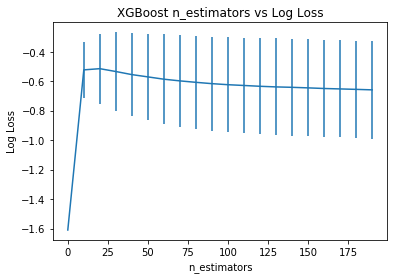

In [323]:
#  Mathematics dataset,
#  Tune n_estimators


# grid search
model = XGBClassifier()
n_estimators = range(0, 200, 10)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_mat, y_mat)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
    
    
# plot
pyplot.errorbar(n_estimators, means, yerr=stds)
pyplot.title("XGBoost n_estimators vs Log Loss")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators.png')

Best: -0.487251 using {'n_estimators': 20}
-1.609438 (0.000000) with: {'n_estimators': 0}
-0.513786 (0.091527) with: {'n_estimators': 10}
-0.487251 (0.107404) with: {'n_estimators': 20}
-0.499652 (0.126073) with: {'n_estimators': 30}
-0.524721 (0.134966) with: {'n_estimators': 40}
-0.545389 (0.135583) with: {'n_estimators': 50}
-0.563049 (0.139413) with: {'n_estimators': 60}
-0.575792 (0.145508) with: {'n_estimators': 70}
-0.585942 (0.148675) with: {'n_estimators': 80}
-0.593936 (0.150827) with: {'n_estimators': 90}
-0.600557 (0.151620) with: {'n_estimators': 100}
-0.605054 (0.151925) with: {'n_estimators': 110}
-0.611223 (0.153054) with: {'n_estimators': 120}
-0.616041 (0.153103) with: {'n_estimators': 130}
-0.620889 (0.154479) with: {'n_estimators': 140}
-0.625524 (0.154806) with: {'n_estimators': 150}
-0.631601 (0.156286) with: {'n_estimators': 160}
-0.635320 (0.155667) with: {'n_estimators': 170}
-0.637880 (0.154509) with: {'n_estimators': 180}
-0.640670 (0.156231) with: {'n_estima

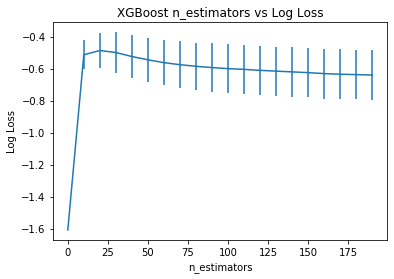

In [324]:
# Portugese dataset,
# Tune n_estimators


# grid search
model = XGBClassifier()
n_estimators = range(0, 200, 10)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_por, y_por)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
    
    
# plot
pyplot.errorbar(n_estimators, means, yerr=stds)
pyplot.title("XGBoost n_estimators vs Log Loss")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators.png')

### Tune the Size of Decision Trees in XGBoost

range(1, 15, 2)
Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   11.5s finished


Best: -0.479998 using {'max_depth': 1}
-0.479998 (0.196502) with: {'max_depth': 1}
-0.584004 (0.305970) with: {'max_depth': 3}
-0.614906 (0.335846) with: {'max_depth': 5}
-0.630037 (0.337661) with: {'max_depth': 7}
-0.618730 (0.329758) with: {'max_depth': 9}
-0.622481 (0.338079) with: {'max_depth': 11}
-0.622481 (0.338079) with: {'max_depth': 13}


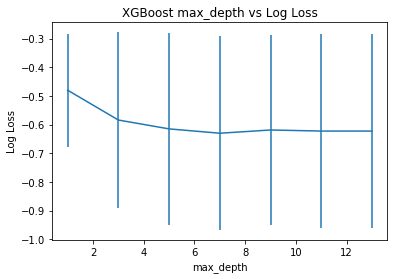

In [325]:
# Mathematics dataset, 
# Tune max_depth


# grid search
model = XGBClassifier()
max_depth = range(1, 15, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_mat, y_mat)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
    
# plot
pyplot.errorbar(max_depth, means, yerr=stds)
pyplot.title("XGBoost max_depth vs Log Loss")
pyplot.xlabel('max_depth')
pyplot.ylabel('Log Loss')
pyplot.savefig('max_depth.png')

range(1, 15, 2)
Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   19.2s finished


Best: -0.421974 using {'max_depth': 1}
-0.421974 (0.097937) with: {'max_depth': 1}
-0.534371 (0.103083) with: {'max_depth': 3}
-0.591772 (0.150339) with: {'max_depth': 5}
-0.601218 (0.162354) with: {'max_depth': 7}
-0.612627 (0.134711) with: {'max_depth': 9}
-0.606898 (0.125011) with: {'max_depth': 11}
-0.606980 (0.135109) with: {'max_depth': 13}


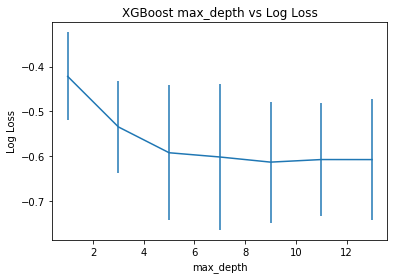

In [326]:
# Portugese dataset, 
# Tune max_depth


# grid search
model = XGBClassifier()
max_depth = range(1, 15, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_por, y_por)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
    
# plot
pyplot.errorbar(max_depth, means, yerr=stds)
pyplot.title("XGBoost max_depth vs Log Loss")
pyplot.xlabel('max_depth')
pyplot.ylabel('Log Loss')
pyplot.savefig('max_depth.png')

### Tune The Number of Trees and Max Depth in XGBoost

[2, 4, 6, 8]
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    8.6s finished


Best: -0.467629 using {'max_depth': 2, 'n_estimators': 20}
-0.498701 (0.148837) with: {'max_depth': 2, 'n_estimators': 10}
-0.467629 (0.172882) with: {'max_depth': 2, 'n_estimators': 20}
-0.469836 (0.189859) with: {'max_depth': 2, 'n_estimators': 30}
-0.477455 (0.200672) with: {'max_depth': 2, 'n_estimators': 40}
-0.504482 (0.174456) with: {'max_depth': 4, 'n_estimators': 10}
-0.484752 (0.213468) with: {'max_depth': 4, 'n_estimators': 20}
-0.498681 (0.243145) with: {'max_depth': 4, 'n_estimators': 30}
-0.512479 (0.255939) with: {'max_depth': 4, 'n_estimators': 40}
-0.522626 (0.188349) with: {'max_depth': 6, 'n_estimators': 10}
-0.514501 (0.236946) with: {'max_depth': 6, 'n_estimators': 20}
-0.533795 (0.265921) with: {'max_depth': 6, 'n_estimators': 30}
-0.554741 (0.282141) with: {'max_depth': 6, 'n_estimators': 40}
-0.520210 (0.185824) with: {'max_depth': 8, 'n_estimators': 10}
-0.517560 (0.242134) with: {'max_depth': 8, 'n_estimators': 20}
-0.538308 (0.267382) with: {'max_depth': 8, '

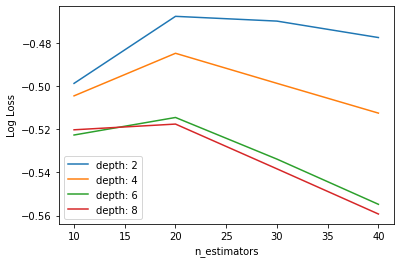

In [327]:
# Mathematics dataset, 
# Tune n_estimators and max_depth

# grid search
model = XGBClassifier()
n_estimators = [10, 20, 30, 40]
max_depth = [2, 4, 6, 8]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_mat, y_mat)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
    
    
# plot results
scores = numpy.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    pyplot.plot(n_estimators, scores[i], label='depth: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators_vs_max_depth.png')

[2, 4, 6, 8]
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   13.0s finished


Best: -0.436793 using {'max_depth': 2, 'n_estimators': 30}
-0.503436 (0.081999) with: {'max_depth': 2, 'n_estimators': 10}
-0.444874 (0.083954) with: {'max_depth': 2, 'n_estimators': 20}
-0.436793 (0.092205) with: {'max_depth': 2, 'n_estimators': 30}
-0.443227 (0.099908) with: {'max_depth': 2, 'n_estimators': 40}
-0.500422 (0.082370) with: {'max_depth': 4, 'n_estimators': 10}
-0.463086 (0.096004) with: {'max_depth': 4, 'n_estimators': 20}
-0.475655 (0.103934) with: {'max_depth': 4, 'n_estimators': 30}
-0.496397 (0.112120) with: {'max_depth': 4, 'n_estimators': 40}
-0.513786 (0.091527) with: {'max_depth': 6, 'n_estimators': 10}
-0.487251 (0.107404) with: {'max_depth': 6, 'n_estimators': 20}
-0.499652 (0.126073) with: {'max_depth': 6, 'n_estimators': 30}
-0.524721 (0.134966) with: {'max_depth': 6, 'n_estimators': 40}
-0.519716 (0.084622) with: {'max_depth': 8, 'n_estimators': 10}
-0.502145 (0.112865) with: {'max_depth': 8, 'n_estimators': 20}
-0.523915 (0.117417) with: {'max_depth': 8, '

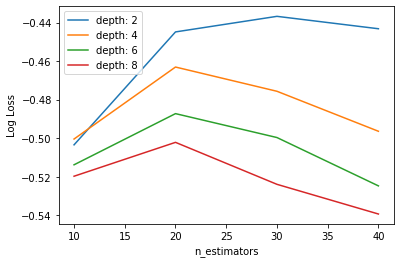

In [328]:
# Portugese dataset, 
# Tune n_estimators and max_depth

# grid search
model = XGBClassifier()
n_estimators = [10, 20, 30, 40]
max_depth = [2, 4, 6, 8]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_por, y_por)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
    
    
# plot results
scores = numpy.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    pyplot.plot(n_estimators, scores[i], label='depth: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators_vs_max_depth.png')

In [329]:
# Mathematics Dataset

# rerun the model with the tuned parameters
xgb_mat_tuned = XGBClassifier(max_depth=2,n_estimators=20,objective='multi:softmax', num_class=5)
xgb_mat_tuned.fit(X_mat_train, y_mat_train)
xgb_mat_tuned_y_prediction = xgb_mat_tuned.predict(X_mat_test)
print(accuracy_score(xgb_mat_tuned_y_prediction, y_mat_test))

0.8787878787878788


In [330]:
# Portugese Dataset

# rerun the model with the tuned parameters
xgb_por_tuned = XGBClassifier(max_depth=2,n_estimators=30,objective='multi:softmax', num_class=5)
xgb_por_tuned.fit(X_por_train, y_por_train)
xgb_por_tuned_y_prediction = xgb_por_tuned.predict(X_por_test)
print(accuracy_score(xgb_por_tuned_y_prediction, y_por_test))

0.8159509202453987


Tuned parameters have equal values for both datasets:
 - n_estimators = 20, 30 for math and portugese respectively
 - max_depth = 2 for both
 
The performance doesn't change significantly: 
- math:
    - 0.869 to 0.879
- portugese:
    - 0.822 to 0.816 
    - but does better with 20 n_estimators @ 0.8222

**Note: The Dataset used with XGBoost here below has undergone feature selection with Boruta!**

Best: -0.517114 using {'n_estimators': 10}
-1.609438 (0.000000) with: {'n_estimators': 0}
-0.517114 (0.159379) with: {'n_estimators': 10}
-0.520333 (0.211440) with: {'n_estimators': 20}
-0.536148 (0.237500) with: {'n_estimators': 30}
-0.552211 (0.255512) with: {'n_estimators': 40}
-0.563965 (0.267279) with: {'n_estimators': 50}
-0.574127 (0.276173) with: {'n_estimators': 60}
-0.582270 (0.283140) with: {'n_estimators': 70}
-0.589302 (0.288549) with: {'n_estimators': 80}
-0.595574 (0.293178) with: {'n_estimators': 90}
-0.601186 (0.296432) with: {'n_estimators': 100}
-0.605542 (0.300038) with: {'n_estimators': 110}
-0.610054 (0.304045) with: {'n_estimators': 120}
-0.615098 (0.307195) with: {'n_estimators': 130}
-0.619287 (0.309869) with: {'n_estimators': 140}
-0.624032 (0.313325) with: {'n_estimators': 150}
-0.626978 (0.315875) with: {'n_estimators': 160}
-0.630222 (0.318418) with: {'n_estimators': 170}
-0.633518 (0.321352) with: {'n_estimators': 180}
-0.636795 (0.324128) with: {'n_estima

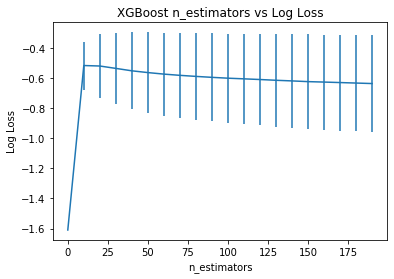

In [331]:
# Mathematics dataset,
# Tune n_estimators


# grid search
model = XGBClassifier()
n_estimators = range(0, 200, 10)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_mat_filtered, y_mat)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
    
    
# plot
pyplot.errorbar(n_estimators, means, yerr=stds)
pyplot.title("XGBoost n_estimators vs Log Loss")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators.png')

Best: -0.517540 using {'n_estimators': 20}
-1.609438 (0.000000) with: {'n_estimators': 0}
-0.523570 (0.096294) with: {'n_estimators': 10}
-0.517540 (0.119284) with: {'n_estimators': 20}
-0.534499 (0.126374) with: {'n_estimators': 30}
-0.551908 (0.135922) with: {'n_estimators': 40}
-0.565720 (0.138390) with: {'n_estimators': 50}
-0.576717 (0.141345) with: {'n_estimators': 60}
-0.582544 (0.140899) with: {'n_estimators': 70}
-0.591086 (0.141096) with: {'n_estimators': 80}
-0.597786 (0.142084) with: {'n_estimators': 90}
-0.604709 (0.143405) with: {'n_estimators': 100}
-0.610266 (0.144531) with: {'n_estimators': 110}
-0.615607 (0.145933) with: {'n_estimators': 120}
-0.619707 (0.145353) with: {'n_estimators': 130}
-0.623459 (0.146081) with: {'n_estimators': 140}
-0.628870 (0.146011) with: {'n_estimators': 150}
-0.631987 (0.146433) with: {'n_estimators': 160}
-0.635359 (0.147681) with: {'n_estimators': 170}
-0.637915 (0.147923) with: {'n_estimators': 180}
-0.640481 (0.148115) with: {'n_estima

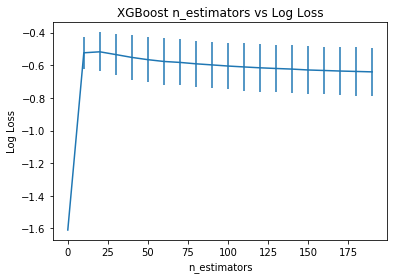

In [332]:
# Portugese dataset,
# Tune n_estimators


# grid search
model = XGBClassifier()
n_estimators = range(0, 200, 10)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_por_filtered, y_por)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
    
    
# plot
pyplot.errorbar(n_estimators, means, yerr=stds)
pyplot.title("XGBoost n_estimators vs Log Loss")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators.png')

range(1, 15, 2)
Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    6.3s finished


Best: -0.463242 using {'max_depth': 1}
-0.463242 (0.197632) with: {'max_depth': 1}
-0.560172 (0.284162) with: {'max_depth': 3}
-0.584174 (0.279104) with: {'max_depth': 5}
-0.602809 (0.295990) with: {'max_depth': 7}
-0.608853 (0.298320) with: {'max_depth': 9}
-0.610731 (0.298938) with: {'max_depth': 11}
-0.611568 (0.298929) with: {'max_depth': 13}


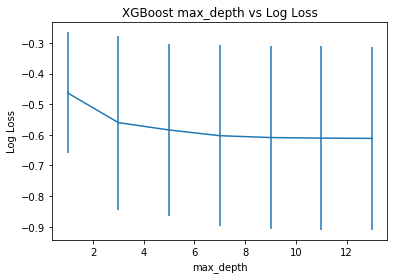

In [333]:
# Mathematics dataset,
# Tune max_depth


# grid search
model = XGBClassifier()
max_depth = range(1, 15, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_mat_filtered, y_mat)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
    
    
# plot
pyplot.errorbar(max_depth, means, yerr=stds)
pyplot.title("XGBoost max_depth vs Log Loss")
pyplot.xlabel('max_depth')
pyplot.ylabel('Log Loss')
pyplot.savefig('max_depth.png')

range(1, 15, 2)
Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    9.5s finished


Best: -0.464069 using {'max_depth': 1}
-0.464069 (0.104930) with: {'max_depth': 1}
-0.534781 (0.114334) with: {'max_depth': 3}
-0.589335 (0.146827) with: {'max_depth': 5}
-0.606863 (0.143597) with: {'max_depth': 7}
-0.613945 (0.143987) with: {'max_depth': 9}
-0.612810 (0.144857) with: {'max_depth': 11}
-0.615086 (0.143563) with: {'max_depth': 13}


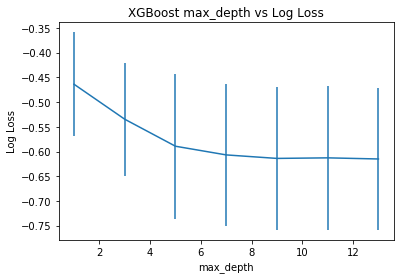

In [334]:
# Portugese dataset,
# Tune max_depth


# grid search
model = XGBClassifier()
max_depth = range(1, 15, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_por_filtered, y_por)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
    
    
# plot
pyplot.errorbar(max_depth, means, yerr=stds)
pyplot.title("XGBoost max_depth vs Log Loss")
pyplot.xlabel('max_depth')
pyplot.ylabel('Log Loss')
pyplot.savefig('max_depth.png')

[2, 4, 6, 8]
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 153 out of 160 | elapsed:    3.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    3.9s finished


Best: -0.453804 using {'max_depth': 2, 'n_estimators': 20}
-0.481077 (0.146375) with: {'max_depth': 2, 'n_estimators': 10}
-0.453804 (0.172225) with: {'max_depth': 2, 'n_estimators': 20}
-0.455738 (0.183178) with: {'max_depth': 2, 'n_estimators': 30}
-0.469098 (0.201104) with: {'max_depth': 2, 'n_estimators': 40}
-0.506087 (0.158006) with: {'max_depth': 4, 'n_estimators': 10}
-0.502731 (0.207295) with: {'max_depth': 4, 'n_estimators': 20}
-0.514925 (0.225510) with: {'max_depth': 4, 'n_estimators': 30}
-0.525286 (0.238437) with: {'max_depth': 4, 'n_estimators': 40}
-0.517114 (0.159379) with: {'max_depth': 6, 'n_estimators': 10}
-0.520333 (0.211440) with: {'max_depth': 6, 'n_estimators': 20}
-0.536148 (0.237500) with: {'max_depth': 6, 'n_estimators': 30}
-0.552211 (0.255512) with: {'max_depth': 6, 'n_estimators': 40}
-0.516989 (0.159761) with: {'max_depth': 8, 'n_estimators': 10}
-0.522989 (0.216525) with: {'max_depth': 8, 'n_estimators': 20}
-0.541209 (0.239383) with: {'max_depth': 8, '

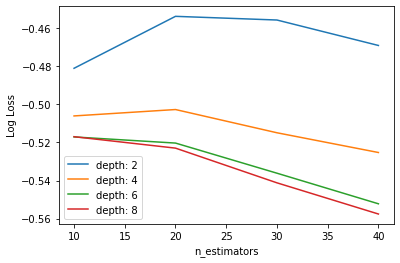

In [335]:
# Mathematics dataset, 
# Tune n_estimators and max_depth


# grid search
model = XGBClassifier()
n_estimators = [10, 20, 30, 40]
max_depth = [2, 4, 6, 8]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_mat_filtered, y_mat)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
    
    
# plot results
scores = numpy.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    pyplot.plot(n_estimators, scores[i], label='depth: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators_vs_max_depth.png')

[2, 4, 6, 8]
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 153 out of 160 | elapsed:    5.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    5.6s finished


Best: -0.463592 using {'max_depth': 2, 'n_estimators': 30}
-0.506339 (0.084559) with: {'max_depth': 2, 'n_estimators': 10}
-0.463715 (0.095182) with: {'max_depth': 2, 'n_estimators': 20}
-0.463592 (0.098719) with: {'max_depth': 2, 'n_estimators': 30}
-0.470645 (0.103081) with: {'max_depth': 2, 'n_estimators': 40}
-0.511686 (0.085856) with: {'max_depth': 4, 'n_estimators': 10}
-0.498394 (0.101701) with: {'max_depth': 4, 'n_estimators': 20}
-0.509978 (0.111106) with: {'max_depth': 4, 'n_estimators': 30}
-0.519071 (0.116507) with: {'max_depth': 4, 'n_estimators': 40}
-0.523570 (0.096294) with: {'max_depth': 6, 'n_estimators': 10}
-0.517540 (0.119284) with: {'max_depth': 6, 'n_estimators': 20}
-0.534499 (0.126374) with: {'max_depth': 6, 'n_estimators': 30}
-0.551908 (0.135922) with: {'max_depth': 6, 'n_estimators': 40}
-0.527843 (0.099644) with: {'max_depth': 8, 'n_estimators': 10}
-0.527795 (0.128454) with: {'max_depth': 8, 'n_estimators': 20}
-0.544473 (0.133228) with: {'max_depth': 8, '

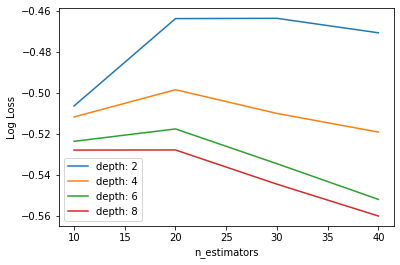

In [336]:
# Portugese dataset, 
# Tune n_estimators and max_depth


# grid search
model = XGBClassifier()
n_estimators = [10, 20, 30, 40]
max_depth = [2, 4, 6, 8]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_por_filtered, y_por)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
    
    
# plot results
scores = numpy.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    pyplot.plot(n_estimators, scores[i], label='depth: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators_vs_max_depth.png')

### Re-implement XGB with tuned parameters

In [337]:
# Mathematics Dataset

# rerun the model with the tuned parameters 

xgb_tuned_mat_fltrd = XGBClassifier(max_depth=2,n_estimators=20,objective='multi:softmax', num_class=5)
xgb_tuned_mat_fltrd.fit(X_mat_train, y_mat_train)
xgb_tuned_mat_fltrd_y_prediction = xgb_tuned_mat_fltrd.predict(X_mat_test)
print(accuracy_score(xgb_tuned_mat_fltrd_y_prediction, y_mat_test))

0.8787878787878788


In [338]:
# Portugese Dataset

# rerun the model with the tuned parameters 

xgb_tuned_por_fltrd = XGBClassifier(max_depth=2,n_estimators=30,objective='multi:softmax', num_class=5)
xgb_tuned_por_fltrd.fit(X_por_train, y_por_train)
xgb_tuned_por_fltrd_y_prediction = xgb_tuned_por_fltrd.predict(X_por_test)
print(accuracy_score(xgb_tuned_por_fltrd_y_prediction, y_por_test))

0.8159509202453987


The performance of XGB for the mathematics dataset improves with the tuned parameters while it drops for the Portugese dataset. However on trying the Portugese dataset with n_estimators= 20 the model jumps back to 0.822. This is a downside of the GridSearchCV method. Grid search generates evenly spaced values for each hyperparameter being tested, forming a grid. However in a scenario where optimal values, do not lie within the grid, they get missed. This can be worked out using RandomizedSearchCV which picks random values within a range hence has better chances of landing optimal values. 

## Parameter Tuning using RandomizedSearchCV

In [355]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
import time

lr          =  LogisticRegression(random_state=0)
penalty     =  ['l2', 'l1']
dual        =  [True,False]
solver      =  ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
multi_class =  ['auto', 'ovr', 'multinomial']
max_iter    =  sp_randInt(400, 1500)
C           =  sp_randFloat(1.0,5.0)

param_grid = dict(dual=dual,max_iter=max_iter,C=C,solver=solver,multi_class=multi_class,penalty=penalty)
random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv = 5, n_jobs=-1, random_state=0 )

start_time = time.time()
random_result = random.fit(X_mat_train, y_mat_train)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.777062 using {'solver': 'sag', 'penalty': 'l2', 'multi_class': 'ovr', 'max_iter': 1200, 'dual': False, 'C': 2.0}
Execution time: 1.1000936031341553 ms


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [381]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

dt          =  DecisionTreeClassifier(random_state=0)
criterion     =  ['gini','entropy']
splitter       =  ['best','random']
max_features      =  ['auto-cg', 'sgrt', 'log2']
max_depth           = sp_randInt(5,32)

param_grid = dict(criterion=criterion,splitter=splitter,max_features=max_features,max_depth=max_depth)
random = RandomizedSearchCV(estimator=dt, param_distributions=param_grid, cv = 5, n_jobs=-1, random_state=0 )

start_time = time.time()
random_result = random.fit(X_mat_train, y_mat_train)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.736667 using {'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'splitter': 'random'}
Execution time: 0.09873652458190918 ms


In [380]:
# Create instancess of the classifiers
logistic_classifier = LogisticRegression(random_state = 0, solver='newton-cg',penalty= 'l2',
                                         max_iter= 600, fit_intercept = True, 
                                         multi_class='auto', dual=False, C=2.5)
decision_classifier = DecisionTreeClassifier(max_depth=6, max_features='log2',splitter='random', random_state = 0)


# Fit the instances with the training set
logistic_classifier.fit(X_mat_train, y_mat_train)
decision_classifier.fit(X_mat_train, y_mat_train)

# Predict the target variable
logistic_y_prediction = logistic_classifier.predict(X_mat_test) 
decision_y_prediction = decision_classifier.predict(X_mat_test) 

# Evaluate the model performance
print(accuracy_score(logistic_y_prediction, y_mat_test))
print(accuracy_score(decision_y_prediction, y_mat_test))


0.8383838383838383
0.7777777777777778


Rerunning the models with the tuned parameters improves the performance of Logistic Regression from 80.8% to 83.8%,

That of the decision tree classifier drops from 86.7% to 77.8%. 

## Prinipal Component Analysis

PCA is a fast and flexible unsupervised method for dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering. Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.PCA's main weakness is that it tends to be highly affected by outliers in the data. For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components. 

Reference:
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

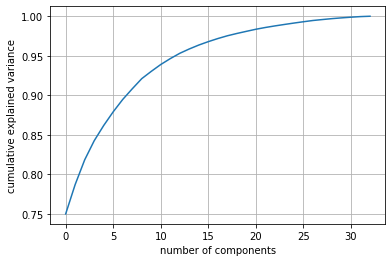

In [340]:
# Mathematics Dataset

from sklearn.decomposition import PCA

pca = PCA().fit(student_mat_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(axis='both')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 33-dimensional variance is contained within the first N components. With the students data set the first 15 components contain approximately about 95% of the variance, while you need around 30 components to describe close to 100% of the variance.

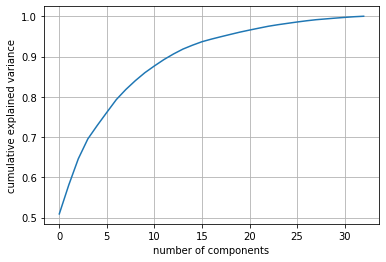

In [341]:
# Portugese Dataset


pca = PCA().fit(student_por_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(axis='both')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 33-dimensional variance is contained within the first N components. With the students data set the first 15 components contain approximately ~95% of the variance, while you need around 30 components to describe close to 100% of the variance.

So both datasets are similar in terms of variance as was seen with their VIF values.

### evaluate pca with the classification algorithms used already

In [342]:
# Import Libraries

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot



In [343]:
# Logistic Regression

print('Logistic Regression:')

# define the pipeline
steps = [('pca', PCA(n_components=4)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

# Mathematics Dataset
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=10, random_state=1)
n_scores = cross_val_score(model, X_mat, y_mat, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Mathematics Dataset: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# Portugese Dataset
# evaluate model
n_scores = cross_val_score(model, X_por, y_por, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Portugese Dataset: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Logistic Regression:
Mathematics Dataset: 0.559 (0.046)
Portugese Dataset: 0.642 (0.042)


In [344]:
# Decision Tree Classifier
print("Decision Tree Classifier:")

# define the pipeline
steps = [('pca', PCA(n_components=6)), ('m', DecisionTreeClassifier())]
model = Pipeline(steps=steps)

# Mathematics Dataset
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
n_scores = cross_val_score(model, X_mat, y_mat, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Mathematics DS: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# Portugese Dataset
# evaluate model
n_scores = cross_val_score(model, X_por, y_por, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Portugese DS: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Decision Tree Classifier:
Mathematics DS: 0.461 (0.056)
Portugese DS: 0.543 (0.042)


In [345]:
# Naive Bayes Classifier
print("Naive Bayes Classifier:")

# define the pipeline
steps = [('pca', PCA(n_components=6)), ('m', GaussianNB())]
model = Pipeline(steps=steps)

# Mathematics Dataset
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
n_scores = cross_val_score(model, X_mat, y_mat, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Mathematics ds: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# Portugese Dataset
# evaluate model
n_scores = cross_val_score(model, X_por, y_por, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Portugese ds: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Naive Bayes Classifier:
Mathematics ds: 0.473 (0.045)
Portugese ds: 0.609 (0.042)


In [346]:
#KNeighborsClassifier
print('KNeighborsClassifier:')

# define the pipeline
steps = [('pca', PCA(n_components=6)), ('m', KNeighborsClassifier())]
model = Pipeline(steps=steps)

# Mathematics Dataset
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
n_scores = cross_val_score(model, X_mat, y_mat, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Mathematics ds: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# Portugese Dataset
# evaluate model
n_scores = cross_val_score(model, X_por, y_por, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Portugese ds: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

KNeighborsClassifier:
Mathematics ds: 0.515 (0.047)
Portugese ds: 0.593 (0.038)


In [347]:
# RandomForestClassifier
print('RandomForestClassifier:')

# define the pipeline
steps = [('pca', PCA(n_components=6)), ('m', RandomForestClassifier())]
model = Pipeline(steps=steps)

# Mathematics Dataset
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
n_scores = cross_val_score(model, X_mat, y_mat, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Mathematics ds: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# Portugese Dataset
# evaluate model
n_scores = cross_val_score(model, X_por, y_por, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Portugese ds: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

RandomForestClassifier:
Mathematics ds: 0.552 (0.040)
Portugese ds: 0.654 (0.037)


In [348]:
# XGBClassifier
print('XGBClassifier:')

# define the pipeline
steps = [('pca', PCA(n_components=6)), ('m', XGBClassifier())]
model = Pipeline(steps=steps)

# Mathematics Dataset
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
n_scores = cross_val_score(model, X_mat, y_mat, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Mathematics: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# Portugese Dataset
# evaluate model
n_scores = cross_val_score(model, X_por, y_por, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Portugese: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


XGBClassifier:
Mathematics: 0.518 (0.049)
Portugese: 0.613 (0.041)


WE tested PCA with all the classification models used above with boruta to gauge which would do better. Logistic Regression performs best with PCA dimension reduction for both datasets as shown by the table below.

| model         | Math | Por  |
|---------------|------|------|
| logistic      | 0.56 | 0.63 |
| Decision Tree | 0.43 | 0.52 |
| GaussianNB    | 0.44 | 0.59 |
| KNN           | 0.50 | 0.58 |
| RandomForest  | 0.53 | 0.63 |
| XGB           | 0.48 | 0.59 |

### compare pca number of components with logistic regression algorithm for classification

Components 	 Accuracy 	 Std dev
>1 		 0.483 		 (0.026)
>2 		 0.495 		 (0.033)
>3 		 0.553 		 (0.058)
>4 		 0.559 		 (0.057)
>5 		 0.559 		 (0.065)
>6 		 0.545 		 (0.066)
>7 		 0.582 		 (0.069)
>8 		 0.610 		 (0.063)
>9 		 0.760 		 (0.070)
>10 		 0.767 		 (0.073)
>11 		 0.768 		 (0.060)
>12 		 0.767 		 (0.061)
>13 		 0.786 		 (0.059)
>14 		 0.786 		 (0.057)
>15 		 0.788 		 (0.051)
>16 		 0.806 		 (0.058)
>17 		 0.805 		 (0.060)
>18 		 0.805 		 (0.053)
>19 		 0.804 		 (0.048)
>20 		 0.807 		 (0.049)
>21 		 0.803 		 (0.055)
>22 		 0.800 		 (0.057)
>23 		 0.803 		 (0.054)
>24 		 0.805 		 (0.059)
>25 		 0.803 		 (0.055)
>26 		 0.799 		 (0.057)
>27 		 0.806 		 (0.059)
>28 		 0.805 		 (0.063)
>29 		 0.807 		 (0.057)
>30 		 0.807 		 (0.056)
>31 		 0.800 		 (0.057)


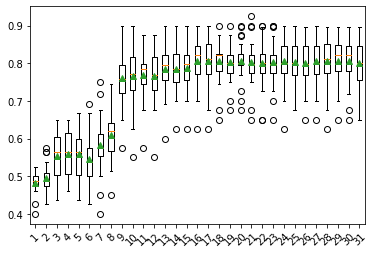

In [349]:
# Mathematics Dataset

# compare pca number of components with logistic regression algorithm for classification


# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,32):
		steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
		models[str(i)] = Pipeline(steps=steps)
	return models


# evaluate a given model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_mat, y_mat, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores


# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
cnt = 0
accdata = []


for name, model in models.items():
    cnt+=1
    if cnt==1:
        print('Components \t Accuracy \t Std dev')
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s \t\t %.3f \t\t (%.3f)' % (name, mean(scores), std(scores)))
    accdata.append([name,mean(scores),std(scores)])
    
    
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()



Mathematics dataset has the best performance at n_estimators= 20,29,30 (80.7%)

Components 	 Accuracy 	 Std dev
>1 		 0.522 		 (0.046)
>2 		 0.557 		 (0.050)
>3 		 0.622 		 (0.042)
>4 		 0.649 		 (0.057)
>5 		 0.652 		 (0.058)
>6 		 0.658 		 (0.057)
>7 		 0.659 		 (0.057)
>8 		 0.659 		 (0.054)
>9 		 0.660 		 (0.059)
>10 		 0.713 		 (0.050)
>11 		 0.727 		 (0.053)
>12 		 0.738 		 (0.042)
>13 		 0.798 		 (0.044)
>14 		 0.839 		 (0.047)
>15 		 0.837 		 (0.046)
>16 		 0.838 		 (0.050)
>17 		 0.837 		 (0.047)
>18 		 0.838 		 (0.048)
>19 		 0.842 		 (0.048)
>20 		 0.838 		 (0.050)
>21 		 0.837 		 (0.049)
>22 		 0.836 		 (0.050)
>23 		 0.834 		 (0.046)
>24 		 0.830 		 (0.046)
>25 		 0.829 		 (0.045)
>26 		 0.828 		 (0.045)
>27 		 0.831 		 (0.040)
>28 		 0.830 		 (0.044)
>29 		 0.832 		 (0.045)
>30 		 0.832 		 (0.043)
>31 		 0.838 		 (0.043)


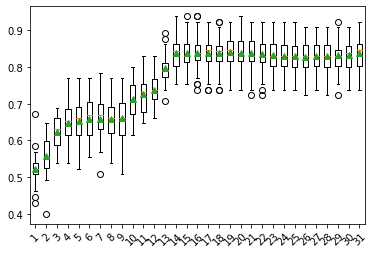

In [350]:
# Portugese Dataset

# compare pca number of components with logistic regression algorithm for classification


# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,32):
		steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
		models[str(i)] = Pipeline(steps=steps)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_por, y_por, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores


# get the models to evaluate
models = get_models()


# evaluate the models and store results
results, names = list(), list()
cnt = 0
accdata = []
for name, model in models.items():
    cnt+=1
    if cnt==1:
        print('Components \t Accuracy \t Std dev')
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s \t\t %.3f \t\t (%.3f)' % (name, mean(scores), std(scores)))
    accdata.append([name,mean(scores),std(scores)])
    
    
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()



#### Portugese dataset has the best performance at n_components= 14 (84%)

With the Portugese dataset, Logistic regression using PCA for dimension reduction performs better than when using Boruta. No significant change occurs with the math dataset.

Logistic Regression:

| Dataset   | Boruta | PCA   |
|-----------|--------|-------|
| Math      | 0.808  | 0.807 |
| Portugese | 0.806  | 0.84  |

We have established that Logistic regression is the best performing model using PCA for dimension reduction while XBG and Decision Tree classifier work best with boruta for feature selection.

In [351]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import  plot_tree



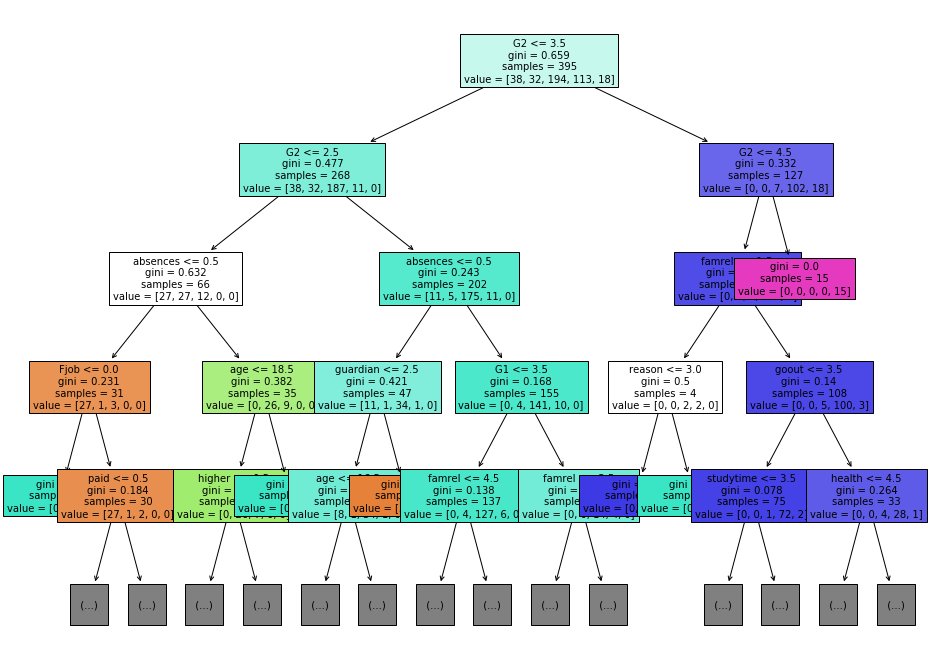

In [364]:
# Mathematics Dataset

# plot decision tree

columns = student_mat_df.columns

# fit model no training data
model = decisionTC
model.fit(X_mat, y_mat)

# plot single tree
plt.figure(figsize=(16,12))
plot_tree(model, max_depth =4, filled=True,fontsize=10,feature_names=columns)
plt.show()

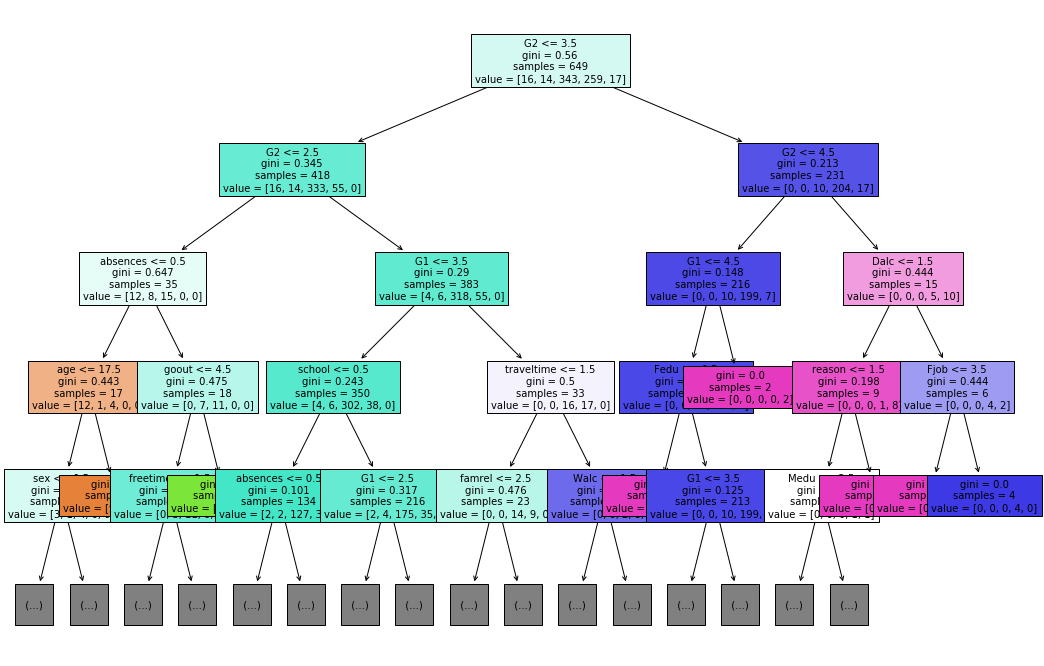

In [366]:
# Portugese Dataset

# plot decision tree

columns = student_por_df.columns

# fit model no training data
model = decisionTC
model.fit(X_por, y_por)

# plot single tree
plt.figure(figsize=(18,12))
plot_tree(model, max_depth =4, filled=True,fontsize=10,feature_names=columns)
plt.show()

 We have established some student attributes such as previous grades have a positive linear correlation to their final grade. Others such as weekday alcohol consumption, abscences and romantica relationships have a negative correlation to their final grade. Also being in certain categories of gender, rural/urban areas or schools may increase the odds of performing better. Some attributes have no clear pattern in correlation. Some of the most interesting insights that we've found from the data are:
- Weekend alchol consumption has less detrimentl effects to performance than weekday alcohol consumption.
- Students who perform poorly do not wish to get higher education.
- Students whose parents are teachers have the lowest median\average, while those whose parents are in health proffessions perform better.
- Students with very bad family relations perfom better than those with better family relations.
- students with access to internet have better average scores.

Since decision tree was one of the best performing models, We used the decision tree classifier to plot the decision tree, so as to identify the most significant attributes that were used in predicting the target variable:
    
As expected, the first grade 'G2' being the root node is the most significant attribute. The top ones spotted are:
- G2
- Abscences
- family relations
- G1
- Study time
- travel time
- How often a student goes out
- reason for joining their school
- How much students engage with activities outside class
- guardian

These are student attributes that play a significant role in what a student scores and hence can be used to predict their future scores. The best method achieved for predicting these scores is the XGBoost classifier (@ 87.788%). This was made possible through the following steps:
1. Encoding of string variables
2. Mapping of all grades to just 5 categories
3. Feature selection through Boruta
4. Parameter Tuning using grid search method